# Covid Dataset

**Required Dataset features and target**

The dataset has 53 columns; 1 to represent the country, 1 to represent the day (it will be an integer), 50 floats to represent the positive cases of the 50 previous days, and 1 column to represent the output that is the average of a full week of cases.

![required_features.jpg](https://drive.google.com/uc?id=1smUwSHRwMT8h-M8kjG3ymmxdhQbe1HvY)


In [ ]:
# Installing Incremental learner: Scikit-Multiflow
!pip install scikit-multiflow


# Overdiding some files from scikit multiflow library
!gdown https://drive.google.com/uc?id=1f5GgBqjAsTUFnubHODmfqn6qiNyDBqIw
!unzip /content/src.zip -d /content/src
!cp -r /content/src/src /content/
!rm -r /content/src/src

# Creating a seperate directory to store all csv's
! mkdir -p /content/csv_files
! mkdir -p /content/csv_files/processed_null
! mkdir -p /content/csv_files/processed
! mkdir -p /content/Result/exp1
! mkdir -p /content/Result/exp2
! mkdir -p /content/Result/exp1/runtime
! mkdir -p /content/Result/exp2/runtime
! mkdir -p /content/Result/exp1/summary
! mkdir -p /content/Result/exp2/summary
! mkdir -p /content/Plots
! mkdir -p /content/Plots/barplot
! mkdir -p /content/Plots/boxplots
! mkdir -p /content/Result/exp1/united_dataframe
! mkdir -p /content/Result/exp1/united_dataframe/incremental
! mkdir -p /content/Result/exp1/united_dataframe/static
! mkdir -p /content/Result/exp2/united_dataframe
! mkdir -p /content/Result/exp2/united_dataframe/incremental
! mkdir -p /content/Result/exp2/united_dataframe/static

# Download the zip file
"""
!zip -r /content/file.zip /content/csv_files
from google.colab import files
files.download("/content/file.zip")
"""

     |████████████████████████████████| 1.1MB 5.2MB/s 
Downloading...
From: https://drive.google.com/uc?id=1f5GgBqjAsTUFnubHODmfqn6qiNyDBqIw
To: /content/src.zip
100% 26.1k/26.1k [00:00<00:00, 47.4MB/s]
Archive:  /content/src.zip
  inflating: /content/src/src/_classification_performance_evaluator.py  
  inflating: /content/src/src/base_evaluator.py  
  inflating: /content/src/src/constants.py  
  inflating: /content/src/src/evaluate_prequential.py  
  inflating: /content/src/src/evaluation_data_buffer.py  
  inflating: /content/src/src/measure_collection.py  


'\n!zip -r /content/file.zip /content/csv_files\nfrom google.colab import files\nfiles.download("/content/file.zip")\n'

In [ ]:
# For Box plot: Run this only if manually uploaded the results
!unzip /content/Result.zip -d /content/Result
!cp -r /content/Result/content/Result /content/
!rm -r /content/Result/content/Result
!rm -r /content/Result/content

csv_processed_path = '/content/csv_files/processed'
csv_processed_with_null_path = '/content/csv_files/processed_null'
exp1_path = '/content/Result/exp1'
exp2_path = '/content/Result/exp2'
exp1_runtime_path = '/content/Result/exp1/runtime'
exp2_runtime_path = '/content/Result/exp2/runtime'
exp1_summary_path = '/content/Result/exp1/summary'
exp2_summary_path = '/content/Result/exp2/summary'
bar_plot_path = r'/content/Plots/barplot'
box_plot_path = r'/content/Plots/boxplots'
exp1_static_united_df_path = '/content/Result/exp1/united_dataframe/static'
exp1_inc_united_df_path = '/content/Result/exp1/united_dataframe/incremental'
exp2_static_united_df_path = '/content/Result/exp2/united_dataframe/static'
exp2_inc_united_df_path = '/content/Result/exp2/united_dataframe/incremental'


unzip:  cannot find or open /content/Result.zip, /content/Result.zip.zip or /content/Result.zip.ZIP.
cp: cannot stat '/content/Result/content/Result': No such file or directory
rm: cannot remove '/content/Result/content/Result': No such file or directory
rm: cannot remove '/content/Result/content': No such file or directory


In [ ]:
#!pip uninstall keras
#!pip uninstall tensorflow

!pip install keras==2.3.1
!pip install tensorflow==2.1.0

     |████████████████████████████████| 378kB 5.7MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 3.9MB 45.2MB/s 
     |████████████████████████████████| 450kB 43.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=5a6be5732a1064b50e3d680fd88b313865dcf8356d06399f3de825ac0c159f2c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Suc

In [ ]:
# General Imports 
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
import glob
import matplotlib.pyplot as plt
import matplotlib

# Imports for incremental learner
from skmultiflow.data import DataStream
from skmultiflow.trees import HoeffdingTreeRegressor
from src.evaluate_prequential import EvaluatePrequential
from skmultiflow.meta import AdaptiveRandomForestRegressor
from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor

# Imports for static Learner
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from time import perf_counter as pc_timer
from functools import wraps

import keras
from keras.layers import Dense, Dropout, LSTM
#from tensorflow.keras import Sequential
from keras.models import Sequential
from keras.callbacks import EarlyStopping

# For significance tests
from scipy.stats import normaltest
from scipy import stats 
# pd.set_option('display.max_colwidth', 500)

Using TensorFlow backend.


In [ ]:
# url = 'https://drive.google.com/file/d/1VH-nkePskK3gT6U5qkoOP-0hFT4beszC/view?usp=sharing'
url = 'https://drive.google.com/file/d/1d5IxAkiGNns0cmxpmbnW5NjF4c2uS2Cn/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

dateRep  ...  Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0  14/12/2020  ...                                              9.014         
1  13/12/2020  ...                                              7.053         
2  12/12/2020  ...                                              6.869         
3  11/12/2020  ...                                              7.134         
4  10/12/2020  ...                                              6.969         

[5 rows x 12 columns]

In [ ]:
# Grouping countries together for analysis
total_countries = df['countriesAndTerritories'].unique()
df_grouped = df.groupby('countriesAndTerritories')
pretrain_days = [30,60,90,120,150,180]  # List of pretrain days TODO: Make it full list later
valid_countries = []
decimal = 3  # Specify the scale of decimal places 
error_metrics = ['MAE','MAPE', 'RMSE']

# Setting path variables for both experiments
csv_processed_path = '/content/csv_files/processed'
csv_processed_with_null_path = '/content/csv_files/processed_null'
exp1_path = '/content/Result/exp1'
exp2_path = '/content/Result/exp2'
exp1_runtime_path = '/content/Result/exp1/runtime'
exp2_runtime_path = '/content/Result/exp2/runtime'
exp1_summary_path = '/content/Result/exp1/summary'
exp2_summary_path = '/content/Result/exp2/summary'
bar_plot_path = r'/content/Plots/barplot'
box_plot_path = r'/content/Plots/boxplots'


# Top countries to select for experiment 1
Number_of_countries = 25

## Feature Set with Individual Countries

In [ ]:
# Create lags
def create_features_with_lags(df):
  for i in range(89, 0, -1):  # Loop in reverse order for creating ordered lags eg: cases_t-10, cases_t-9... cases_t-1. t=current cases
    df[f'cases_t-{i}'] = df['cases'].shift(i, axis=0)
  return df

In [ ]:
# Pre-Processing dataset and saving them into csv's.
for country in total_countries:
  df = df_grouped.get_group(country)

  # Selecting required features
  df= df[['dateRep','cases','countriesAndTerritories']]

  # Rename features
  df.rename(columns={'countriesAndTerritories':'country', 'dateRep':'date'}, inplace=True)

  # Convert to date, sort and set index
  df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y')
  df.sort_values('date', inplace=True)
  df.set_index('date', inplace=True)

  # Adding feature
  df['day_no']= pd.Series([i for i in range(1,len(df)+1)], index=df.index)

  # Reordering features
  df = df[['day_no', 'country','cases']]

  # Adding features through lags
  df = create_features_with_lags(df)

  # Creating target with last 10 days cases
  df['target'] = df.iloc[:,[2]+[i*-1 for i in range(1,10)]].mean(axis=1)

  # Dropping mid columns
  drop_columns = list(df.loc[:,'cases_t-39':'cases_t-1'].columns)  #list(df.loc[:,'cases_t-38':'cases_t-1'].columns)
  df.drop(drop_columns, axis=1, inplace=True)

  # Country name
  filename = df['country'].unique()[0]

  # Saving file
  df.to_csv(f'{csv_processed_with_null_path}/{filename}.csv')

  # Dropping null records
  df.dropna(how='any', axis=0, inplace=True)

  # Valid countries that have records more than max of pretrain
  if len(df)>max(pretrain_days):
    valid_countries.append(country)  
    df.to_csv(f'{csv_processed_path}/{filename}.csv')
  
print('Done!')

Done!


## Total cases of top selected countries

In [ ]:
# Added just for plots. Remove later
# Number_of_countries = 25

In [ ]:
# Replaces underscore from country names
def format_names(list_countries):
  updated_country_list = []
  for country_name in list_countries:
    updated_country_list.append(country_name.replace("_"," "))
  return updated_country_list

In [ ]:
# A dictionary of all countries
dict_countries = Counter(valid_countries)

for country in valid_countries:
  dict_countries[country] = df_grouped.get_group(country)['cases'].sum()

# Select top_countries and order(Ascending/Decending) 
top_countries = sorted(dict_countries.items(), key=lambda dict_countries: dict_countries[1], reverse=True) [0:Number_of_countries]

# Creating dataframe of top selected countries
df_top_countries = pd.DataFrame.from_dict(dict(top_countries), orient='index', columns=['Total Cases'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


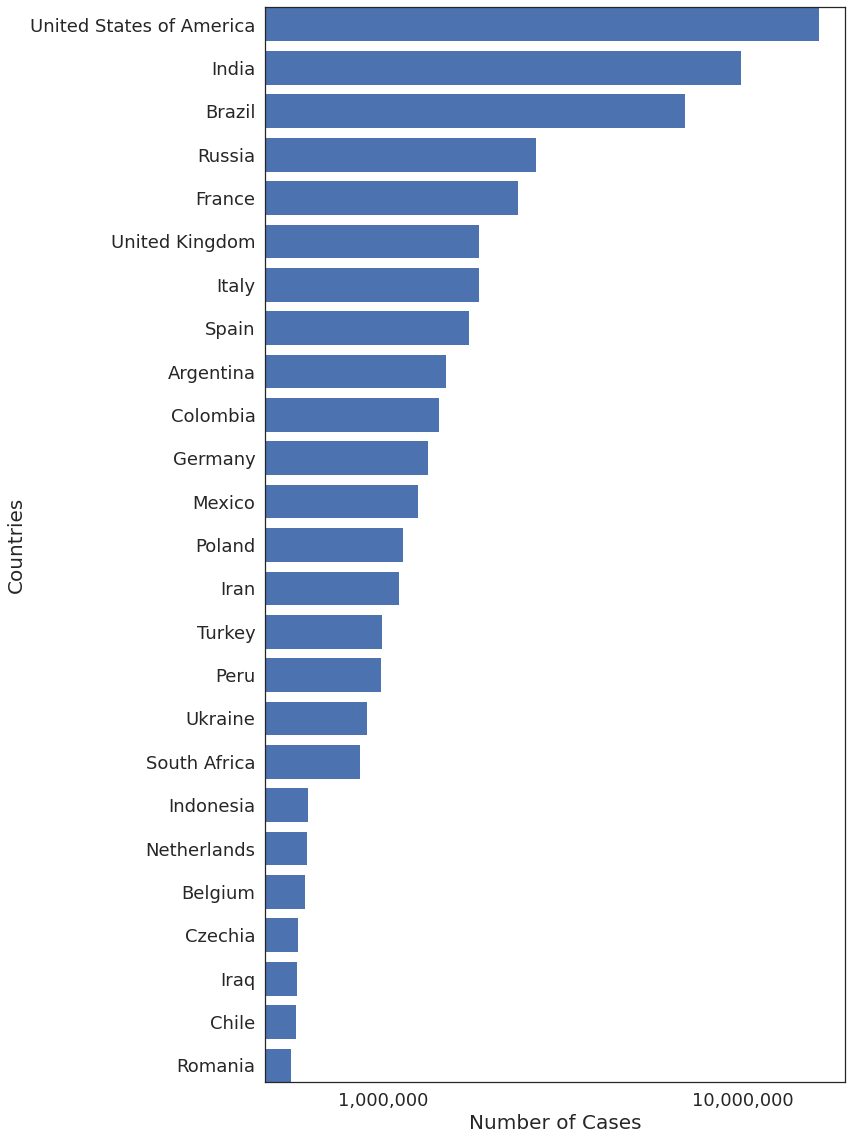

In [ ]:
# Plotting graph
sns.set_theme(style='white')
plt.figure(figsize=(12,16))
top_countries_list = format_names(df_top_countries.index)
plt.barh(top_countries_list[::-1], df_top_countries['Total Cases'].values[::-1]) # Reversing the order to have heighest values at the top of bar chart
#plt.title(f'Top {len(top_countries)} Countries with Most Cases')
plt.xscale('log')
ax = plt.axes() # for updating axes values to plain text
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.margins(y=0)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('Number of Cases', fontsize=20)
plt.ylabel('Countries',fontsize=20)
plt.tight_layout()
plt.savefig(f'{bar_plot_path}/top_selected_country_cases.pdf')
plt.show()

In [ ]:
"""
# Plotting graph
sns.set_theme(style='white')
plt.figure(figsize=(12,16), dpi=90)

#plt.bar(df_top_countries.index, df_top_countries['Total Cases'].values)
top_countries_list = format_names(df_top_countries.index)
plt.barh(top_countries_list, df_top_countries['Total Cases'].values)

#plt.axvline(Number_of_countries-0.5, 0,1, ls='--', c='black')
plt.axhline(y=(Number_of_countries-0.5), ls='--', c='black')

plt.title(f'Top {len(top_countries)} Countries with Most Cases')

plt.xscale('log')
ax = plt.axes() # for updating 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)  # To get labels in plain text 
#plt.xticks(rotation=90)
plt.margins(y=0)
plt.xlabel('Number of Cases')
plt.ylabel('Countries')
plt.show()
"""

"\n# Plotting graph\nsns.set_theme(style='white')\nplt.figure(figsize=(12,16), dpi=90)\n\n#plt.bar(df_top_countries.index, df_top_countries['Total Cases'].values)\ntop_countries_list = format_names(df_top_countries.index)\nplt.barh(top_countries_list, df_top_countries['Total Cases'].values)\n\n#plt.axvline(Number_of_countries-0.5, 0,1, ls='--', c='black')\nplt.axhline(y=(Number_of_countries-0.5), ls='--', c='black')\n\nplt.title(f'Top {len(top_countries)} Countries with Most Cases')\n\nplt.xscale('log')\nax = plt.axes() # for updating \nax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))\n\n#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)  # To get labels in plain text \n#plt.xticks(rotation=90)\nplt.margins(y=0)\nplt.xlabel('Number of Cases')\nplt.ylabel('Countries')\nplt.show()\n"

## Average cases of top selected countries

In [ ]:
dict_countries_avg = Counter(total_countries)

for country in dict_countries.keys():
  dict_countries_avg[country] = df_grouped.get_group(country)['cases'].mean()

# Average cases for all countries
df_avg_cases_countries = pd.DataFrame.from_dict(dict_countries_avg, orient='index', columns=['Average'])

# List of top selected countries
top_countries = list(df_top_countries.index)

# Average of selected top countries
avg_df = df_avg_cases_countries[df_avg_cases_countries.index.isin(top_countries)]
avg_df

Average
Argentina                 5293.852
Belgium                   1737.146
Brazil                   19719.863
Chile                     2006.733
Colombia                  5110.301
Czechia                   1660.226
France                    6791.006
Germany                   3820.223
India                    28321.203
Indonesia                 1801.224
Iran                      3166.483
Iraq                      1651.247
Italy                     5267.749
Mexico                    3571.554
Netherlands               1750.703
Peru                      3492.812
Poland                    3998.859
Romania                   1598.664
Russia                    7582.651
South_Africa              3053.064
Spain                     4958.668
Turkey                    3606.779
Ukraine                   3263.283
United_Kingdom            5284.009
United_States_of_America 46447.869

# Common Methods for All Experiments

## Common Methods

In [ ]:
# Global variables for countries
countries = top_countries[0:Number_of_countries]

In [ ]:
# Return a combined dataframe for a each error statistics(MAE,RMSE,MAPE etc) along with the newly added mean row.
def get_metric_with_mean(result: pd.DataFrame, error_metric: str)->pd.DataFrame:
  df_grouped = result.groupby('EvaluationMeasurement')
  df = df_grouped.get_group(error_metric).reset_index(drop=True)
  df = df.append(df.describe().loc['mean'])
  return df

In [ ]:
def calc_mean_to_max_error(df, max_of_pretrain_days, max_of_df):
  i=-1
  for row_num in range(len(df)-1):  # Go before mean row
    i += 1
    for col_num in df.columns[2:]:
      df.loc[row_num,col_num] = df.loc[row_num,col_num]/max_of_pretrain_days[i] 
  
  for col in df.columns[2:]:
      df.loc['mean',col] = df.loc['mean',col]/max_of_df

  return df

In [ ]:
# Note: Do not change the filenames, since they are later being used for visualizations 
def save_runtime(df,path,country=None,static_learner=True,alternate_batch=False, transpose=False):
  df = df.apply(pd.to_numeric,errors='ignore') # Converting the dataframe to numeric
  df = df.round(decimal) # Setting the precision
  
  # if transpose flag is set to true
  if transpose:
    df = df.transpose()

  if country==None:
    if static_learner:
      df.to_latex(f'{path}/combined25country_runtime_static.tex')
      df.to_csv(f'{path}/combined25country_runtime_static.csv')
    else:
      if alternate_batch:
         df.to_latex(f'{path}/combined25country_runtime_incremental_alternate_batch.tex')
         df.to_csv(f'{path}/combined25country_runtime_incremental_alternate_batch.csv')
      else:
        df.to_latex(f'{path}/combined25country_runtime_incremental.tex')
        df.to_csv(f'{path}/combined25country_runtime_incremental.csv')
  else:
    if static_learner:
      df.to_latex(f'{path}/{country}_runtime_static.tex')
      df.to_csv(f'{path}/{country}_runtime_static.csv')
    else:
      df.to_latex(f'{path}/{country}_runtime_incremental.tex')
      df.to_csv(f'{path}/{country}_runtime_incremental.csv')

In [ ]:
# Note: Do not change the filenames, since they are later being used for visualizations 
def save_summary_table(df,path,country=False,static_learner=True,alternate_batch=False, transpose=False):

  df = df.apply(pd.to_numeric,errors='ignore') # Converting the dataframe to numeric
  df = df.round(decimal) # Setting the precision
  
  # if transpose flag is set to true
  if transpose:
    df = df.transpose()

  if country:
    metric = df.loc['EvaluationMeasurement'].unique()[0]
    if static_learner:
      df.to_latex(f'{path}/top_countries_{metric}_summary_table_static.tex')
      df.to_csv(f'{path}/top_countries_{metric}_summary_table_static.csv')
    else:
      df.to_latex(f'{path}/top_countries_{metric}_summary_table_incremental.tex')
      df.to_csv(f'{path}/top_countries_{metric}_summary_table_incremental.csv')
    
  else:
    if static_learner:
      df.to_latex(f'{path}/combined25country_summary_table_static.tex')
      df.to_csv(f'{path}/combined25country_summary_table_static.csv')
    else:
      if alternate_batch:
         df.to_latex(f'{path}/combined25country_summary_table_incremental_alternate_batch.tex')
         df.to_csv(f'{path}/combined25country_summary_table_incremental_alternate_batch.csv')
      else:
        df.to_latex(f'{path}/combined25country_summary_table_incremental.tex')
        df.to_csv(f'{path}/combined25country_summary_table_incremental.csv')
    

In [ ]:
# Note: Do not change the filenames since they are later being used for visualizations
def save_metrics(df, path, country=None, static_learner=True, alternate_batch=False, transpose=False): 
  df = df.apply(pd.to_numeric,errors='ignore') # Converting the dataframe to numeric
  df = df.round(decimal) # Setting the precision
  
  # if transpose flag is set to true
  if transpose:
    df = df.transpose()

  metric_type = df.loc['EvaluationMeasurement'].unique()[0]
  if country==None:
    if static_learner:
      df.to_latex(f'{path}/combined25country_{metric_type}_static.tex')
      df.to_csv(f'{path}/combined25country_{metric_type}_static.csv')
    else:
      if alternate_batch:
         df.to_latex(f'{path}/combined25country_{metric_type}_incremental_alternate_batch.tex')
         df.to_csv(f'{path}/combined25country_{metric_type}_incremental_alternate_batch.csv')
      else:
        df.to_latex(f'{path}/combined25country_{metric_type}_incremental.tex')
        df.to_csv(f'{path}/combined25country_{metric_type}_incremental.csv')
  else:
    if static_learner:
      df.to_latex(f'{path}/{country}_{metric_type}_static.tex')
      df.to_csv(f'{path}/{country}_{metric_type}_static.csv')
    else:
      df.to_latex(f'{path}/{country}_{metric_type}_incremental.tex')
      df.to_csv(f'{path}/{country}_{metric_type}_incremental.csv')

In [ ]:
def save_combined_summary_table(df, path, static_learner=False,transpose=False):
  df = df.apply(pd.to_numeric,errors='ignore')
  df = df.round(decimal)
  if transpose:
    df = df.transpose()
  
  if static_learner:
    save_path = f'{path}/summary_table_combined_mean_static'
  else:
    save_path = f'{path}/summary_table_combined_mean_incremental'

  df.to_csv(f'{save_path}.csv')
  df.to_latex(f'{save_path}.tex')

In [ ]:
def save_united_df(df, path, country=None):
    if country:
        df.to_csv(f'{path}/{country}.csv')
    else:
        df.to_csv(f'{path}/united_df.csv')



In [ ]:
def display_runtime_per_country(results_runtime,countries):
  for i in range(len(countries)):
    print(f'_____________Running Time for {countries[i]}________________')
    print(results_runtime[i].to_string())
    print('\n')

In [ ]:
def calc_save_err_metric_countrywise(countries, error_metrics, results, max_of_pretrain_per_country, max_cases_per_country, path, static_learner, transpose):
  countrywise_error_scores={}
  for i in range(len(countries)):
    country_error_score = []
    for error_metric in error_metrics:
      
      df_error_metric = get_metric_with_mean(results[i], error_metric=error_metric)

      #if error_metric != 'MAPE':
      #  df_error_metric = calc_mean_to_max_error(df_error_metric, max_of_pretrain_per_country[i], max_cases_per_country[i])

      country_error_score.append(df_error_metric)
      display_countrywise_scores(countries[i],df_error_metric)

      # Transposing the metrics while saving
      save_metrics(df_error_metric, path=path, country=countries[i], static_learner=static_learner, transpose=transpose)
      
    countrywise_error_scores[countries[i]] = pd.concat(country_error_score,ignore_index=True)
    
  return countrywise_error_scores

In [ ]:
def calc_save_err_metric_combined(error_metrics, results, max_of_pretrain_days, max_selected_countries, path, static_learner, alternate_batch, transpose):
  combined_err_metric = []
  for error_metric in error_metrics:
    df_error_metric = get_metric_with_mean(results, error_metric=error_metric)

    #if error_metric != 'MAPE':
    #  df_error_metric = calc_mean_to_max_error(df_error_metric, max_of_pretrain_days, max_selected_countries)

    # Transposing the metrics while saving
    save_metrics(df_error_metric, path=path, static_learner=static_learner, alternate_batch=alternate_batch, transpose=transpose)
    
    combined_err_metric.append(df_error_metric)
  return (pd.concat(combined_err_metric, ignore_index=True))

In [ ]:
def get_summary_table(df_result, df_runtime_result, error_metrics, static_learner=True):
  sum_metric=[]
  measure_col_name = 'Metric'
  
  # Setting start row and column for static and incremental learner
  for metric in error_metrics:
    start_row = 'mean'
    if static_learner:
      start_col='RandomForest'
    else:
      start_col='HT_Reg'

    df_metric = get_metric_with_mean(df_result, metric)
    df_row = pd.DataFrame([df_metric.loc[start_row][start_col:]])
    
    df_row[measure_col_name] = str(metric)    
    sum_metric.append(df_row)

  # Adding run time
  df_runtime_row = pd.DataFrame([df_runtime_result.describe().loc[start_row][start_col:]])
  df_runtime_row[measure_col_name]='Time(sec)'
  sum_metric.append(df_runtime_row)

  df_summary = pd.concat(sum_metric, ignore_index=True)
  df_summary.set_index(measure_col_name, inplace=True)

  return df_summary

In [ ]:
def get_summary_table_countrywise(df_result_dict, error_metrics, static_learner=True):  #df_runtime_result,
  summary_metric=[]
  measure_col_name = f'Country({str(error_metrics[0])})'
  eval_measure_col = 'EvaluationMeasurement'
  start_row = 'mean'
  if static_learner:
    start_col='RandomForest'
  else:
    start_col='HT_Reg'

  for country in df_result_dict.keys():
    df_result = df_result_dict[country]

    # Setting start row and column for static and incremental learner
    for metric in error_metrics:      
      df_metric = get_metric_with_mean(df_result, metric)
      df_row = pd.DataFrame([df_metric.loc[start_row][start_col:]])
      df_row[eval_measure_col] = metric
      df_row[measure_col_name] = country
      summary_metric.append(df_row)

  df_summary = pd.concat(summary_metric, ignore_index=True)
  df_summary.set_index(measure_col_name, inplace=True)

  return df_summary

In [ ]:
def get_sum_table_combined_mean(countrywise_error_score_incremental,results_runtime, static_learner=False):
  sum_table_combined_mean=[]
  measure_col_name = 'Metric'
  start_row = 'mean'
  if static_learner:
    start_col = 'RandomForest'
  else:
    start_col= 'HT_Reg'

  for metric in error_metrics:
    df_sum_cur_metric = get_summary_table_countrywise(countrywise_error_score_incremental, [metric], static_learner=static_learner)
    df_row = pd.DataFrame([df_sum_cur_metric.describe().loc[start_row]])

    df_row[measure_col_name] = metric
    sum_table_combined_mean.append(df_row)

  # Adding run time
  df_runtime = pd.concat(results_runtime, ignore_index=True).describe().loc[start_row][start_col:]
  df_runtime_row = pd.DataFrame([df_runtime])
  df_runtime_row[measure_col_name]='Time(sec)'
  sum_table_combined_mean.append(df_runtime_row)

  # Concating results to one dataframe
  sum_table_combined_mean = pd.concat(sum_table_combined_mean, ignore_index=True)
  sum_table_combined_mean.set_index(measure_col_name, inplace=True)
  return sum_table_combined_mean

In [ ]:
def check_significance(target_pop, competitor_pop, significance_at: float):
    """
    Comparing algorithms per batch or per country pairs (exp 2 or 1 respectively), 
      so for each pair, we compare the significance of the best algo to all of the the other algos.
    Ttest performed if the distribution is normal, otherwise we perform a non-parametric test.
    """
    model_pop, population = target_pop, competitor_pop  
    
    # Normality tests
    if len(model_pop) >= 8:  # skew test not valid for smaller populations
      value_mdl, p_mdl = normaltest(model_pop.values)
      value_pop, p_pop = normaltest(population.values)
      if (p_mdl >= 0.05) & (p_pop >= 0.05):
          # print('It is likely that both populations are normal. Thus, running T-Test...')
          tset, pval = stats.ttest_ind(model_pop, population)
          if pval < significance_at:    # alpha value is 0.05 or 5%
              significant = 'Significant (Ttest)'
          else:
              significant = 'Not Significant (Ttest)'
      else:
          # print('It is unlikely that the result is normal. Thus, running Wilcoxon test...')
          if np.sum(np.subtract(list(model_pop), list(competitor_pop))) != 0.0:  # if values are identical the test will crash, but we now it's not significant
              tset, pval = stats.wilcoxon(model_pop, population)
              if pval < significance_at:    # alpha value is 0.05 or 5%
                  significant = 'Significant (Wilcox Test)'
              else:
                  significant = 'Not Significant (Wilcox Test)'
          else:
              # print('Warning: results are identical')
              tset, pval = stats.ttest_ind(model_pop, population)
              significant = 'Not Significant (Wilcox Test)'
    else:
      print('Population too small.')
      if np.sum(np.subtract(list(model_pop), list(competitor_pop))) != 0.0:  # if values are identical the test will crash, but we now it's not significant
          tset, pval = stats.wilcoxon(model_pop, population)
          if pval < significance_at:    # alpha value is 0.05 or 5%
              significant = 'Significant (Wilcox Test)'
          else:
              significant = 'Not Significant (Wilcox Test)'
    return pval, significant 

In [ ]:
def unit_incremental_df(country_name, evaluator, date, milestone):  # Added Now
    frame = {}
    frame['date'] = date
    if type(country_name) == pd.Series:
        frame['Country'] = country_name
    else:
        frame['Country'] = [country_name] * len(date)
    frame['Milestone'] = [milestone] * len(date)
    frame['y_true'] = evaluator.mean_eval_measurements[0].y_true_vector
    for i in range(len(evaluator.model_names)):
        frame[f'pred_{evaluator.model_names[i]}'] = evaluator.mean_eval_measurements[i].y_pred_vector
    return pd.DataFrame(frame)



def unit_static_df(country_name, date, y_true,  milestone, model_predictions):  # Added Now
    frame = {}
    frame['date'] = date
    if type(country_name) == pd.Series:
        frame['Country'] = country_name
    else:
        frame['Country'] = [country_name] * len(date)

    frame['Milestone'] = [milestone] * len(date)
    frame['y_true'] = y_true

    for algo, y_pred in model_predictions.items():  # Updated Now
        if algo == 'LSTM':
            frame[f'pred_{algo}'] = y_pred.flatten().tolist()
        else:
            frame[f'pred_{algo}'] = y_pred

    return pd.DataFrame(frame)

## Combining Dataset

In [ ]:
'''
def sortby_date_and_set_index(df):
  df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
  df.sort_values('date', inplace=True)
  df.set_index('date', inplace=True)
  return df
'''

def sortby_date_and_set_index(df):  # Updated
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
    df.sort_values('date', inplace=True)
    # df.set_index('date', inplace=True) #TODO:  Not setting date as idx; Might need to remove this line later
    return df

In [ ]:
def get_dataset_with_target(countries, df_grouped):
    # Empty list to store Dataframes of each country
    frames = []

    for country in countries:
        df = df_grouped.get_group(country)

        # Creating feature 'day_no'
        df['day_no'] = pd.Series([i for i in range(1, len(df) + 1)], index=df.index)

        # Reordering features
        # df = df[['day_no', 'country', 'cases']]
        df = df[['date', 'day_no', 'country', 'cases']]  # Added: Date column

        # Adding features through lags
        df = create_features_with_lags(df)

        # Creating target with last 10 days cases
        idx_cases = list(df.columns).index('cases')  # Added: Earlier hard coded idx
        df['target'] = df.iloc[:, [idx_cases] + [i * -1 for i in range(1, 10)]].mean(axis=1)  # Updated: Replacing idx with idx_cases

        # Dropping null columns
        df.dropna(how='any', axis=0, inplace=True)

        # Dropping mid columns
        drop_columns = list(df.loc[:, 'cases_t-39':'cases_t-1'].columns)  # Updated: cases_t-38 to t-39 for exact 50 columns of lags
        df.drop(drop_columns, axis=1, inplace=True)

        frames.append(df)

    return (pd.concat(frames, ignore_index=True))

In [ ]:
def reshape_dataframe(*data: np.ndarray):
    # This function adds an extra dimension which is necessary in the LSTM
    arr = []
    for d in data:
        arr.append(np.reshape(np.array(d), (d.shape[0], 1, d.shape[1])))
    return arr

In [ ]:
def get_countries_sortedby_cases(valid_countries, df_grouped):
  # A dictionary of all countries
  dict_countries = Counter(valid_countries)

  for country in dict_countries.keys():
    dict_countries[country] = df_grouped.get_group(country)['cases'].sum()

  # Sorting countries based on number of cases
  countries_sortedby_cases = sorted(dict_countries.items(), key=lambda dict_countries: dict_countries[1], reverse=True)

  # Creating dataframe 
  df_countries_sortedbycases = pd.DataFrame.from_dict(dict(countries_sortedby_cases), orient='index', columns=['Total Cases'])
  
  return df_countries_sortedbycases

In [ ]:
# Getting a list of valid countries
def get_countries_with_valid_size(df):
  total_countries = list(df_grouped.groups.keys())

  # A list for countries with required datasize
  valid_countries = []

  # List of countries with more than 230 records. Because, max training size = 150, lags removed = 50, prediction = 30.
  for country in total_countries:
    if len(df_grouped.get_group(country)) >= 230:
      valid_countries.append(country)

  return valid_countries

In [ ]:
def preprocess_dataset(df):  
  # Selecting required features
  df= df[['dateRep','cases','countriesAndTerritories']]

  # Rename features
  df.rename(columns={'countriesAndTerritories':'country', 'dateRep':'date'}, inplace=True)

  # Convert to date, sort and set index
  df = sortby_date_and_set_index(df)

  return df

In [ ]:
# Calculating maximum of dataframe for every pretrain size
def calc_max_of_pretrain_days(pretrain_days,df)->list:
  max_of_pretrain_days = []
  
  for day in pretrain_days:
    df_subset = create_subset(df,day)
    max_of_pretrain_days.append(df_subset['cases'].max())
  
  return max_of_pretrain_days

In [ ]:
def display_scores(results):
  #print(f'_________________________________{country}____________________________________________')
  df_MAE = get_metric_with_mean(results,'MAE' )
  df_RMSE = get_metric_with_mean(results,'RMSE')
  df_MAPE = get_metric_with_mean(results,'MAPE')
  print('MAE Score')
  print(df_MAE.to_string())
  print('-----------------------------------------------------------------------------------')
  print('RMSE Score')
  print(df_RMSE.to_string())
  print('-----------------------------------------------------------------------------------')
  print('MAPE Score')
  print(df_MAPE.to_string())
  print('\n\n')

## Alternate Batch

In [ ]:
def get_alternate_batch_records_idx(batch_size,total_records): 
  total_batches = total_records//batch_size
  current_batch=1
  start_idx = 0
  end_idx = batch_size
  idx_list = []
  
  while current_batch <= total_batches:
    if current_batch%2!=0:
      idx_list.extend([x for x in range(start_idx,end_idx)])
      start_idx = idx_list[-1]+(batch_size+1)
      end_idx = start_idx + batch_size
    current_batch += 1

  return idx_list

In [ ]:
def create_alternate_batch_subset(df,days,batch_size):
  df_grouped = df.groupby('country')
  countries = df['country'].unique()
  frame1,frame2 = [],[]

  for country in countries:
    df_cur_country = df_grouped.get_group(country)

    df1 = df_cur_country.iloc[0:days//2]
    df2 = df_cur_country.iloc[days:days+30]  # Adding 30 for a testing batch that is one month ahead
    
    # Selecting alternate batches
    idx = get_alternate_batch_records_idx(batch_size,total_records=len(df2))
    df2 = df2.iloc[idx]

    # Appending dataframes
    frame1.append(df1)
    frame2.append(df2)

  r1 = pd.concat(frame1, ignore_index=True)
  r2 = pd.concat(frame2, ignore_index=True)
  r = r1.append(r2, ignore_index=True)
  
  return (r)

## Incremental Learner

In [ ]:
def instantiate_regressors():
  ht_reg = HoeffdingTreeRegressor()
  hat_reg = HoeffdingAdaptiveTreeRegressor()
  arf_reg = AdaptiveRandomForestRegressor()
  pa_reg = PassiveAggressiveRegressor(max_iter=1, random_state=0, tol=1e-3)

  model = [ht_reg, hat_reg, arf_reg, pa_reg]
  model_names = ['HT_Reg', 'HAT_Reg', 'ARF_Reg', 'PA_Reg']

  return model, model_names

In [ ]:
def get_error_scores_per_model(evaluator, mdl_evaluation_scores)-> pd.DataFrame:
  
  for i in range(len(evaluator.model_names)):
    # Desired error metrics
    mse = evaluator.mean_eval_measurements[i].get_mean_square_error()
    mae = evaluator.mean_eval_measurements[i].get_average_error()
    mape = evaluator.mean_eval_measurements[i].get_mean_absolute_percentage_error()
    rmse = sqrt(mse)

    # Dictionary of errors per model
    mdl_evaluation_scores[str(evaluator.model_names[i])] = [rmse, mae, mape]

  return(pd.DataFrame(mdl_evaluation_scores))


In [ ]:
def get_running_time_per_model_incremental_learner(evaluator,day):
    cols = ['PretrainDays']  # Adding pretrain as first column
    cols += evaluator.model_names  # Adding remaining columns of different algorithm
    running_time = []
    running_time.append(day)
    for i in range(len(evaluator.model_names)):
        running_time.append(evaluator.running_time_measurements[i]._total_time)

    return (pd.DataFrame([running_time],columns=cols))  # Passing running_time as a list of list to insert it as a row

In [ ]:
def display_countrywise_scores(country,df_error_metric):
  print(f'_________________________________{country}____________________________________________')
  print(df_error_metric.to_string())
  print('\n\n')

In [ ]:
# Create a dataframe of all countries with pre-train size = pretrain days and test&train size = pretrain days
def create_subset(result,days):
  result_grouped = result.groupby('country')
  countries = result['country'].unique()
  frame1,frame2 = [],[]
  for country in countries:
    df = result_grouped.get_group(country) 
    df1 = df.iloc[0:days]
    df2 = df.iloc[days:days+30]
    frame1.append(df1)
    frame2.append(df2)

  r1 = pd.concat(frame1, ignore_index=True)
  r2 = pd.concat(frame2, ignore_index=True)
  r = r1.append(r2, ignore_index=True)
  
  return (r)

## Static Learner

In [ ]:
def mean_absolute_percentage_error(actual, predicted):
    """
    Mean absolute percentage error (MAPE).
    :return error
    """
    actual =  np.array(actual) 
    predicted = np.array(predicted) 

    mask = actual != 0
    return (np.fabs(actual - predicted) / np.fabs(actual))[mask].mean()

In [ ]:
def get_scores(y_true, model_predictions, days):
    mdl_evaluation_scores = {}
    mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE', 'MAE', 'MAPE']
    mdl_evaluation_scores['PretrainDays'] = [days] * len(mdl_evaluation_scores['EvaluationMeasurement'])

    for model in model_predictions:
        y_pred = model_predictions[model]
        if model == 'LSTM':
            rmse = mean_squared_error(y_true[:, np.newaxis], y_pred, squared=False)
            mae = mean_absolute_error(y_true[:, np.newaxis], y_pred)
            mape = mean_absolute_percentage_error(y_true[:, np.newaxis], y_pred)
        else:
            rmse = mean_squared_error(y_true, y_pred, squared=False)
            mae = mean_absolute_error(y_true, y_pred)
            mape = mean_absolute_percentage_error(y_true, y_pred)

        mdl_evaluation_scores[model] = [rmse, mae, mape]
    return pd.DataFrame(mdl_evaluation_scores)

In [ ]:
def get_running_time_per_model_static_learner(model_predictions,total_execution_time):
    cols = ['PretrainDays']
    cols += model_predictions.keys()
    return pd.DataFrame(total_execution_time, columns=cols)


def measure(wrapped_func):
    @wraps(wrapped_func)
    def _time_it(*args, **kwargs):
        start = pc_timer()
        try:
            model_predictions = wrapped_func(*args, **kwargs)
        finally:
            end_ = pc_timer() - start
            return model_predictions, end_
    return _time_it


@measure
def train_test_model(regressor, X_train, y_train, X_test):
    regressor.fit(X_train, y_train)
    return regressor.predict(X_test)


@measure
def train_test_lstm(regressor, X_train_lstm, y_train, X_val_lstm, y_val, X_test_lstm, patience, epochs, batch_size_lstm):
    regressor.compile(loss='mae', optimizer='adagrad', metrics=['mse', 'mae'])

    history = regressor.fit(
        X_train_lstm,
        y_train,
        validation_data=(X_val_lstm, y_val),
        epochs=epochs,
        batch_size=batch_size_lstm,
        callbacks=[EarlyStopping(monitor='val_loss',
                                 mode='min',
                                 patience=patience)])

    return regressor.predict(X_test_lstm)

In [ ]:
def define_lstm_model(x_train_lstm, layers, activations, patience):
    # Start defining the model
    input_shape = x_train_lstm.shape

    # Definining model first with LSTM n layers
    model = Sequential()
    model.add(LSTM(layers[0], input_shape=input_shape[1:], activation=activations[0], return_sequences=True))

    # Adding middle layers
    for l in range(1, len(layers)-1):
      model.add(LSTM(layers[l], activation=activations[l], return_sequences=True))
      model.add(Dropout(0.2))

    # Add last Dense and LSTMs layers
    if len(layers) > 1:
      model.add(Dense(layers[-1], activation=activations[-1]))
      model.add(Dropout(0.2))
      model.add(LSTM(layers[-1], activation=activations[-1]))

    model.add(Dense(1))  # output layer. Since we have only 1 output value
    # End defining model

    return model


In [ ]:
def normalize_dataset(*dataframes):
    arr = []
    for df in dataframes:
        arr.append(StandardScaler().fit_transform(df))
    return arr

In [ ]:
def get_validation_set(df_train, batch_size=10):  # Updated Now
    '''
    lst_idx = -1
    total_batches = len(df_train) // batch_size
    train_set, val_set = [], []

    for cur_batch in range(total_batches):
        start = lst_idx + 1
        end = start + batch_size
        if cur_batch % 2 == 0:
            train_set.append(df_train.iloc[start:end])
        else:
            val_set.append(df_train.iloc[start:end])

        lst_idx = end - 1  # adjusting last index because we add 1 in starting
    '''
    train_set, val_set = [], []
    countries = df_train['country'].unique()
    for country in countries:
        train_set.append(df_train[df_train['country'] == country].iloc[:-batch_size, :])
        val_set.append(df_train[df_train['country'] == country].iloc[-batch_size:])
    return pd.concat(train_set, ignore_index=True), pd.concat(val_set, ignore_index=True)

# Experiment 1
Training and testing with five countries individually. 

### Dataset Description

* cases(t): Number of cases on current day(Column='cases') 

* cases(t-n): Number of cases 'n' days before current day 't'

* 30 day gap: Training from day number t-89 to t-39(50 days). Then a gap of 30 days and then creating target by averaging t to t-9(10 Days).


In [ ]:
# Sample set for understanding dataset
sample_df = pd.read_csv(f'{csv_processed_path}/United_States_of_America.csv')
sample_df.head(5)

date  day_no  ... cases_t-40    target
0  2020-03-29      90  ...      0.000 11525.000
1  2020-03-30      91  ...      0.000 12877.500
2  2020-03-31      92  ...      0.000 14499.600
3  2020-04-01      93  ...      1.000 16287.100
4  2020-04-02      94  ...     19.000 18151.500

[5 rows x 55 columns]

## Incremental Learner

In [ ]:
def reset_evaluator(evaluator):  # Added Now
  for j in range(evaluator.n_models):
      evaluator.mean_eval_measurements[j].reset()
      evaluator.current_eval_measurements[j].reset()
  return evaluator


def update_incremental_metrics(evaluator, y, prediction):  # Added Now
  for j in range(evaluator.n_models):
    for i in range(len(prediction[0])):
      evaluator.mean_eval_measurements[j].add_result(y[i], prediction[j][i])
      evaluator.current_eval_measurements[j].add_result(y[i], prediction[j][i])

    # Adding result manually causes y_true_vector to have a objects inserted like array([123.45]) in a list.
    # For calculating metrics we have to convert them into flat list.
    evaluator.mean_eval_measurements[j].y_true_vector = np.array(evaluator.mean_eval_measurements[j].y_true_vector).flatten().tolist()
    evaluator.current_eval_measurements[j].y_true_vector = np.array(evaluator.current_eval_measurements[j].y_true_vector).flatten().tolist()
  return evaluator


def get_error_scores_per_model(evaluator, mdl_evaluation_scores) -> pd.DataFrame:
  for i in range(len(evaluator.model_names)):
    # Desired error metrics
    mse = evaluator.mean_eval_measurements[i].get_mean_square_error()
    mae = evaluator.mean_eval_measurements[i].get_average_error()
    mae = mae[0]  # get_average_error() is returning a List instead of single value.  # Updated Now
    mape = evaluator.mean_eval_measurements[i].get_mean_absolute_percentage_error()
    rmse = sqrt(mse)

    # Dictionary of errors per model
    mdl_evaluation_scores[str(evaluator.model_names[i])] = [rmse, mae, mape]
  return (pd.DataFrame(mdl_evaluation_scores))

In [ ]:
"""
# Old

def scikit_multiflow(df, pretrain_days):

  # Creating a stream from dataframe
  stream = DataStream(np.array(df.iloc[:,4:-1]), y=np.array(df.iloc[:,-1])) # Selecting features x=[t-89:t-39] and y=[target]. TODO: Drop columns with name 

  model, model_names = instantiate_regressors()

  frames, running_time_frames = [], []

  # Setup the evaluator
  for day in pretrain_days:

      pretrain_days = day
      max_samples = pretrain_days + 30  #Testing on set one month ahead only

      '''evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=day,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'], 
                                    max_samples=max_samples)'''
      
      evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=day-1,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'], 
                                    max_samples=day)


      # Run evaluation
      evaluator.evaluate(stream=stream, model=model, model_names=model_names)

      # Dictionary to store each iteration error scores
      mdl_evaluation_scores = {}

      # Adding Evaluation Measurements and pretraining days
      mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE']
      mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])
      mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

      # Errors of each model on a specific pre-train days
      frames.append(mdl_evaluation_df)

      # Run time for each algorithm
      running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

  # Final Run Time DataFrame
  running_time_df = pd.concat(running_time_frames,ignore_index=True)

  # Final Evaluation Score Dataframe
  evaluation_scores_df = pd.concat(frames, ignore_index=True)
  return evaluation_scores_df, running_time_df

for country in countries:
  # Read each country  
  df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

  # Get evaluation scores and running time for country
  evaluation_scores_df, running_time_df = scikit_multiflow(df_country,pretrain_days)

  # Appending evaluation scores and runtime for each country
  results_incremental.append(evaluation_scores_df)
  results_runtime_incremental.append(running_time_df)

  # Get max of each pretrain subset and for each country dataset
  max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days,df_country))
  max_cases_per_country.append(df_country['cases'].max())
"""

"\n# Old\n\ndef scikit_multiflow(df, pretrain_days):\n\n  # Creating a stream from dataframe\n  stream = DataStream(np.array(df.iloc[:,4:-1]), y=np.array(df.iloc[:,-1])) # Selecting features x=[t-89:t-39] and y=[target]. TODO: Drop columns with name \n\n  model, model_names = instantiate_regressors()\n\n  frames, running_time_frames = [], []\n\n  # Setup the evaluator\n  for day in pretrain_days:\n\n      pretrain_days = day\n      max_samples = pretrain_days + 30  #Testing on set one month ahead only\n\n      '''evaluator = EvaluatePrequential(show_plot=False,\n                                    pretrain_size=day,\n                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'], \n                                    max_samples=max_samples)'''\n      \n      evaluator = EvaluatePrequential(show_plot=False,\n                                    pretrain_size=day-1,\n                                    metrics = ['mean_square_

In [ ]:
def scikit_multiflow(df, pretrain_days, country):  # Added Country in parameter
    # Creating a stream from dataframe
    stream = DataStream(np.array(df.iloc[:, 4:-1]), y=np.array(df.iloc[:, -1]))  # Selecting features x=[t-89:t-39] and y=[target].

    model, model_names = instantiate_regressors()

    frames, running_time_frames = [], []

    united_dataframe = []  # Added Now

    # Setup the evaluator
    for day in pretrain_days:
        pretrain_days = day
        # max_samples = pretrain_days + 30  # Training and then testing on set one month ahead only
        max_samples = pretrain_days + 1
        testing_samples_size = 30

        evaluator = EvaluatePrequential(show_plot=False,
                                        pretrain_size=pretrain_days,
                                        metrics=['mean_square_error', 'mean_absolute_error',
                                                 'mean_absolute_percentage_error'],
                                        max_samples=max_samples)

        # Run evaluation
        evaluator.evaluate(stream=stream, model=model, model_names=model_names)

        X = stream.X[pretrain_days: pretrain_days + testing_samples_size]
        y = stream.y[pretrain_days: pretrain_days + testing_samples_size]
        target_dates = df.iloc[pretrain_days: pretrain_days +testing_samples_size, 0]  # Added Now

        prediction = evaluator.predict(X)

        # Since we add one extra sample, reset the evaluator
        evaluator = reset_evaluator(evaluator)

        evaluator = update_incremental_metrics(evaluator, y, prediction)

        united_dataframe.append(unit_incremental_df(country, evaluator, target_dates, pretrain_days))  # Added now

        # Dictionary to store each iteration error scores
        mdl_evaluation_scores = {}

        # Adding Evaluation Measurements and pretraining days
        mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE', 'MAE', 'MAPE']
        mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])
        mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

        # Errors of each model on a specific pre-train days
        frames.append(mdl_evaluation_df)

        # Run time for each algorithm
        running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

    # Final Run Time DataFrame
    running_time_df = pd.concat(running_time_frames, ignore_index=True)

    # Final Evaluation Score Dataframe
    evaluation_scores_df = pd.concat(frames, ignore_index=True)

    united_dataframe = pd.concat(united_dataframe, ignore_index=True)  # Added Now
    return evaluation_scores_df, running_time_df, united_dataframe  # Added united_dataframe in return statement


In [ ]:
# Training all countries
results_incremental = []
results_runtime_incremental = []
max_of_pretrain_per_country = []
max_cases_per_country = []

for country in countries:
    # Read each country
    df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

    # Get evaluation scores and running time for country
    evaluation_scores_df, running_time_df, united_dataframe = scikit_multiflow(df_country,pretrain_days, country)

    save_united_df(united_dataframe, exp1_inc_united_df_path, country=country)

    # Appending evaluation scores and runtime for each country
    results_incremental.append(evaluation_scores_df)

    results_runtime_incremental.append(running_time_df)

    # Get max of each pretrain subset and for each country dataset
    max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days,df_country))
    max_cases_per_country.append(df_country['cases'].max())



Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 30 sample(s).
Evaluating...
 ###################- [97%] [0.53s]
Processed samples: 31
Mean performance:
HT_Reg - MSE          : 26671543.7830
HT_Reg - MAPE          : 0.1804
HT_Reg - MAE          : 5164.449998
HAT_Reg - MSE          : 5864162.0394
HAT_Reg - MAPE          : 0.0846
HAT_Reg - MAE          : 2421.603196
ARF_Reg - MSE          : 35960947.5877
ARF_Reg - MAPE          : 0.2095
ARF_Reg - MAE          : 5996.744749
PA_Reg - MSE          : 116920245843.2590
PA_Reg - MAPE          : 11.9438
PA_Reg - MAE          : 341936.025951
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 60 sample(s).
Evaluating...
 #################### [98%] [1.08s]
Processed samples: 61
Mean performance:
HT_Reg - MSE          : 1284639485.0089
HT_Reg - MAPE          : 1.6813
HT_Reg - MAE          : 35841.867767
HAT_Reg - MSE          : 1204734023.5697
HAT_Reg - MAPE          : 1.6282
HAT_Reg - MAE          : 34709.278638
ARF_Reg -

In [ ]:
# Save the running time for each country
for i in range(len(countries)):
  save_runtime(results_runtime_incremental[i], path=exp1_runtime_path, country = countries[i], static_learner=False)

# Display countrywise running time complexity
display_runtime_per_country(results_runtime_incremental, countries)

_____________Running Time for United_States_of_America________________
   PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   0.013    0.017    0.518   0.002
1            60   0.023    0.039    1.041   0.002
2            90   0.045    0.068    1.625   0.002
3           120   0.122    0.162    3.041   0.002
4           150   0.168    0.186    4.638   0.001
5           180   0.222    0.256    3.872   0.002


_____________Running Time for India________________
   PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   0.009    0.015    0.474   0.002
1            60   0.020    0.032    1.022   0.002
2            90   0.035    0.062    1.558   0.002
3           120   0.077    0.217    2.292   0.002
4           150   0.129    0.169    3.027   0.002
5           180   0.175    0.232    4.455   0.002


_____________Running Time for Brazil________________
   PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   0.010    0.013    0.404   0.002
1            60   0.

In [ ]:
countrywise_error_score_incremental = calc_save_err_metric_countrywise(countries, error_metrics, results_incremental, max_of_pretrain_per_country, max_cases_per_country, path=exp1_path, static_learner=False, transpose=True)

_________________________________United_States_of_America____________________________________________
     EvaluationMeasurement  PretrainDays      HT_Reg     HAT_Reg     ARF_Reg      PA_Reg
0                      MAE        30.000  215185.003  683827.345 1498857.363 1819162.372
1                      MAE        60.000 1368765.381 1495176.228 1344392.817 5818965.043
2                      MAE        90.000   20005.990   20005.990   43355.535  432785.063
3                      MAE       120.000   11559.992   11559.992   11430.756 1818992.710
4                      MAE       150.000   20166.300   20166.300    7436.802 7566808.707
5                      MAE       180.000    4860.379    4860.379   10333.655  992635.876
mean                   NaN       105.000  273423.841  372599.372  485967.821 3074891.628



_________________________________United_States_of_America____________________________________________
     EvaluationMeasurement  PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0     

In [ ]:
# Get summary table for each country for specified metric
summary_table_countrywise_incremental = get_summary_table_countrywise(countrywise_error_score_incremental, ['MAPE'], static_learner=False)

# Saving the summary table
save_summary_table(summary_table_countrywise_incremental, exp1_summary_path,country=True, static_learner=False,alternate_batch=False,transpose=True)

summary_table_countrywise_incremental

HT_Reg  HAT_Reg  ...  PA_Reg  EvaluationMeasurement
Country(MAPE)                              ...                               
United_States_of_America  10.941   15.273  ...  97.783                   MAPE
India                      1.025    1.177  ...   6.632                   MAPE
Brazil                     2.337    2.713  ...  10.542                   MAPE
Russia                     7.477    7.898  ...  62.896                   MAPE
France                    24.647   15.198  ... 205.087                   MAPE
United_Kingdom             5.676    3.346  ...  57.092                   MAPE
Italy                      6.315   11.718  ...  54.140                   MAPE
Spain                    111.922  298.239  ... 139.115                   MAPE
Argentina                  0.212    0.209  ...   0.882                   MAPE
Colombia                   0.312    0.295  ...   1.114                   MAPE
Germany                   50.043   52.078  ... 193.532                   MAPE
Mexico                     1.281    1.333  ...   8.650                   MAPE
Poland                     1.295    1.296  ...   0.328                   MAPE
Iran                       3.923    1.296  ...   8.186                   MAPE
Turkey                     0.375    0.377  ...   0.205                   MAPE
Peru                       0.641    0.621  ...   0.979                   MAPE
Ukraine                    0.200    0.198  ...   0.084                   MAPE
South_Africa               2.180    2.146  ...   6.271                   MAPE
Indonesia                  0.314    0.311  ...   1.888                   MAPE
Netherlands               14.106   25.745  ...  38.604                   MAPE
Belgium                   32.743   13.342  ...  78.990                   MAPE
Czechia                    3.135    9.139  ...   8.073                   MAPE
Iraq                       1.086    1.101  ...   2.715                   MAPE
Chile                      0.584    0.678  ...   5.721                   MAPE
Romania                    1.700    2.465  ...   5.929                   MAPE

[25 rows x 5 columns]

In [ ]:
sum_inc_countrywise_mean = get_sum_table_combined_mean(countrywise_error_score_incremental,results_runtime_incremental)
save_combined_summary_table(sum_inc_countrywise_mean, exp1_summary_path, static_learner=False, transpose=True) 
sum_inc_countrywise_mean

HT_Reg   HAT_Reg   ARF_Reg     PA_Reg
Metric                                            
MAE       24007.415 32118.223 38535.888 192465.073
MAPE         11.379    18.728    22.213     39.817
RMSE      34365.750 47105.920 53155.439 230980.667
Time(sec)     0.092     0.121     2.152      0.002

## Static Learner

In [ ]:
def scikit_learn(df, training_days, country):  #Added country now
    frames = []
    model_predictions = {
        'RandomForest': [],
        'GradientBoosting': [],
        'LinearSVR': [],
        'DecisionTree': [],
        'BayesianRidge': [],
        'LSTM': [] 
      # 'MLPRegressor': [],
      # 'LinearRegression': []
    }
    total_execution_time = []

    # params (others like epoch and batch size are also hardcoded in train_test_lstm())
    layers = [50, 30, 20, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
    activations = ['tanh', 'tanh', 'relu']
    epochs = 500
    patience = 20
    batch_size_lstm = 10
    united_dataframe = []  # Added Now

    for day in training_days:
        testing_samples_size = 30  # Added Now
        cur_exec_time = [day]  # Keeping running time for each pre-train set
        target_dates = df.iloc[day: day + testing_samples_size, 0]  # Added Now
        train = df.iloc[:day, :]
        test = df.iloc[day:day + testing_samples_size, :]  # Testing on set one month ahead only, hence day+30.

        # training and test sets for all models except LSTM
        X_train, y_train = train.iloc[:, 4:-1], train.iloc[:, -1]
        X_test, y_test = test.iloc[:, 4:-1], test.iloc[:, -1]

        # Seperating validation set from train set
        train_df, val_df = get_validation_set(train, batch_size=10)

        # Splitting test and validation into dependent and independent sets
        X_train_batch, y_train_batch = train_df.iloc[:, 4:-1], train_df.iloc[:, -1]  # Consist only odd batches
        X_val_batch, y_val_batch = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

        # Normalizing dataset
        X_train_lstm_norm, X_test_lstm_norm, X_val_lstm_norm = normalize_dataset(X_train_batch, X_test, X_val_batch)

        # Reshaping the dataframes
        X_train_lstm, X_val_lstm, X_test_lstm = reshape_dataframe(X_train_lstm_norm, X_val_lstm_norm, X_test_lstm_norm)

        rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
        model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        gb_reg = GradientBoostingRegressor(random_state=0)
        model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        lsv_reg = LinearSVR(random_state=0, tol=1e-5)
        model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        dt_reg = DecisionTreeRegressor(random_state=0)
        model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        br_reg = BayesianRidge()
        model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
        model_predictions['LSTM'], exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train_batch, X_val_lstm, y_val_batch, X_test_lstm, patience, epochs, batch_size_lstm)
        cur_exec_time.append(exec_time)

        united_dataframe.append(unit_static_df(country, target_dates, y_test, day, model_predictions))  # Added now

        mdl_evaluation_df = get_scores(y_test, model_predictions, day)
        total_execution_time.append(cur_exec_time)
        frames.append(mdl_evaluation_df)

    evaluation_score_df = pd.concat(frames, ignore_index=True)
    united_dataframe = pd.concat(united_dataframe, ignore_index=True)  # Added Now
    running_time_df = get_running_time_per_model_static_learner(model_predictions, total_execution_time)
    return evaluation_score_df, running_time_df, united_dataframe


In [ ]:
results_static = []
results_runtime_static = []
max_of_pretrain_per_country = []
max_cases_per_country = []

for country in countries:
    # Read country wise csv file
    df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

    # Evaluation scores and running time of each algorithm over different pre-training days
    evaluation_scores_df, running_time_df, united_dataframe = scikit_learn(df_country, pretrain_days, country)  # Returning united_dataframe also

    save_united_df(united_dataframe, exp1_static_united_df_path, country=country)

    # Append result of each pretrain size in results
    results_static.append(evaluation_scores_df)

    # Appending every country runtime
    results_runtime_static.append(running_time_df)

    # Calculating max cases per country based on pre-train size
    max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days, df_country))

    # Maximum case of each country
    max_cases_per_country.append(df_country['cases'].max())

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 1s 71ms/step - loss: 24611.8662 - mse: 649051776.0000 - mae: 24611.8652 - val_loss: 29278.5371 - val_mse: 857781184.0000 - val_mae: 29278.5371
Epoch 2/500
20/20 [==============================] - 0s 727us/step - loss: 24611.8359 - mse: 649050240.0000 - mae: 24611.8359 - val_loss: 29278.5117 - val_mse: 857779712.0000 - val_mae: 29278.5117
Epoch 3/500
20/20 [==============================] - 0s 800us/step - loss: 24611.8096 - mse: 649049024.0000 - mae: 24611.8086 - val_loss: 29278.4883 - val_mse: 857778304.0000 - val_mae: 29278.4883
Epoch 4/500
20/20 [==============================] - 0s 734us/step - loss: 24611.7822 - mse: 649047680.0000 - mae: 24611.7812 - val_loss: 29278.4629 - val_mse: 857776768.0000 - val_mae: 29278.4629
Epoch 5/500
20/20 [==============================] - 0s 716us/step - loss: 24611.7539 - mse: 649046336.0000 - mae: 24611.7539 - val_loss: 29278.4277 - val_mse: 857774784

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 1s 28ms/step - loss: 26302.4688 - mse: 713714304.0000 - mae: 26302.4668 - val_loss: 22458.7383 - val_mse: 504743008.0000 - val_mae: 22458.7383
Epoch 2/500
50/50 [==============================] - 0s 739us/step - loss: 26302.3707 - mse: 713709056.0000 - mae: 26302.3730 - val_loss: 22458.5273 - val_mse: 504733600.0000 - val_mae: 22458.5273
Epoch 3/500
50/50 [==============================] - 0s 635us/step - loss: 26301.7008 - mse: 713673024.0000 - mae: 26301.6992 - val_loss: 22456.9492 - val_mse: 504662624.0000 - val_mae: 22456.9492
Epoch 4/500
50/50 [==============================] - 0s 572us/step - loss: 26297.6262 - mse: 713452928.0000 - mae: 26297.6250 - val_loss: 22452.4941 - val_mse: 504462336.0000 - val_mae: 22452.4941
Epoch 5/500
50/50 [==============================] - 0s 787us/step - loss: 26289.5602 - mse: 713026048.0000 - mae: 26289.5605 - val_loss: 22446.0254 - val_mse: 504171584

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 19ms/step - loss: 24615.0002 - mse: 624501440.0000 - mae: 24614.9980 - val_loss: 25531.6348 - val_mse: 659506560.0000 - val_mae: 25531.6348
Epoch 2/500
80/80 [==============================] - 0s 517us/step - loss: 24612.4333 - mse: 624375424.0000 - mae: 24612.4336 - val_loss: 25528.4023 - val_mse: 659361408.0000 - val_mae: 25528.4023
Epoch 3/500
80/80 [==============================] - 0s 423us/step - loss: 24584.5137 - mse: 622932352.0000 - mae: 24584.5137 - val_loss: 25510.8418 - val_mse: 658565760.0000 - val_mae: 25510.8418
Epoch 4/500
80/80 [==============================] - 0s 452us/step - loss: 24540.8208 - mse: 620777984.0000 - mae: 24540.8203 - val_loss: 25488.2070 - val_mse: 657531072.0000 - val_mae: 25488.2070
Epoch 5/500
80/80 [==============================] - 0s 462us/step - loss: 24488.6204 - mse: 618250816.0000 - mae: 24488.6211 - val_loss: 25460.5820 - val_mse: 656267264

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 1s 13ms/step - loss: 28792.6937 - mse: 931268288.0000 - mae: 28792.6914 - val_loss: 65973.5312 - val_mse: 4354307072.0000 - val_mae: 65973.5312
Epoch 2/500
110/110 [==============================] - 0s 412us/step - loss: 28786.4270 - mse: 930886144.0000 - mae: 28786.4277 - val_loss: 65970.8984 - val_mse: 4353958400.0000 - val_mae: 65970.8984
Epoch 3/500
110/110 [==============================] - 0s 376us/step - loss: 28756.6600 - mse: 929194816.0000 - mae: 28756.6582 - val_loss: 65957.1484 - val_mse: 4352117760.0000 - val_mae: 65957.1484
Epoch 4/500
110/110 [==============================] - 0s 398us/step - loss: 28701.6921 - mse: 925923392.0000 - mae: 28701.6914 - val_loss: 65929.1875 - val_mse: 4348377600.0000 - val_mae: 65929.1875
Epoch 5/500
110/110 [==============================] - 0s 417us/step - loss: 28628.2040 - mse: 921849216.0000 - mae: 28628.2051 - val_loss: 65886.5859 - val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 11ms/step - loss: 35870.9576 - mse: 1556180864.0000 - mae: 35870.9609 - val_loss: 48379.0234 - val_mse: 2349019648.0000 - val_mae: 48379.0234
Epoch 2/500
140/140 [==============================] - 0s 546us/step - loss: 35868.1049 - mse: 1556024704.0000 - mae: 35868.1055 - val_loss: 48377.5703 - val_mse: 2348877056.0000 - val_mae: 48377.5703
Epoch 3/500
140/140 [==============================] - 0s 438us/step - loss: 35853.3281 - mse: 1555203584.0000 - mae: 35853.3242 - val_loss: 48366.7891 - val_mse: 2347880448.0000 - val_mae: 48366.7891
Epoch 4/500
140/140 [==============================] - 0s 372us/step - loss: 35819.8969 - mse: 1553134464.0000 - mae: 35819.8945 - val_loss: 48339.1719 - val_mse: 2345323008.0000 - val_mae: 48339.1719
Epoch 5/500
140/140 [==============================] - 0s 398us/step - loss: 35772.7172 - mse: 1550057984.0000 - mae: 35772.7227 - val_loss: 48305.5195 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 1s 8ms/step - loss: 37113.4708 - mse: 1610389888.0000 - mae: 37113.4688 - val_loss: 38882.8984 - val_mse: 1517727744.0000 - val_mae: 38882.8984
Epoch 2/500
170/170 [==============================] - 0s 448us/step - loss: 37089.0901 - mse: 1608453120.0000 - mae: 37089.0898 - val_loss: 38844.6719 - val_mse: 1514715136.0000 - val_mae: 38844.6719
Epoch 3/500
170/170 [==============================] - 0s 411us/step - loss: 37029.1654 - mse: 1603387392.0000 - mae: 37029.1641 - val_loss: 38782.2109 - val_mse: 1509772544.0000 - val_mae: 38782.2109
Epoch 4/500
170/170 [==============================] - 0s 445us/step - loss: 36938.3714 - mse: 1596232832.0000 - mae: 36938.3711 - val_loss: 38694.3516 - val_mse: 1502819200.0000 - val_mae: 38694.3516
Epoch 5/500
170/170 [==============================] - 0s 458us/step - loss: 36827.2487 - mse: 1586981120.0000 - mae: 36827.2461 - val_loss: 38584.8945 -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 78ms/step - loss: 467.9268 - mse: 295146.0938 - mae: 467.9268 - val_loss: 1253.0980 - val_mse: 1595498.2500 - val_mae: 1253.0980
Epoch 2/500
20/20 [==============================] - 0s 974us/step - loss: 467.8969 - mse: 295118.3438 - mae: 467.8969 - val_loss: 1253.0742 - val_mse: 1595438.7500 - val_mae: 1253.0742
Epoch 3/500
20/20 [==============================] - 0s 766us/step - loss: 467.8724 - mse: 295094.3125 - mae: 467.8724 - val_loss: 1253.0524 - val_mse: 1595384.1250 - val_mae: 1253.0524
Epoch 4/500
20/20 [==============================] - 0s 936us/step - loss: 467.8515 - mse: 295071.3438 - mae: 467.8515 - val_loss: 1253.0312 - val_mse: 1595331.0000 - val_mae: 1253.0312
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 467.8225 - mse: 295047.4375 - mae: 467.8224 - val_loss: 1253.0066 - val_mse: 1595269.6250 - val_mae: 1253.0066
Epoch 6/500
20/20 [==========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 31ms/step - loss: 1524.6507 - mse: 3647319.7500 - mae: 1524.6508 - val_loss: 5221.8359 - val_mse: 27775036.0000 - val_mae: 5221.8359
Epoch 2/500
50/50 [==============================] - 0s 649us/step - loss: 1524.5858 - mse: 3647111.2500 - mae: 1524.5858 - val_loss: 5221.7510 - val_mse: 27774196.0000 - val_mae: 5221.7510
Epoch 3/500
50/50 [==============================] - 0s 585us/step - loss: 1524.4169 - mse: 3646714.5000 - mae: 1524.4169 - val_loss: 5221.2148 - val_mse: 27769296.0000 - val_mae: 5221.2148
Epoch 4/500
50/50 [==============================] - 0s 671us/step - loss: 1522.6567 - mse: 3644352.7500 - mae: 1522.6567 - val_loss: 5216.3608 - val_mse: 27725332.0000 - val_mae: 5216.3608
Epoch 5/500
50/50 [==============================] - 0s 584us/step - loss: 1513.3024 - mse: 3626616.2500 - mae: 1513.3025 - val_loss: 5205.9834 - val_mse: 27630464.0000 - val_mae: 5205.9834
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 1s 18ms/step - loss: 3797.3807 - mse: 25441180.0000 - mae: 3797.3809 - val_loss: 13037.1348 - val_mse: 171848288.0000 - val_mae: 13037.1348
Epoch 2/500
80/80 [==============================] - 0s 555us/step - loss: 3796.7361 - mse: 25437982.0000 - mae: 3796.7358 - val_loss: 13035.2520 - val_mse: 171803840.0000 - val_mae: 13035.2520
Epoch 3/500
80/80 [==============================] - 0s 488us/step - loss: 3791.0357 - mse: 25417158.0000 - mae: 3791.0356 - val_loss: 13028.3877 - val_mse: 171640640.0000 - val_mae: 13028.3877
Epoch 4/500
80/80 [==============================] - 0s 501us/step - loss: 3779.5466 - mse: 25361402.0000 - mae: 3779.5469 - val_loss: 13019.7910 - val_mse: 171435088.0000 - val_mae: 13019.7910
Epoch 5/500
80/80 [==============================] - 0s 465us/step - loss: 3768.6381 - mse: 25304536.0000 - mae: 3768.6382 - val_loss: 13010.3223 - val_mse: 171207504.0000 - val_mae

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 16ms/step - loss: 7874.6064 - mse: 121393544.0000 - mae: 7874.6064 - val_loss: 35988.6484 - val_mse: 1314380032.0000 - val_mae: 35988.6484
Epoch 2/500
110/110 [==============================] - 0s 490us/step - loss: 7866.0773 - mse: 121328528.0000 - mae: 7866.0771 - val_loss: 35975.7070 - val_mse: 1313543808.0000 - val_mae: 35975.7070
Epoch 3/500
110/110 [==============================] - 0s 464us/step - loss: 7843.1353 - mse: 121156272.0000 - mae: 7843.1357 - val_loss: 35955.0508 - val_mse: 1312184064.0000 - val_mae: 35955.0508
Epoch 4/500
110/110 [==============================] - 0s 469us/step - loss: 7806.8420 - mse: 120816816.0000 - mae: 7806.8423 - val_loss: 35925.6914 - val_mse: 1310213760.0000 - val_mae: 35925.6914
Epoch 5/500
110/110 [==============================] - 0s 426us/step - loss: 7773.0211 - mse: 120390704.0000 - mae: 7773.0215 - val_loss: 35892.5430 - val_mse: 1307

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 1s 10ms/step - loss: 16463.7499 - mse: 608853056.0000 - mae: 16463.7500 - val_loss: 63331.0820 - val_mse: 4012592640.0000 - val_mae: 63331.0820
Epoch 2/500
140/140 [==============================] - 0s 581us/step - loss: 16449.3210 - mse: 608626368.0000 - mae: 16449.3223 - val_loss: 63305.8320 - val_mse: 4009441280.0000 - val_mae: 63305.8320
Epoch 3/500
140/140 [==============================] - 0s 424us/step - loss: 16402.5421 - mse: 607719040.0000 - mae: 16402.5410 - val_loss: 63243.0430 - val_mse: 4001569536.0000 - val_mae: 63243.0430
Epoch 4/500
140/140 [==============================] - 0s 489us/step - loss: 16317.4935 - mse: 605426112.0000 - mae: 16317.4932 - val_loss: 63153.9453 - val_mse: 3990364928.0000 - val_mae: 63153.9453
Epoch 5/500
140/140 [==============================] - 0s 422us/step - loss: 16221.4155 - mse: 602301312.0000 - mae: 16221.4160 - val_loss: 63054.7500 - val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 10ms/step - loss: 26577.4009 - mse: 1478886400.0000 - mae: 26577.4004 - val_loss: 91206.6094 - val_mse: 8322262016.0000 - val_mae: 91206.6094
Epoch 2/500
170/170 [==============================] - 0s 554us/step - loss: 26556.4400 - mse: 1478159232.0000 - mae: 26556.4414 - val_loss: 91170.5156 - val_mse: 8315660800.0000 - val_mae: 91170.5156
Epoch 3/500
170/170 [==============================] - 0s 533us/step - loss: 26505.6916 - mse: 1475762048.0000 - mae: 26505.6914 - val_loss: 91117.5469 - val_mse: 8306001408.0000 - val_mae: 91117.5469
Epoch 4/500
170/170 [==============================] - 0s 528us/step - loss: 26445.6808 - mse: 1472781440.0000 - mae: 26445.6797 - val_loss: 91047.4219 - val_mse: 8293227008.0000 - val_mae: 91047.4219
Epoch 5/500
170/170 [==============================] - 0s 440us/step - loss: 26383.2398 - mse: 1469150080.0000 - mae: 26383.2402 - val_loss: 90967.1016 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 1s 70ms/step - loss: 999.9330 - mse: 1218817.3750 - mae: 999.9330 - val_loss: 2437.6145 - val_mse: 6102581.0000 - val_mae: 2437.6145
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 999.9096 - mse: 1218770.2500 - mae: 999.9095 - val_loss: 2437.5957 - val_mse: 6102490.5000 - val_mae: 2437.5957
Epoch 3/500
20/20 [==============================] - 0s 963us/step - loss: 999.8918 - mse: 1218733.0000 - mae: 999.8918 - val_loss: 2437.5793 - val_mse: 6102409.5000 - val_mae: 2437.5793
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 999.8758 - mse: 1218700.7500 - mae: 999.8758 - val_loss: 2437.5637 - val_mse: 6102334.5000 - val_mae: 2437.5637
Epoch 5/500
20/20 [==============================] - 0s 844us/step - loss: 999.8604 - mse: 1218670.2500 - mae: 999.8605 - val_loss: 2437.5486 - val_mse: 6102260.0000 - val_mae: 2437.5486
Epoch 6/500
20/20 [=======

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 35ms/step - loss: 3541.4975 - mse: 21182424.0000 - mae: 3541.4976 - val_loss: 13879.5605 - val_mse: 197004112.0000 - val_mae: 13879.5605
Epoch 2/500
50/50 [==============================] - 0s 952us/step - loss: 3541.3857 - mse: 21181804.0000 - mae: 3541.3857 - val_loss: 13879.2637 - val_mse: 196996992.0000 - val_mae: 13879.2637
Epoch 3/500
50/50 [==============================] - 0s 851us/step - loss: 3540.1639 - mse: 21175834.0000 - mae: 3540.1641 - val_loss: 13876.8564 - val_mse: 196939584.0000 - val_mae: 13876.8564
Epoch 4/500
50/50 [==============================] - 0s 870us/step - loss: 3534.4976 - mse: 21153828.0000 - mae: 3534.4976 - val_loss: 13872.0654 - val_mse: 196823840.0000 - val_mae: 13872.0654
Epoch 5/500
50/50 [==============================] - 0s 793us/step - loss: 3529.6080 - mse: 21132968.0000 - mae: 3529.6082 - val_loss: 13867.0176 - val_mse: 196701392.0000 - val_mae

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 19ms/step - loss: 9755.5665 - mse: 175142064.0000 - mae: 9755.5654 - val_loss: 28893.7598 - val_mse: 841203584.0000 - val_mae: 28893.7598
Epoch 2/500
80/80 [==============================] - 0s 643us/step - loss: 9755.2118 - mse: 175138288.0000 - mae: 9755.2129 - val_loss: 28892.9727 - val_mse: 841160832.0000 - val_mae: 28892.9727
Epoch 3/500
80/80 [==============================] - 0s 529us/step - loss: 9751.9001 - mse: 175109648.0000 - mae: 9751.9004 - val_loss: 28887.9883 - val_mse: 840888704.0000 - val_mae: 28887.9883
Epoch 4/500
80/80 [==============================] - 0s 512us/step - loss: 9741.6909 - mse: 175009760.0000 - mae: 9741.6904 - val_loss: 28879.5977 - val_mse: 840425472.0000 - val_mae: 28879.5977
Epoch 5/500
80/80 [==============================] - 0s 573us/step - loss: 9727.6215 - mse: 174843232.0000 - mae: 9727.6221 - val_loss: 28868.4473 - val_mse: 839806272.0000 - va

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 1s 14ms/step - loss: 16388.3463 - mse: 448967200.0000 - mae: 16388.3457 - val_loss: 37181.7734 - val_mse: 1395539968.0000 - val_mae: 37181.7734
Epoch 2/500
110/110 [==============================] - 0s 505us/step - loss: 16387.0123 - mse: 448942848.0000 - mae: 16387.0117 - val_loss: 37178.9844 - val_mse: 1395333888.0000 - val_mae: 37178.9844
Epoch 3/500
110/110 [==============================] - 0s 489us/step - loss: 16377.8668 - mse: 448775136.0000 - mae: 16377.8652 - val_loss: 37171.0898 - val_mse: 1394759424.0000 - val_mae: 37171.0898
Epoch 4/500
110/110 [==============================] - 0s 506us/step - loss: 16365.4931 - mse: 448548320.0000 - mae: 16365.4941 - val_loss: 37160.2891 - val_mse: 1393978112.0000 - val_mae: 37160.2891
Epoch 5/500
110/110 [==============================] - 0s 525us/step - loss: 16344.4937 - mse: 448080576.0000 - mae: 16344.4951 - val_loss: 37143.5977 - val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 12ms/step - loss: 21853.1515 - mse: 733865664.0000 - mae: 21853.1523 - val_loss: 41121.5625 - val_mse: 1700288768.0000 - val_mae: 41121.5625
Epoch 2/500
140/140 [==============================] - 0s 578us/step - loss: 21831.5154 - mse: 733329280.0000 - mae: 21831.5156 - val_loss: 41103.7344 - val_mse: 1698772736.0000 - val_mae: 41103.7344
Epoch 3/500
140/140 [==============================] - 0s 615us/step - loss: 21784.4189 - mse: 731942592.0000 - mae: 21784.4199 - val_loss: 41068.5898 - val_mse: 1695801984.0000 - val_mae: 41068.5898
Epoch 4/500
140/140 [==============================] - 0s 639us/step - loss: 21708.5271 - mse: 729384192.0000 - mae: 21708.5273 - val_loss: 41014.9141 - val_mse: 1691294080.0000 - val_mae: 41014.9141
Epoch 5/500
140/140 [==============================] - 0s 545us/step - loss: 21625.4888 - mse: 726500736.0000 - mae: 21625.4902 - val_loss: 40947.9609 - val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 1s 9ms/step - loss: 24711.6918 - mse: 862755328.0000 - mae: 24711.6934 - val_loss: 29170.6367 - val_mse: 857773184.0000 - val_mae: 29170.6367
Epoch 2/500
170/170 [==============================] - 0s 525us/step - loss: 24698.7196 - mse: 862018112.0000 - mae: 24698.7168 - val_loss: 29166.6602 - val_mse: 857542336.0000 - val_mae: 29166.6602
Epoch 3/500
170/170 [==============================] - 0s 476us/step - loss: 24652.6336 - mse: 859647936.0000 - mae: 24652.6348 - val_loss: 29149.7344 - val_mse: 856564160.0000 - val_mae: 29149.7344
Epoch 4/500
170/170 [==============================] - 0s 537us/step - loss: 24580.4879 - mse: 855955776.0000 - mae: 24580.4883 - val_loss: 29117.3867 - val_mse: 854692032.0000 - val_mae: 29117.3867
Epoch 5/500
170/170 [==============================] - 0s 505us/step - loss: 24489.7312 - mse: 851749248.0000 - mae: 24489.7324 - val_loss: 29067.6602 - val_mse:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 81ms/step - loss: 773.4400 - mse: 960354.6250 - mae: 773.4399 - val_loss: 3970.3613 - val_mse: 16573091.0000 - val_mae: 3970.3613
Epoch 2/500
20/20 [==============================] - 0s 954us/step - loss: 773.4032 - mse: 960299.1875 - mae: 773.4031 - val_loss: 3970.3289 - val_mse: 16572837.0000 - val_mae: 3970.3289
Epoch 3/500
20/20 [==============================] - 0s 991us/step - loss: 773.3700 - mse: 960245.1250 - mae: 773.3700 - val_loss: 3970.2957 - val_mse: 16572576.0000 - val_mae: 3970.2957
Epoch 4/500
20/20 [==============================] - 0s 801us/step - loss: 773.3332 - mse: 960197.1875 - mae: 773.3332 - val_loss: 3970.2573 - val_mse: 16572282.0000 - val_mae: 3970.2573
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 773.2975 - mse: 960145.3750 - mae: 773.2975 - val_loss: 3970.2109 - val_mse: 16571928.0000 - val_mae: 3970.2109
Epoch 6/500
20/20 [=====

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 43ms/step - loss: 4503.2391 - mse: 34180352.0000 - mae: 4503.2388 - val_loss: 9648.3154 - val_mse: 93329752.0000 - val_mae: 9648.3154
Epoch 2/500
50/50 [==============================] - 0s 732us/step - loss: 4503.1661 - mse: 34179772.0000 - mae: 4503.1660 - val_loss: 9648.1299 - val_mse: 93326032.0000 - val_mae: 9648.1299
Epoch 3/500
50/50 [==============================] - 0s 610us/step - loss: 4502.6478 - mse: 34176768.0000 - mae: 4502.6479 - val_loss: 9645.8984 - val_mse: 93281008.0000 - val_mae: 9645.8984
Epoch 4/500
50/50 [==============================] - 0s 783us/step - loss: 4497.3146 - mse: 34148312.0000 - mae: 4497.3145 - val_loss: 9639.8760 - val_mse: 93160088.0000 - val_mae: 9639.8760
Epoch 5/500
50/50 [==============================] - 0s 938us/step - loss: 4489.9606 - mse: 34103128.0000 - mae: 4489.9604 - val_loss: 9633.4697 - val_mse: 93032208.0000 - val_mae: 9633.4697
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 19ms/step - loss: 6221.6232 - mse: 52408352.0000 - mae: 6221.6235 - val_loss: 8212.9453 - val_mse: 67550168.0000 - val_mae: 8212.9453
Epoch 2/500
80/80 [==============================] - 0s 594us/step - loss: 6220.5114 - mse: 52394252.0000 - mae: 6220.5107 - val_loss: 8209.9727 - val_mse: 67499752.0000 - val_mae: 8209.9727
Epoch 3/500
80/80 [==============================] - 0s 585us/step - loss: 6211.9613 - mse: 52293508.0000 - mae: 6211.9614 - val_loss: 8199.4346 - val_mse: 67321640.0000 - val_mae: 8199.4346
Epoch 4/500
80/80 [==============================] - 0s 510us/step - loss: 6192.4276 - mse: 52094924.0000 - mae: 6192.4282 - val_loss: 8184.1787 - val_mse: 67065292.0000 - val_mae: 8184.1787
Epoch 5/500
80/80 [==============================] - 0s 554us/step - loss: 6162.5949 - mse: 51746508.0000 - mae: 6162.5947 - val_loss: 8164.2876 - val_mse: 66734120.0000 - val_mae: 8164.2876
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 1s 12ms/step - loss: 6515.1825 - mse: 52782468.0000 - mae: 6515.1831 - val_loss: 6297.1704 - val_mse: 39681692.0000 - val_mae: 6297.1704
Epoch 2/500
110/110 [==============================] - 0s 496us/step - loss: 6499.2748 - mse: 52587196.0000 - mae: 6499.2744 - val_loss: 6290.4834 - val_mse: 39595328.0000 - val_mae: 6290.4834
Epoch 3/500
110/110 [==============================] - 0s 475us/step - loss: 6448.8231 - mse: 51951556.0000 - mae: 6448.8228 - val_loss: 6264.9209 - val_mse: 39266984.0000 - val_mae: 6264.9209
Epoch 4/500
110/110 [==============================] - 0s 461us/step - loss: 6378.0777 - mse: 51005764.0000 - mae: 6378.0776 - val_loss: 6228.3696 - val_mse: 38802900.0000 - val_mae: 6228.3696
Epoch 5/500
110/110 [==============================] - 0s 514us/step - loss: 6294.4440 - mse: 49908008.0000 - mae: 6294.4443 - val_loss: 6186.2993 - val_mse: 38276376.0000 - val_mae: 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 12ms/step - loss: 6352.9476 - mse: 48616416.0000 - mae: 6352.9478 - val_loss: 4974.3843 - val_mse: 24749766.0000 - val_mae: 4974.3843
Epoch 2/500
140/140 [==============================] - 0s 484us/step - loss: 6322.7710 - mse: 48223028.0000 - mae: 6322.7715 - val_loss: 4931.5488 - val_mse: 24325908.0000 - val_mae: 4931.5488
Epoch 3/500
140/140 [==============================] - 0s 537us/step - loss: 6252.4149 - mse: 47379740.0000 - mae: 6252.4150 - val_loss: 4868.0234 - val_mse: 23705530.0000 - val_mae: 4868.0234
Epoch 4/500
140/140 [==============================] - 0s 595us/step - loss: 6160.4071 - mse: 46161980.0000 - mae: 6160.4067 - val_loss: 4787.1333 - val_mse: 22929814.0000 - val_mae: 4787.1333
Epoch 5/500
140/140 [==============================] - 0s 486us/step - loss: 6037.7179 - mse: 44570808.0000 - mae: 6037.7178 - val_loss: 4690.9053 - val_mse: 22028004.0000 - val_mae: 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 1s 9ms/step - loss: 6106.5018 - mse: 44376400.0000 - mae: 6106.5024 - val_loss: 5593.3174 - val_mse: 31327482.0000 - val_mae: 5593.3174
Epoch 2/500
170/170 [==============================] - 0s 558us/step - loss: 6095.0180 - mse: 44237244.0000 - mae: 6095.0186 - val_loss: 5575.1172 - val_mse: 31125884.0000 - val_mae: 5575.1172
Epoch 3/500
170/170 [==============================] - 0s 517us/step - loss: 6070.3580 - mse: 43938516.0000 - mae: 6070.3589 - val_loss: 5546.4302 - val_mse: 30809958.0000 - val_mae: 5546.4302
Epoch 4/500
170/170 [==============================] - 0s 487us/step - loss: 6028.1385 - mse: 43434796.0000 - mae: 6028.1387 - val_loss: 5502.5229 - val_mse: 30328460.0000 - val_mae: 5502.5229
Epoch 5/500
170/170 [==============================] - 0s 454us/step - loss: 5968.9348 - mse: 42743204.0000 - mae: 5968.9351 - val_loss: 5444.3750 - val_mse: 29697708.0000 - val_mae: 54

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 93ms/step - loss: 3751.9532 - mse: 14259898.0000 - mae: 3751.9531 - val_loss: 2337.5840 - val_mse: 5681489.5000 - val_mae: 2337.5840
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 3751.9290 - mse: 14259717.0000 - mae: 3751.9290 - val_loss: 2337.5649 - val_mse: 5681401.0000 - val_mae: 2337.5649
Epoch 3/500
20/20 [==============================] - 0s 978us/step - loss: 3751.9099 - mse: 14259576.0000 - mae: 3751.9102 - val_loss: 2337.5474 - val_mse: 5681319.0000 - val_mae: 2337.5474
Epoch 4/500
20/20 [==============================] - 0s 978us/step - loss: 3751.8917 - mse: 14259440.0000 - mae: 3751.8918 - val_loss: 2337.5298 - val_mse: 5681234.5000 - val_mae: 2337.5298
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 3751.8739 - mse: 14259302.0000 - mae: 3751.8738 - val_loss: 2337.5098 - val_mse: 5681137.0000 - val_mae: 2337.5098
Epoch 6/500

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 33ms/step - loss: 2414.8394 - mse: 7369151.5000 - mae: 2414.8394 - val_loss: 417.0571 - val_mse: 176889.7188 - val_mae: 417.0571
Epoch 2/500
50/50 [==============================] - 0s 814us/step - loss: 2414.7413 - mse: 7368663.0000 - mae: 2414.7412 - val_loss: 416.9056 - val_mse: 176755.5938 - val_mae: 416.9056
Epoch 3/500
50/50 [==============================] - 0s 672us/step - loss: 2414.0665 - mse: 7364571.0000 - mae: 2414.0667 - val_loss: 415.2420 - val_mse: 175241.2188 - val_mae: 415.2420
Epoch 4/500
50/50 [==============================] - 0s 589us/step - loss: 2408.4968 - mse: 7331213.0000 - mae: 2408.4966 - val_loss: 408.2050 - val_mse: 168913.7031 - val_mae: 408.2050
Epoch 5/500
50/50 [==============================] - 0s 708us/step - loss: 2394.5973 - mse: 7259387.5000 - mae: 2394.5974 - val_loss: 398.1273 - val_mse: 160155.2500 - val_mae: 398.1273
Epoch 6/500
50/50 [========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 1s 18ms/step - loss: 1702.4972 - mse: 4713777.0000 - mae: 1702.4973 - val_loss: 443.7449 - val_mse: 197997.4688 - val_mae: 443.7449
Epoch 2/500
80/80 [==============================] - 0s 565us/step - loss: 1701.2344 - mse: 4707313.0000 - mae: 1701.2344 - val_loss: 442.7051 - val_mse: 197138.9062 - val_mae: 442.7051
Epoch 3/500
80/80 [==============================] - 0s 536us/step - loss: 1694.3188 - mse: 4674693.0000 - mae: 1694.3187 - val_loss: 439.1832 - val_mse: 194279.8281 - val_mae: 439.1832
Epoch 4/500
80/80 [==============================] - 0s 534us/step - loss: 1678.4904 - mse: 4611043.0000 - mae: 1678.4905 - val_loss: 432.8246 - val_mse: 189253.2031 - val_mae: 432.8246
Epoch 5/500
80/80 [==============================] - 0s 544us/step - loss: 1657.6536 - mse: 4529920.0000 - mae: 1657.6537 - val_loss: 423.6648 - val_mse: 182210.5469 - val_mae: 423.6648
Epoch 6/500
80/80 [========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 15ms/step - loss: 1376.5880 - mse: 3499779.0000 - mae: 1376.5883 - val_loss: 637.0663 - val_mse: 417413.0625 - val_mae: 637.0663
Epoch 2/500
110/110 [==============================] - 0s 651us/step - loss: 1375.7695 - mse: 3497307.7500 - mae: 1375.7694 - val_loss: 635.9653 - val_mse: 415909.0625 - val_mae: 635.9653
Epoch 3/500
110/110 [==============================] - 0s 606us/step - loss: 1363.6753 - mse: 3460012.5000 - mae: 1363.6753 - val_loss: 626.3251 - val_mse: 403273.2812 - val_mae: 626.3251
Epoch 4/500
110/110 [==============================] - 0s 687us/step - loss: 1339.7535 - mse: 3396982.0000 - mae: 1339.7535 - val_loss: 608.4335 - val_mse: 380863.5625 - val_mae: 608.4335
Epoch 5/500
110/110 [==============================] - 0s 633us/step - loss: 1305.7746 - mse: 3309024.7500 - mae: 1305.7747 - val_loss: 582.2222 - val_mse: 349515.1875 - val_mae: 582.2222
Epoch 6/500
110/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 1s 10ms/step - loss: 1304.0494 - mse: 3016876.5000 - mae: 1304.0494 - val_loss: 2706.9792 - val_mse: 7526390.5000 - val_mae: 2706.9792
Epoch 2/500
140/140 [==============================] - 0s 529us/step - loss: 1292.6957 - mse: 2989875.5000 - mae: 1292.6959 - val_loss: 2703.3496 - val_mse: 7506895.0000 - val_mae: 2703.3496
Epoch 3/500
140/140 [==============================] - 0s 542us/step - loss: 1250.8562 - mse: 2876916.0000 - mae: 1250.8561 - val_loss: 2689.3589 - val_mse: 7431535.0000 - val_mae: 2689.3589
Epoch 4/500
140/140 [==============================] - 0s 556us/step - loss: 1183.0377 - mse: 2721093.7500 - mae: 1183.0377 - val_loss: 2662.2729 - val_mse: 7286646.5000 - val_mae: 2662.2729
Epoch 5/500
140/140 [==============================] - 0s 604us/step - loss: 1105.4542 - mse: 2546060.5000 - mae: 1105.4541 - val_loss: 2623.0298 - val_mse: 7080449.5000 - val_mae: 2623.0298
E

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 10ms/step - loss: 1904.6344 - mse: 6997812.5000 - mae: 1904.6344 - val_loss: 9019.7588 - val_mse: 82080176.0000 - val_mae: 9019.7588
Epoch 2/500
170/170 [==============================] - 0s 575us/step - loss: 1882.1358 - mse: 6885585.5000 - mae: 1882.1356 - val_loss: 8998.5234 - val_mse: 81728016.0000 - val_mae: 8998.5234
Epoch 3/500
170/170 [==============================] - 0s 474us/step - loss: 1815.8129 - mse: 6570377.0000 - mae: 1815.8131 - val_loss: 8947.3975 - val_mse: 80876848.0000 - val_mae: 8947.3975
Epoch 4/500
170/170 [==============================] - 0s 504us/step - loss: 1704.4137 - mse: 6156622.0000 - mae: 1704.4136 - val_loss: 8862.4268 - val_mse: 79467024.0000 - val_mae: 8862.4268
Epoch 5/500
170/170 [==============================] - 0s 505us/step - loss: 1538.4654 - mse: 5601566.0000 - mae: 1538.4653 - val_loss: 8745.2773 - val_mse: 77539608.0000 - val_mae: 8745.2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 1s 72ms/step - loss: 3795.5547 - mse: 15226302.0000 - mae: 3795.5547 - val_loss: 4621.0107 - val_mse: 21384902.0000 - val_mae: 4621.0107
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 3795.5369 - mse: 15226168.0000 - mae: 3795.5366 - val_loss: 4620.9971 - val_mse: 21384780.0000 - val_mae: 4620.9971
Epoch 3/500
20/20 [==============================] - 0s 859us/step - loss: 3795.5247 - mse: 15226074.0000 - mae: 3795.5247 - val_loss: 4620.9873 - val_mse: 21384684.0000 - val_mae: 4620.9873
Epoch 4/500
20/20 [==============================] - 0s 806us/step - loss: 3795.5144 - mse: 15225994.0000 - mae: 3795.5144 - val_loss: 4620.9771 - val_mse: 21384592.0000 - val_mae: 4620.9771
Epoch 5/500
20/20 [==============================] - 0s 759us/step - loss: 3795.5044 - mse: 15225920.0000 - mae: 3795.5044 - val_loss: 4620.9663 - val_mse: 21384500.0000 - val_mae: 4620.9663
Epoc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 47ms/step - loss: 4042.4660 - mse: 16910056.0000 - mae: 4042.4663 - val_loss: 2566.8828 - val_mse: 6642759.5000 - val_mae: 2566.8828
Epoch 2/500
50/50 [==============================] - 0s 709us/step - loss: 4042.3737 - mse: 16909310.0000 - mae: 4042.3738 - val_loss: 2566.7366 - val_mse: 6641986.5000 - val_mae: 2566.7366
Epoch 3/500
50/50 [==============================] - 0s 584us/step - loss: 4041.7509 - mse: 16904406.0000 - mae: 4041.7510 - val_loss: 2565.3005 - val_mse: 6634203.0000 - val_mae: 2565.3005
Epoch 4/500
50/50 [==============================] - 0s 606us/step - loss: 4036.9790 - mse: 16866290.0000 - mae: 4036.9790 - val_loss: 2559.1196 - val_mse: 6600939.5000 - val_mae: 2559.1196
Epoch 5/500
50/50 [==============================] - 0s 671us/step - loss: 4024.8267 - mse: 16770514.0000 - mae: 4024.8269 - val_loss: 2548.6960 - val_mse: 6546199.0000 - val_mae: 2548.6960
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 26ms/step - loss: 3207.8576 - mse: 11949213.0000 - mae: 3207.8577 - val_loss: 969.3185 - val_mse: 942148.0000 - val_mae: 969.3185
Epoch 2/500
80/80 [==============================] - 0s 627us/step - loss: 3207.7788 - mse: 11948677.0000 - mae: 3207.7788 - val_loss: 969.2448 - val_mse: 942002.8125 - val_mae: 969.2448
Epoch 3/500
80/80 [==============================] - 0s 595us/step - loss: 3206.2290 - mse: 11938018.0000 - mae: 3206.2290 - val_loss: 967.5973 - val_mse: 938686.0000 - val_mae: 967.5973
Epoch 4/500
80/80 [==============================] - 0s 577us/step - loss: 3199.7102 - mse: 11892408.0000 - mae: 3199.7102 - val_loss: 962.7018 - val_mse: 928855.8125 - val_mae: 962.7018
Epoch 5/500
80/80 [==============================] - 0s 613us/step - loss: 3184.1980 - mse: 11795067.0000 - mae: 3184.1980 - val_loss: 954.6962 - val_mse: 912983.0000 - val_mae: 954.6962
Epoch 6/500
80/80 [===

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 14ms/step - loss: 2540.9687 - mse: 8855492.0000 - mae: 2540.9688 - val_loss: 626.9880 - val_mse: 394032.1875 - val_mae: 626.9880
Epoch 2/500
110/110 [==============================] - 0s 530us/step - loss: 2530.9018 - mse: 8792463.0000 - mae: 2530.9016 - val_loss: 608.1740 - val_mse: 370180.0938 - val_mae: 608.1740
Epoch 3/500
110/110 [==============================] - 0s 524us/step - loss: 2476.4437 - mse: 8493366.0000 - mae: 2476.4438 - val_loss: 556.3344 - val_mse: 309691.9375 - val_mae: 556.3344
Epoch 4/500
110/110 [==============================] - 0s 526us/step - loss: 2404.8091 - mse: 8150782.5000 - mae: 2404.8091 - val_loss: 490.1329 - val_mse: 241997.5938 - val_mae: 490.1329
Epoch 5/500
110/110 [==============================] - 0s 548us/step - loss: 2295.7181 - mse: 7645993.5000 - mae: 2295.7180 - val_loss: 404.2229 - val_mse: 169430.4531 - val_mae: 404.2229
Epoch 6/500
110/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 1s 10ms/step - loss: 2145.9230 - mse: 7065028.5000 - mae: 2145.9229 - val_loss: 1043.3529 - val_mse: 1089049.3750 - val_mae: 1043.3529
Epoch 2/500
140/140 [==============================] - 0s 525us/step - loss: 2128.6147 - mse: 6993839.5000 - mae: 2128.6145 - val_loss: 1016.5651 - val_mse: 1034247.5000 - val_mae: 1016.5651
Epoch 3/500
140/140 [==============================] - 0s 582us/step - loss: 2079.5869 - mse: 6782251.5000 - mae: 2079.5869 - val_loss: 968.1281 - val_mse: 939002.6250 - val_mae: 968.1281
Epoch 4/500
140/140 [==============================] - 0s 544us/step - loss: 2016.7727 - mse: 6534330.5000 - mae: 2016.7728 - val_loss: 905.1011 - val_mse: 822346.0000 - val_mae: 905.1011
Epoch 5/500
140/140 [==============================] - 0s 537us/step - loss: 1925.6231 - mse: 6200832.5000 - mae: 1925.6232 - val_loss: 824.5667 - val_mse: 685179.8125 - val_mae: 824.5667
Epoch 6/50

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 1s 9ms/step - loss: 2020.7291 - mse: 6231000.5000 - mae: 2020.7292 - val_loss: 3425.7739 - val_mse: 11879029.0000 - val_mae: 3425.7739
Epoch 2/500
170/170 [==============================] - 0s 529us/step - loss: 2016.2312 - mse: 6218938.0000 - mae: 2016.2312 - val_loss: 3419.9290 - val_mse: 11838650.0000 - val_mae: 3419.9290
Epoch 3/500
170/170 [==============================] - 0s 520us/step - loss: 1989.5025 - mse: 6133491.5000 - mae: 1989.5024 - val_loss: 3390.3352 - val_mse: 11638016.0000 - val_mae: 3390.3352
Epoch 4/500
170/170 [==============================] - 0s 577us/step - loss: 1930.3147 - mse: 5920369.5000 - mae: 1930.3147 - val_loss: 3333.8137 - val_mse: 11265436.0000 - val_mae: 3333.8137
Epoch 5/500
170/170 [==============================] - 0s 513us/step - loss: 1843.0839 - mse: 5561669.5000 - mae: 1843.0842 - val_loss: 3249.3843 - val_mse: 10713115.0000 - val_mae: 3249.38

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 78ms/step - loss: 4599.6631 - mse: 21579410.0000 - mae: 4599.6631 - val_loss: 3248.8843 - val_mse: 10630263.0000 - val_mae: 3248.8843
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 4599.6392 - mse: 21579188.0000 - mae: 4599.6392 - val_loss: 3248.8652 - val_mse: 10630140.0000 - val_mae: 3248.8652
Epoch 3/500
20/20 [==============================] - 0s 920us/step - loss: 4599.6223 - mse: 21579034.0000 - mae: 4599.6221 - val_loss: 3248.8481 - val_mse: 10630029.0000 - val_mae: 3248.8481
Epoch 4/500
20/20 [==============================] - 0s 929us/step - loss: 4599.6055 - mse: 21578882.0000 - mae: 4599.6055 - val_loss: 3248.8289 - val_mse: 10629902.0000 - val_mae: 3248.8289
Epoch 5/500
20/20 [==============================] - 0s 888us/step - loss: 4599.5825 - mse: 21578664.0000 - mae: 4599.5830 - val_loss: 3248.8013 - val_mse: 10629717.0000 - val_mae: 3248.8013
Epoc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 42ms/step - loss: 3188.4620 - mse: 12094386.0000 - mae: 3188.4619 - val_loss: 766.8375 - val_mse: 600523.6250 - val_mae: 766.8375
Epoch 2/500
50/50 [==============================] - 0s 821us/step - loss: 3188.3738 - mse: 12093842.0000 - mae: 3188.3738 - val_loss: 766.7408 - val_mse: 600364.3125 - val_mae: 766.7408
Epoch 3/500
50/50 [==============================] - 0s 793us/step - loss: 3187.8041 - mse: 12089925.0000 - mae: 3187.8044 - val_loss: 765.9803 - val_mse: 599034.8750 - val_mae: 765.9803
Epoch 4/500
50/50 [==============================] - 0s 761us/step - loss: 3183.3055 - mse: 12058973.0000 - mae: 3183.3057 - val_loss: 761.0142 - val_mse: 590440.9375 - val_mae: 761.0142
Epoch 5/500
50/50 [==============================] - 0s 888us/step - loss: 3171.1876 - mse: 11979040.0000 - mae: 3171.1877 - val_loss: 752.4499 - val_mse: 575965.0000 - val_mae: 752.4499
Epoch 6/500
50/50 [===

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 19ms/step - loss: 2185.9283 - mse: 7674725.5000 - mae: 2185.9282 - val_loss: 251.5697 - val_mse: 63723.0547 - val_mae: 251.5697
Epoch 2/500
80/80 [==============================] - 0s 620us/step - loss: 2185.8667 - mse: 7674450.5000 - mae: 2185.8667 - val_loss: 251.4855 - val_mse: 63679.9883 - val_mae: 251.4855
Epoch 3/500
80/80 [==============================] - 0s 546us/step - loss: 2185.3200 - mse: 7672585.5000 - mae: 2185.3201 - val_loss: 250.3206 - val_mse: 63072.5547 - val_mae: 250.3206
Epoch 4/500
80/80 [==============================] - 0s 544us/step - loss: 2181.7486 - mse: 7659007.0000 - mae: 2181.7488 - val_loss: 245.5335 - val_mse: 60660.5547 - val_mae: 245.5335
Epoch 5/500
80/80 [==============================] - 0s 502us/step - loss: 2173.2870 - mse: 7621945.0000 - mae: 2173.2871 - val_loss: 238.6726 - val_mse: 57331.4492 - val_mae: 238.6726
Epoch 6/500
80/80 [=============

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 1s 13ms/step - loss: 1650.7333 - mse: 5595318.0000 - mae: 1650.7334 - val_loss: 206.3957 - val_mse: 42776.7969 - val_mae: 206.3957
Epoch 2/500
110/110 [==============================] - 0s 797us/step - loss: 1649.0414 - mse: 5585177.0000 - mae: 1649.0414 - val_loss: 202.5798 - val_mse: 41155.7500 - val_mae: 202.5798
Epoch 3/500
110/110 [==============================] - 0s 468us/step - loss: 1638.0995 - mse: 5536836.5000 - mae: 1638.0996 - val_loss: 190.8162 - val_mse: 36516.2422 - val_mae: 190.8162
Epoch 4/500
110/110 [==============================] - 0s 546us/step - loss: 1616.3046 - mse: 5465405.5000 - mae: 1616.3044 - val_loss: 170.0556 - val_mse: 29068.1777 - val_mae: 170.0556
Epoch 5/500
110/110 [==============================] - 0s 590us/step - loss: 1591.8389 - mse: 5388411.5000 - mae: 1591.8389 - val_loss: 143.3532 - val_mse: 20762.3320 - val_mae: 143.3532
Epoch 6/500
110/110 [

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 12ms/step - loss: 1354.3312 - mse: 4412354.0000 - mae: 1354.3312 - val_loss: 551.9263 - val_mse: 316130.4688 - val_mae: 551.9263
Epoch 2/500
140/140 [==============================] - 0s 583us/step - loss: 1348.3183 - mse: 4388518.0000 - mae: 1348.3184 - val_loss: 548.2360 - val_mse: 311673.1875 - val_mae: 548.2360
Epoch 3/500
140/140 [==============================] - 0s 524us/step - loss: 1322.7163 - mse: 4317034.0000 - mae: 1322.7163 - val_loss: 529.1996 - val_mse: 290761.0000 - val_mae: 529.1996
Epoch 4/500
140/140 [==============================] - 0s 580us/step - loss: 1278.7957 - mse: 4200601.5000 - mae: 1278.7958 - val_loss: 494.3920 - val_mse: 255368.7031 - val_mae: 494.3920
Epoch 5/500
140/140 [==============================] - 0s 591us/step - loss: 1225.8805 - mse: 4056943.0000 - mae: 1225.8806 - val_loss: 450.0754 - val_mse: 213710.0938 - val_mae: 450.0754
Epoch 6/500
140/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 9ms/step - loss: 1291.8009 - mse: 3829089.2500 - mae: 1291.8008 - val_loss: 1441.9714 - val_mse: 2081820.3750 - val_mae: 1441.9714
Epoch 2/500
170/170 [==============================] - 0s 600us/step - loss: 1245.0736 - mse: 3660483.7500 - mae: 1245.0735 - val_loss: 1393.7086 - val_mse: 1951359.6250 - val_mae: 1393.7086
Epoch 3/500
170/170 [==============================] - 0s 604us/step - loss: 1131.0636 - mse: 3353546.5000 - mae: 1131.0635 - val_loss: 1315.5336 - val_mse: 1750894.6250 - val_mae: 1315.5336
Epoch 4/500
170/170 [==============================] - 0s 573us/step - loss: 1052.7858 - mse: 3050076.5000 - mae: 1052.7859 - val_loss: 1262.5396 - val_mse: 1616276.7500 - val_mae: 1262.5396
Epoch 5/500
170/170 [==============================] - 0s 549us/step - loss: 984.0608 - mse: 2892307.0000 - mae: 984.0609 - val_loss: 1240.0597 - val_mse: 1555366.2500 - val_mae: 1240.0597
Epoc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 82ms/step - loss: 6186.8745 - mse: 39701640.0000 - mae: 6186.8740 - val_loss: 2935.0886 - val_mse: 8889896.0000 - val_mae: 2935.0886
Epoch 2/500
20/20 [==============================] - 0s 820us/step - loss: 6186.8359 - mse: 39701144.0000 - mae: 6186.8359 - val_loss: 2935.0544 - val_mse: 8889693.0000 - val_mae: 2935.0544
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 6186.7979 - mse: 39700664.0000 - mae: 6186.7979 - val_loss: 2935.0190 - val_mse: 8889480.0000 - val_mae: 2935.0190
Epoch 4/500
20/20 [==============================] - 0s 893us/step - loss: 6186.7607 - mse: 39700192.0000 - mae: 6186.7607 - val_loss: 2934.9746 - val_mse: 8889202.0000 - val_mae: 2934.9746
Epoch 5/500
20/20 [==============================] - 0s 827us/step - loss: 6186.7114 - mse: 39699576.0000 - mae: 6186.7114 - val_loss: 2934.8977 - val_mse: 8888698.0000 - val_mae: 2934.8977
Epoch 6/5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 1s 29ms/step - loss: 3581.8245 - mse: 18390432.0000 - mae: 3581.8245 - val_loss: 625.0164 - val_mse: 403123.1875 - val_mae: 625.0164
Epoch 2/500
50/50 [==============================] - 0s 828us/step - loss: 3581.6444 - mse: 18388718.0000 - mae: 3581.6443 - val_loss: 624.7598 - val_mse: 402772.6875 - val_mae: 624.7598
Epoch 3/500
50/50 [==============================] - 0s 806us/step - loss: 3579.0869 - mse: 18363262.0000 - mae: 3579.0869 - val_loss: 621.7723 - val_mse: 398698.9375 - val_mae: 621.7723
Epoch 4/500
50/50 [==============================] - 0s 817us/step - loss: 3572.3515 - mse: 18299810.0000 - mae: 3572.3516 - val_loss: 615.1818 - val_mse: 390023.9688 - val_mae: 615.1818
Epoch 5/500
50/50 [==============================] - 0s 982us/step - loss: 3561.2494 - mse: 18207330.0000 - mae: 3561.2493 - val_loss: 607.2031 - val_mse: 379782.6875 - val_mae: 607.2031
Epoch 6/500
50/50 [===

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 1s 17ms/step - loss: 2424.0742 - mse: 11594811.0000 - mae: 2424.0742 - val_loss: 340.6316 - val_mse: 116426.3984 - val_mae: 340.6316
Epoch 2/500
80/80 [==============================] - 0s 712us/step - loss: 2423.9992 - mse: 11594410.0000 - mae: 2423.9993 - val_loss: 340.5298 - val_mse: 116357.1016 - val_mae: 340.5298
Epoch 3/500
80/80 [==============================] - 0s 700us/step - loss: 2422.8883 - mse: 11587509.0000 - mae: 2422.8882 - val_loss: 338.5676 - val_mse: 115035.3984 - val_mae: 338.5676
Epoch 4/500
80/80 [==============================] - 0s 722us/step - loss: 2414.6009 - mse: 11545238.0000 - mae: 2414.6008 - val_loss: 330.6604 - val_mse: 109817.9141 - val_mae: 330.6604
Epoch 5/500
80/80 [==============================] - 0s 605us/step - loss: 2401.6415 - mse: 11480315.0000 - mae: 2401.6414 - val_loss: 319.4647 - val_mse: 102650.0156 - val_mae: 319.4647
Epoch 6/500
80/80 [===

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 15ms/step - loss: 1871.0787 - mse: 8478314.0000 - mae: 1871.0787 - val_loss: 1184.2281 - val_mse: 1492646.2500 - val_mae: 1184.2281
Epoch 2/500
110/110 [==============================] - 0s 709us/step - loss: 1870.3259 - mse: 8473468.0000 - mae: 1870.3260 - val_loss: 1183.2676 - val_mse: 1489917.7500 - val_mae: 1183.2676
Epoch 3/500
110/110 [==============================] - 0s 830us/step - loss: 1862.7513 - mse: 8433309.0000 - mae: 1862.7512 - val_loss: 1178.0133 - val_mse: 1475659.1250 - val_mae: 1178.0133
Epoch 4/500
110/110 [==============================] - 0s 821us/step - loss: 1847.0639 - mse: 8380642.5000 - mae: 1847.0640 - val_loss: 1167.9309 - val_mse: 1451254.2500 - val_mae: 1167.9309
Epoch 5/500
110/110 [==============================] - 0s 663us/step - loss: 1828.2796 - mse: 8299258.0000 - mae: 1828.2797 - val_loss: 1153.5543 - val_mse: 1417335.3750 - val_mae: 1153.5543
E

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 1s 10ms/step - loss: 1974.9826 - mse: 8088060.5000 - mae: 1974.9825 - val_loss: 5357.1494 - val_mse: 29635328.0000 - val_mae: 5357.1494
Epoch 2/500
140/140 [==============================] - 0s 614us/step - loss: 1968.1057 - mse: 8066210.0000 - mae: 1968.1056 - val_loss: 5353.7373 - val_mse: 29598128.0000 - val_mae: 5353.7373
Epoch 3/500
140/140 [==============================] - 0s 656us/step - loss: 1922.8205 - mse: 7886859.0000 - mae: 1922.8206 - val_loss: 5333.8984 - val_mse: 29389574.0000 - val_mae: 5333.8984
Epoch 4/500
140/140 [==============================] - 0s 524us/step - loss: 1864.8718 - mse: 7656600.5000 - mae: 1864.8719 - val_loss: 5300.6494 - val_mse: 29043116.0000 - val_mae: 5300.6494
Epoch 5/500
140/140 [==============================] - 0s 523us/step - loss: 1792.7016 - mse: 7379960.5000 - mae: 1792.7015 - val_loss: 5252.9854 - val_mse: 28549868.0000 - val_mae: 5252.9

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 13ms/step - loss: 2916.1032 - mse: 16614674.0000 - mae: 2916.1030 - val_loss: 10664.3633 - val_mse: 114912344.0000 - val_mae: 10664.3633
Epoch 2/500
170/170 [==============================] - 0s 543us/step - loss: 2893.2381 - mse: 16434878.0000 - mae: 2893.2378 - val_loss: 10641.3184 - val_mse: 114428464.0000 - val_mae: 10641.3184
Epoch 3/500
170/170 [==============================] - 0s 581us/step - loss: 2827.0337 - mse: 16108222.0000 - mae: 2827.0332 - val_loss: 10593.1045 - val_mse: 113419752.0000 - val_mae: 10593.1045
Epoch 4/500
170/170 [==============================] - 0s 684us/step - loss: 2721.6902 - mse: 15510772.0000 - mae: 2721.6902 - val_loss: 10518.1514 - val_mse: 111853904.0000 - val_mae: 10518.1514
Epoch 5/500
170/170 [==============================] - 0s 553us/step - loss: 2598.9877 - mse: 14759579.0000 - mae: 2598.9878 - val_loss: 10432.6777 - val_mse: 110084200.000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 75ms/step - loss: 1088.1176 - mse: 1266452.1250 - mae: 1088.1176 - val_loss: 2107.0732 - val_mse: 4535561.0000 - val_mae: 2107.0732
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 1088.0930 - mse: 1266396.6250 - mae: 1088.0930 - val_loss: 2107.0532 - val_mse: 4535475.0000 - val_mae: 2107.0532
Epoch 3/500
20/20 [==============================] - 0s 870us/step - loss: 1088.0720 - mse: 1266351.8750 - mae: 1088.0719 - val_loss: 2107.0332 - val_mse: 4535391.5000 - val_mae: 2107.0332
Epoch 4/500
20/20 [==============================] - 0s 905us/step - loss: 1088.0455 - mse: 1266297.6250 - mae: 1088.0455 - val_loss: 2107.0110 - val_mse: 4535299.0000 - val_mae: 2107.0110
Epoch 5/500
20/20 [==============================] - 0s 937us/step - loss: 1088.0121 - mse: 1266229.2500 - mae: 1088.0121 - val_loss: 2106.9829 - val_mse: 4535185.0000 - val_mae: 2106.9829
Epoch 6/500
20

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 50ms/step - loss: 2041.9110 - mse: 5028446.5000 - mae: 2041.9109 - val_loss: 4931.7773 - val_mse: 24489292.0000 - val_mae: 4931.7773
Epoch 2/500
50/50 [==============================] - 0s 662us/step - loss: 2041.8351 - mse: 5028142.0000 - mae: 2041.8350 - val_loss: 4931.6875 - val_mse: 24488426.0000 - val_mae: 4931.6875
Epoch 3/500
50/50 [==============================] - 0s 630us/step - loss: 2041.4990 - mse: 5027147.0000 - mae: 2041.4989 - val_loss: 4931.0991 - val_mse: 24483038.0000 - val_mae: 4931.0991
Epoch 4/500
50/50 [==============================] - 0s 623us/step - loss: 2038.6479 - mse: 5019385.5000 - mae: 2038.6478 - val_loss: 4927.3315 - val_mse: 24448652.0000 - val_mae: 4927.3315
Epoch 5/500
50/50 [==============================] - 0s 619us/step - loss: 2030.5229 - mse: 4997646.5000 - mae: 2030.5229 - val_loss: 4920.3579 - val_mse: 24384058.0000 - val_mae: 4920.3579
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 19ms/step - loss: 3449.3468 - mse: 15968560.0000 - mae: 3449.3464 - val_loss: 7603.6392 - val_mse: 58542548.0000 - val_mae: 7603.6392
Epoch 2/500
80/80 [==============================] - 0s 700us/step - loss: 3448.8936 - mse: 15966024.0000 - mae: 3448.8938 - val_loss: 7603.0225 - val_mse: 58533384.0000 - val_mae: 7603.0225
Epoch 3/500
80/80 [==============================] - 0s 539us/step - loss: 3445.0374 - mse: 15942062.0000 - mae: 3445.0371 - val_loss: 7598.4922 - val_mse: 58465704.0000 - val_mae: 7598.4922
Epoch 4/500
80/80 [==============================] - 0s 540us/step - loss: 3435.4000 - mse: 15882213.0000 - mae: 3435.3999 - val_loss: 7589.2607 - val_mse: 58326648.0000 - val_mae: 7589.2607
Epoch 5/500
80/80 [==============================] - 0s 647us/step - loss: 3417.9950 - mse: 15763853.0000 - mae: 3417.9949 - val_loss: 7574.6992 - val_mse: 58107700.0000 - val_mae: 7574.6992
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 1s 13ms/step - loss: 5073.7364 - mse: 36328280.0000 - mae: 5073.7363 - val_loss: 12191.5488 - val_mse: 148777504.0000 - val_mae: 12191.5488
Epoch 2/500
110/110 [==============================] - 0s 662us/step - loss: 5070.8608 - mse: 36312268.0000 - mae: 5070.8608 - val_loss: 12187.1982 - val_mse: 148674704.0000 - val_mae: 12187.1982
Epoch 3/500
110/110 [==============================] - 0s 552us/step - loss: 5058.2615 - mse: 36234404.0000 - mae: 5058.2612 - val_loss: 12174.5205 - val_mse: 148372032.0000 - val_mae: 12174.5205
Epoch 4/500
110/110 [==============================] - 0s 512us/step - loss: 5038.8663 - mse: 36089020.0000 - mae: 5038.8667 - val_loss: 12156.0898 - val_mse: 147929184.0000 - val_mae: 12156.0898
Epoch 5/500
110/110 [==============================] - 0s 787us/step - loss: 5004.0682 - mse: 35809688.0000 - mae: 5004.0684 - val_loss: 12126.9004 - val_mse: 147226240.000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 6714.3969 - mse: 63376992.0000 - mae: 6714.3970 - val_loss: 14298.7207 - val_mse: 204734560.0000 - val_mae: 14298.7207
Epoch 2/500
140/140 [==============================] - 0s 614us/step - loss: 6686.8779 - mse: 63058964.0000 - mae: 6686.8774 - val_loss: 14262.2656 - val_mse: 203681696.0000 - val_mae: 14262.2656
Epoch 3/500
140/140 [==============================] - 0s 792us/step - loss: 6619.4953 - mse: 62224252.0000 - mae: 6619.4956 - val_loss: 14198.5654 - val_mse: 201852800.0000 - val_mae: 14198.5654
Epoch 4/500
140/140 [==============================] - 0s 799us/step - loss: 6529.6037 - mse: 61036308.0000 - mae: 6529.6035 - val_loss: 14115.3936 - val_mse: 199482432.0000 - val_mae: 14115.3936
Epoch 5/500
140/140 [==============================] - 0s 726us/step - loss: 6414.5885 - mse: 59506552.0000 - mae: 6414.5879 - val_loss: 14013.3672 - val_mse: 196597344.000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 9ms/step - loss: 7597.1894 - mse: 77160928.0000 - mae: 7597.1899 - val_loss: 8126.3413 - val_mse: 66658072.0000 - val_mae: 8126.3413
Epoch 2/500
170/170 [==============================] - 0s 549us/step - loss: 7574.4468 - mse: 76876096.0000 - mae: 7574.4473 - val_loss: 8105.8906 - val_mse: 66312192.0000 - val_mae: 8105.8906
Epoch 3/500
170/170 [==============================] - 0s 580us/step - loss: 7510.9127 - mse: 75952736.0000 - mae: 7510.9131 - val_loss: 8056.7383 - val_mse: 65504360.0000 - val_mae: 8056.7383
Epoch 4/500
170/170 [==============================] - 0s 554us/step - loss: 7428.7362 - mse: 74764208.0000 - mae: 7428.7354 - val_loss: 7984.1304 - val_mse: 64331212.0000 - val_mae: 7984.1304
Epoch 5/500
170/170 [==============================] - 0s 619us/step - loss: 7336.5609 - mse: 73388904.0000 - mae: 7336.5615 - val_loss: 7890.8740 - val_mse: 62843560.0000 - val_mae: 78

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 79ms/step - loss: 1932.9836 - mse: 4001027.2500 - mae: 1932.9836 - val_loss: 3399.1758 - val_mse: 11594472.0000 - val_mae: 3399.1758
Epoch 2/500
20/20 [==============================] - 0s 869us/step - loss: 1932.9604 - mse: 4000936.7500 - mae: 1932.9606 - val_loss: 3399.1567 - val_mse: 11594341.0000 - val_mae: 3399.1567
Epoch 3/500
20/20 [==============================] - 0s 892us/step - loss: 1932.9409 - mse: 4000858.5000 - mae: 1932.9408 - val_loss: 3399.1375 - val_mse: 11594207.0000 - val_mae: 3399.1375
Epoch 4/500
20/20 [==============================] - 0s 682us/step - loss: 1932.9224 - mse: 4000777.5000 - mae: 1932.9222 - val_loss: 3399.1128 - val_mse: 11594037.0000 - val_mae: 3399.1128
Epoch 5/500
20/20 [==============================] - 0s 730us/step - loss: 1932.8937 - mse: 4000656.0000 - mae: 1932.8938 - val_loss: 3399.0703 - val_mse: 11593738.0000 - val_mae: 3399.0703
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 48ms/step - loss: 3676.2291 - mse: 16984944.0000 - mae: 3676.2290 - val_loss: 8611.5811 - val_mse: 74720496.0000 - val_mae: 8611.5811
Epoch 2/500
50/50 [==============================] - 0s 986us/step - loss: 3675.9242 - mse: 16983300.0000 - mae: 3675.9243 - val_loss: 8611.0488 - val_mse: 74711960.0000 - val_mae: 8611.0488
Epoch 3/500
50/50 [==============================] - 0s 755us/step - loss: 3673.9747 - mse: 16974226.0000 - mae: 3673.9751 - val_loss: 8607.9277 - val_mse: 74662552.0000 - val_mae: 8607.9277
Epoch 4/500
50/50 [==============================] - 0s 749us/step - loss: 3667.0979 - mse: 16939820.0000 - mae: 3667.0974 - val_loss: 8600.0879 - val_mse: 74536552.0000 - val_mae: 8600.0879
Epoch 5/500
50/50 [==============================] - 0s 891us/step - loss: 3654.9954 - mse: 16873660.0000 - mae: 3654.9956 - val_loss: 8588.3730 - val_mse: 74344104.0000 - val_mae: 8588.3730
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 19ms/step - loss: 6056.1249 - mse: 48787688.0000 - mae: 6056.1250 - val_loss: 9565.7939 - val_mse: 91839632.0000 - val_mae: 9565.7939
Epoch 2/500
80/80 [==============================] - 0s 800us/step - loss: 6050.9657 - mse: 48752096.0000 - mae: 6050.9658 - val_loss: 9558.0635 - val_mse: 91681752.0000 - val_mae: 9558.0635
Epoch 3/500
80/80 [==============================] - 0s 647us/step - loss: 6031.4981 - mse: 48605896.0000 - mae: 6031.4980 - val_loss: 9536.1982 - val_mse: 91238832.0000 - val_mae: 9536.1982
Epoch 4/500
80/80 [==============================] - 0s 630us/step - loss: 5994.1840 - mse: 48339292.0000 - mae: 5994.1836 - val_loss: 9504.7188 - val_mse: 90608376.0000 - val_mae: 9504.7188
Epoch 5/500
80/80 [==============================] - 0s 651us/step - loss: 5944.9200 - mse: 47965320.0000 - mae: 5944.9194 - val_loss: 9466.6816 - val_mse: 89857392.0000 - val_mae: 9466.6816
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 14ms/step - loss: 6627.8491 - mse: 53965532.0000 - mae: 6627.8481 - val_loss: 6634.5322 - val_mse: 44070656.0000 - val_mae: 6634.5322
Epoch 2/500
110/110 [==============================] - 0s 621us/step - loss: 6623.7963 - mse: 53926460.0000 - mae: 6623.7964 - val_loss: 6627.4053 - val_mse: 43973224.0000 - val_mae: 6627.4053
Epoch 3/500
110/110 [==============================] - 0s 564us/step - loss: 6604.4333 - mse: 53711508.0000 - mae: 6604.4331 - val_loss: 6609.4072 - val_mse: 43730336.0000 - val_mae: 6609.4072
Epoch 4/500
110/110 [==============================] - 0s 641us/step - loss: 6578.8380 - mse: 53403728.0000 - mae: 6578.8374 - val_loss: 6585.6094 - val_mse: 43411756.0000 - val_mae: 6585.6094
Epoch 5/500
110/110 [==============================] - 0s 563us/step - loss: 6539.6862 - mse: 52932388.0000 - mae: 6539.6865 - val_loss: 6552.0225 - val_mse: 42965076.0000 - val_mae: 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 12ms/step - loss: 6712.4354 - mse: 53014496.0000 - mae: 6712.4351 - val_loss: 8695.4395 - val_mse: 75935168.0000 - val_mae: 8695.4395
Epoch 2/500
140/140 [==============================] - 0s 612us/step - loss: 6698.7862 - mse: 52835008.0000 - mae: 6698.7861 - val_loss: 8678.9922 - val_mse: 75653384.0000 - val_mae: 8678.9922
Epoch 3/500
140/140 [==============================] - 0s 547us/step - loss: 6647.0028 - mse: 52140020.0000 - mae: 6647.0034 - val_loss: 8636.8652 - val_mse: 74927896.0000 - val_mae: 8636.8652
Epoch 4/500
140/140 [==============================] - 0s 577us/step - loss: 6576.8502 - mse: 51191524.0000 - mae: 6576.8506 - val_loss: 8579.1924 - val_mse: 73937776.0000 - val_mae: 8579.1924
Epoch 5/500
140/140 [==============================] - 0s 709us/step - loss: 6482.0724 - mse: 49994768.0000 - mae: 6482.0723 - val_loss: 8503.5938 - val_mse: 72650160.0000 - val_mae: 8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 9ms/step - loss: 7006.0796 - mse: 56130540.0000 - mae: 7006.0786 - val_loss: 8045.0264 - val_mse: 65017688.0000 - val_mae: 8045.0264
Epoch 2/500
170/170 [==============================] - 0s 607us/step - loss: 6991.9122 - mse: 55931072.0000 - mae: 6991.9116 - val_loss: 8036.1250 - val_mse: 64865432.0000 - val_mae: 8036.1250
Epoch 3/500
170/170 [==============================] - 0s 545us/step - loss: 6957.9366 - mse: 55442708.0000 - mae: 6957.9365 - val_loss: 8017.5718 - val_mse: 64550996.0000 - val_mae: 8017.5718
Epoch 4/500
170/170 [==============================] - 0s 546us/step - loss: 6915.0716 - mse: 54863420.0000 - mae: 6915.0723 - val_loss: 7994.5205 - val_mse: 64163148.0000 - val_mae: 7994.5205
Epoch 5/500
170/170 [==============================] - 0s 563us/step - loss: 6864.7038 - mse: 54170468.0000 - mae: 6864.7046 - val_loss: 7965.2695 - val_mse: 63674676.0000 - val_mae: 79

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 1s 72ms/step - loss: 4640.8198 - mse: 21919936.0000 - mae: 4640.8198 - val_loss: 2653.2036 - val_mse: 7171217.0000 - val_mae: 2653.2036
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 4640.7837 - mse: 21919606.0000 - mae: 4640.7837 - val_loss: 2653.1738 - val_mse: 7171060.0000 - val_mae: 2653.1738
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 4640.7517 - mse: 21919314.0000 - mae: 4640.7515 - val_loss: 2653.1440 - val_mse: 7170902.5000 - val_mae: 2653.1440
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 4640.7063 - mse: 21918886.0000 - mae: 4640.7061 - val_loss: 2653.1101 - val_mse: 7170720.0000 - val_mae: 2653.1101
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 4640.6157 - mse: 21918074.0000 - mae: 4640.6157 - val_loss: 2653.0630 - val_mse: 7170465.5000 - val_mae: 2653.0630
Epoch 6/500
20/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 38ms/step - loss: 2870.1150 - mse: 10833702.0000 - mae: 2870.1150 - val_loss: 629.6265 - val_mse: 402647.6562 - val_mae: 629.6265
Epoch 2/500
50/50 [==============================] - 0s 793us/step - loss: 2869.9882 - mse: 10832812.0000 - mae: 2869.9885 - val_loss: 629.4713 - val_mse: 402436.5625 - val_mae: 629.4713
Epoch 3/500
50/50 [==============================] - 0s 619us/step - loss: 2869.0612 - mse: 10825903.0000 - mae: 2869.0613 - val_loss: 628.2347 - val_mse: 400717.2188 - val_mae: 628.2347
Epoch 4/500
50/50 [==============================] - 0s 624us/step - loss: 2864.7565 - mse: 10794778.0000 - mae: 2864.7566 - val_loss: 624.1522 - val_mse: 395088.3438 - val_mae: 624.1522
Epoch 5/500
50/50 [==============================] - 0s 588us/step - loss: 2855.4229 - mse: 10730801.0000 - mae: 2855.4229 - val_loss: 619.3854 - val_mse: 388606.2500 - val_mae: 619.3854
Epoch 6/500
50/50 [===

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 1s 18ms/step - loss: 1974.1610 - mse: 6863724.0000 - mae: 1974.1609 - val_loss: 454.8105 - val_mse: 213031.0469 - val_mae: 454.8105
Epoch 2/500
80/80 [==============================] - 0s 643us/step - loss: 1974.0704 - mse: 6863266.5000 - mae: 1974.0703 - val_loss: 454.6707 - val_mse: 212888.9062 - val_mae: 454.6707
Epoch 3/500
80/80 [==============================] - 0s 775us/step - loss: 1972.9215 - mse: 6856531.0000 - mae: 1972.9216 - val_loss: 453.0851 - val_mse: 211213.3438 - val_mae: 453.0851
Epoch 4/500
80/80 [==============================] - 0s 620us/step - loss: 1967.6304 - mse: 6831135.0000 - mae: 1967.6305 - val_loss: 448.6188 - val_mse: 206875.5469 - val_mae: 448.6188
Epoch 5/500
80/80 [==============================] - 0s 694us/step - loss: 1957.2483 - mse: 6787377.5000 - mae: 1957.2484 - val_loss: 441.2097 - val_mse: 200106.7812 - val_mae: 441.2097
Epoch 6/500
80/80 [========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 15ms/step - loss: 1555.4054 - mse: 5045878.5000 - mae: 1555.4054 - val_loss: 425.9351 - val_mse: 184327.5000 - val_mae: 425.9351
Epoch 2/500
110/110 [==============================] - 0s 589us/step - loss: 1551.7340 - mse: 5028731.0000 - mae: 1551.7341 - val_loss: 420.2390 - val_mse: 178888.2344 - val_mae: 420.2390
Epoch 3/500
110/110 [==============================] - 0s 673us/step - loss: 1526.7641 - mse: 4940795.0000 - mae: 1526.7640 - val_loss: 401.0829 - val_mse: 162253.4219 - val_mae: 401.0829
Epoch 4/500
110/110 [==============================] - 0s 551us/step - loss: 1488.7375 - mse: 4823259.0000 - mae: 1488.7373 - val_loss: 371.0148 - val_mse: 138410.9375 - val_mae: 371.0148
Epoch 5/500
110/110 [==============================] - 0s 674us/step - loss: 1438.4132 - mse: 4676415.5000 - mae: 1438.4132 - val_loss: 329.1167 - val_mse: 108940.0625 - val_mae: 329.1167
Epoch 6/500
110/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 11ms/step - loss: 1356.9094 - mse: 4057417.2500 - mae: 1356.9094 - val_loss: 1169.5176 - val_mse: 1382914.2500 - val_mae: 1169.5176
Epoch 2/500
140/140 [==============================] - 0s 644us/step - loss: 1351.3885 - mse: 4038180.5000 - mae: 1351.3884 - val_loss: 1166.6023 - val_mse: 1375868.7500 - val_mae: 1166.6023
Epoch 3/500
140/140 [==============================] - 0s 566us/step - loss: 1326.3892 - mse: 3959037.2500 - mae: 1326.3893 - val_loss: 1154.4065 - val_mse: 1347236.1250 - val_mae: 1154.4065
Epoch 4/500
140/140 [==============================] - 0s 549us/step - loss: 1287.6016 - mse: 3861384.2500 - mae: 1287.6016 - val_loss: 1133.3916 - val_mse: 1299561.7500 - val_mae: 1133.3916
Epoch 5/500
140/140 [==============================] - 0s 543us/step - loss: 1231.4667 - mse: 3711731.0000 - mae: 1231.4668 - val_loss: 1101.5521 - val_mse: 1229853.2500 - val_mae: 1101.5521
E

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 9ms/step - loss: 1335.6597 - mse: 3613428.0000 - mae: 1335.6598 - val_loss: 1549.5129 - val_mse: 2419508.2500 - val_mae: 1549.5129
Epoch 2/500
170/170 [==============================] - 0s 559us/step - loss: 1326.6863 - mse: 3584628.0000 - mae: 1326.6863 - val_loss: 1539.1375 - val_mse: 2389599.7500 - val_mae: 1539.1375
Epoch 3/500
170/170 [==============================] - 0s 575us/step - loss: 1297.1327 - mse: 3505858.2500 - mae: 1297.1327 - val_loss: 1515.4138 - val_mse: 2321197.7500 - val_mae: 1515.4138
Epoch 4/500
170/170 [==============================] - 0s 495us/step - loss: 1240.2405 - mse: 3344016.5000 - mae: 1240.2405 - val_loss: 1476.4824 - val_mse: 2211622.5000 - val_mae: 1476.4824
Epoch 5/500
170/170 [==============================] - 0s 694us/step - loss: 1165.5777 - mse: 3170393.2500 - mae: 1165.5779 - val_loss: 1421.6987 - val_mse: 2062846.7500 - val_mae: 1421.6987
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 1s 69ms/step - loss: 336.2564 - mse: 133665.0625 - mae: 336.2564 - val_loss: 954.1791 - val_mse: 942111.5000 - val_mae: 954.1791
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 336.2274 - mse: 133644.7812 - mae: 336.2274 - val_loss: 954.1552 - val_mse: 942066.0000 - val_mae: 954.1552
Epoch 3/500
20/20 [==============================] - 0s 972us/step - loss: 336.2062 - mse: 133631.3281 - mae: 336.2062 - val_loss: 954.1333 - val_mse: 942024.3750 - val_mae: 954.1333
Epoch 4/500
20/20 [==============================] - 0s 920us/step - loss: 336.1803 - mse: 133613.0781 - mae: 336.1803 - val_loss: 954.1090 - val_mse: 941978.6250 - val_mae: 954.1090
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 336.1508 - mse: 133592.8125 - mae: 336.1508 - val_loss: 954.0804 - val_mse: 941925.6250 - val_mae: 954.0804
Epoch 6/500
20/20 [===========================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 1s 26ms/step - loss: 1054.6594 - mse: 1632704.3750 - mae: 1054.6594 - val_loss: 3024.0835 - val_mse: 9227594.0000 - val_mae: 3024.0835
Epoch 2/500
50/50 [==============================] - 0s 801us/step - loss: 1054.5779 - mse: 1632546.8750 - mae: 1054.5778 - val_loss: 3023.8862 - val_mse: 9226494.0000 - val_mae: 3023.8862
Epoch 3/500
50/50 [==============================] - 0s 721us/step - loss: 1053.2879 - mse: 1630864.5000 - mae: 1053.2878 - val_loss: 3021.7637 - val_mse: 9214754.0000 - val_mae: 3021.7637
Epoch 4/500
50/50 [==============================] - 0s 729us/step - loss: 1049.4967 - mse: 1626229.8750 - mae: 1049.4967 - val_loss: 3018.0972 - val_mse: 9194136.0000 - val_mae: 3018.0972
Epoch 5/500
50/50 [==============================] - 0s 721us/step - loss: 1042.5635 - mse: 1616378.1250 - mae: 1042.5635 - val_loss: 3012.7991 - val_mse: 9164259.0000 - val_mae: 3012.7991
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 20ms/step - loss: 2074.7186 - mse: 6524681.0000 - mae: 2074.7188 - val_loss: 5239.1797 - val_mse: 27522484.0000 - val_mae: 5239.1797
Epoch 2/500
80/80 [==============================] - 0s 629us/step - loss: 2073.8090 - mse: 6522397.5000 - mae: 2073.8091 - val_loss: 5237.0103 - val_mse: 27499878.0000 - val_mae: 5237.0103
Epoch 3/500
80/80 [==============================] - 0s 535us/step - loss: 2067.7273 - mse: 6507307.5000 - mae: 2067.7273 - val_loss: 5232.2646 - val_mse: 27450544.0000 - val_mae: 5232.2646
Epoch 4/500
80/80 [==============================] - 0s 546us/step - loss: 2060.9843 - mse: 6488034.0000 - mae: 2060.9844 - val_loss: 5226.4297 - val_mse: 27389984.0000 - val_mae: 5226.4297
Epoch 5/500
80/80 [==============================] - 0s 525us/step - loss: 2050.4482 - mse: 6459122.5000 - mae: 2050.4482 - val_loss: 5218.1768 - val_mse: 27304486.0000 - val_mae: 5218.1768
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 14ms/step - loss: 3073.4554 - mse: 13803482.0000 - mae: 3073.4553 - val_loss: 7037.8633 - val_mse: 49667468.0000 - val_mae: 7037.8633
Epoch 2/500
110/110 [==============================] - 0s 559us/step - loss: 3065.7338 - mse: 13758842.0000 - mae: 3065.7339 - val_loss: 7025.7080 - val_mse: 49497404.0000 - val_mae: 7025.7080
Epoch 3/500
110/110 [==============================] - 0s 515us/step - loss: 3026.8297 - mse: 13522118.0000 - mae: 3026.8298 - val_loss: 6991.5283 - val_mse: 49024652.0000 - val_mae: 6991.5283
Epoch 4/500
110/110 [==============================] - 0s 521us/step - loss: 2973.9120 - mse: 13209560.0000 - mae: 2973.9119 - val_loss: 6951.5400 - val_mse: 48475124.0000 - val_mae: 6951.5400
Epoch 5/500
110/110 [==============================] - 0s 650us/step - loss: 2909.2215 - mse: 12822081.0000 - mae: 2909.2212 - val_loss: 6908.0015 - val_mse: 47884312.0000 - val_mae: 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 12ms/step - loss: 3814.8205 - mse: 20069090.0000 - mae: 3814.8206 - val_loss: 5271.5264 - val_mse: 27878692.0000 - val_mae: 5271.5264
Epoch 2/500
140/140 [==============================] - 0s 652us/step - loss: 3807.2329 - mse: 20029024.0000 - mae: 3807.2332 - val_loss: 5263.1553 - val_mse: 27790048.0000 - val_mae: 5263.1553
Epoch 3/500
140/140 [==============================] - 0s 684us/step - loss: 3785.2363 - mse: 19913834.0000 - mae: 3785.2361 - val_loss: 5242.1494 - val_mse: 27566372.0000 - val_mae: 5242.1494
Epoch 4/500
140/140 [==============================] - 0s 587us/step - loss: 3750.4005 - mse: 19705482.0000 - mae: 3750.4004 - val_loss: 5209.5322 - val_mse: 27223418.0000 - val_mae: 5209.5322
Epoch 5/500
140/140 [==============================] - 0s 611us/step - loss: 3699.5015 - mse: 19346980.0000 - mae: 3699.5017 - val_loss: 5166.0464 - val_mse: 26771446.0000 - val_mae: 5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 9ms/step - loss: 4071.5361 - mse: 21456076.0000 - mae: 4071.5356 - val_loss: 4320.6724 - val_mse: 18752300.0000 - val_mae: 4320.6724
Epoch 2/500
170/170 [==============================] - 0s 534us/step - loss: 4033.1738 - mse: 21190880.0000 - mae: 4033.1736 - val_loss: 4302.7764 - val_mse: 18590858.0000 - val_mae: 4302.7764
Epoch 3/500
170/170 [==============================] - 0s 517us/step - loss: 3954.0709 - mse: 20575896.0000 - mae: 3954.0710 - val_loss: 4261.2227 - val_mse: 18222378.0000 - val_mae: 4261.2227
Epoch 4/500
170/170 [==============================] - 0s 508us/step - loss: 3849.6427 - mse: 19726084.0000 - mae: 3849.6423 - val_loss: 4204.0635 - val_mse: 17725702.0000 - val_mae: 4204.0635
Epoch 5/500
170/170 [==============================] - 0s 519us/step - loss: 3742.7701 - mse: 18774582.0000 - mae: 3742.7703 - val_loss: 4137.2236 - val_mse: 17159842.0000 - val_mae: 41

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 78ms/step - loss: 388.0655 - mse: 151655.6094 - mae: 388.0655 - val_loss: 314.7646 - val_mse: 99987.8984 - val_mae: 314.7646
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 388.0301 - mse: 151627.9688 - mae: 388.0301 - val_loss: 314.7361 - val_mse: 99969.9219 - val_mae: 314.7361
Epoch 3/500
20/20 [==============================] - 0s 817us/step - loss: 388.0000 - mse: 151604.5625 - mae: 388.0000 - val_loss: 314.7083 - val_mse: 99952.3672 - val_mae: 314.7083
Epoch 4/500
20/20 [==============================] - 0s 988us/step - loss: 387.9584 - mse: 151572.7969 - mae: 387.9584 - val_loss: 314.6770 - val_mse: 99932.7109 - val_mae: 314.6770
Epoch 5/500
20/20 [==============================] - 0s 858us/step - loss: 387.9036 - mse: 151529.8438 - mae: 387.9036 - val_loss: 314.6385 - val_mse: 99908.5156 - val_mae: 314.6385
Epoch 6/500
20/20 [==============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 1s 29ms/step - loss: 333.6853 - mse: 114109.6719 - mae: 333.6853 - val_loss: 401.0735 - val_mse: 163325.9062 - val_mae: 401.0735
Epoch 2/500
50/50 [==============================] - 0s 664us/step - loss: 333.6180 - mse: 114065.3203 - mae: 333.6180 - val_loss: 401.0068 - val_mse: 163271.8750 - val_mae: 401.0068
Epoch 3/500
50/50 [==============================] - 0s 663us/step - loss: 333.4590 - mse: 113967.9766 - mae: 333.4590 - val_loss: 400.8499 - val_mse: 163139.6719 - val_mae: 400.8499
Epoch 4/500
50/50 [==============================] - 0s 981us/step - loss: 330.6843 - mse: 112375.0000 - mae: 330.6843 - val_loss: 399.6622 - val_mse: 162069.1719 - val_mae: 399.6622
Epoch 5/500
50/50 [==============================] - 0s 677us/step - loss: 322.0786 - mse: 107434.9531 - mae: 322.0786 - val_loss: 396.2773 - val_mse: 159049.5312 - val_mae: 396.2773
Epoch 6/500
50/50 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 1s 17ms/step - loss: 420.5007 - mse: 197543.3281 - mae: 420.5007 - val_loss: 733.2008 - val_mse: 538093.8750 - val_mae: 733.2008
Epoch 2/500
80/80 [==============================] - 0s 566us/step - loss: 420.4447 - mse: 197495.7812 - mae: 420.4447 - val_loss: 733.1353 - val_mse: 537997.8125 - val_mae: 733.1353
Epoch 3/500
80/80 [==============================] - 0s 506us/step - loss: 420.0336 - mse: 197153.2812 - mae: 420.0335 - val_loss: 732.7111 - val_mse: 537375.4375 - val_mae: 732.7111
Epoch 4/500
80/80 [==============================] - 0s 512us/step - loss: 416.6562 - mse: 194220.5781 - mae: 416.6562 - val_loss: 729.6181 - val_mse: 532852.6250 - val_mae: 729.6181
Epoch 5/500
80/80 [==============================] - 0s 574us/step - loss: 406.3141 - mse: 185401.9688 - mae: 406.3141 - val_loss: 721.3524 - val_mse: 520905.5000 - val_mae: 721.3524
Epoch 6/500
80/80 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 15ms/step - loss: 477.1893 - mse: 254039.9688 - mae: 477.1892 - val_loss: 897.6852 - val_mse: 838454.4375 - val_mae: 897.6852
Epoch 2/500
110/110 [==============================] - 0s 605us/step - loss: 476.3032 - mse: 253144.5156 - mae: 476.3032 - val_loss: 896.1903 - val_mse: 835890.2500 - val_mae: 896.1903
Epoch 3/500
110/110 [==============================] - 0s 564us/step - loss: 459.6880 - mse: 236247.9219 - mae: 459.6880 - val_loss: 880.2994 - val_mse: 806991.8750 - val_mae: 880.2994
Epoch 4/500
110/110 [==============================] - 0s 548us/step - loss: 411.1949 - mse: 191950.4062 - mae: 411.1949 - val_loss: 843.0215 - val_mse: 738854.1250 - val_mae: 843.0215
Epoch 5/500
110/110 [==============================] - 0s 645us/step - loss: 339.4848 - mse: 140700.3594 - mae: 339.4848 - val_loss: 789.6331 - val_mse: 645837.1250 - val_mae: 789.6331
Epoch 6/500
110/110 [==========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 11ms/step - loss: 901.7443 - mse: 2193190.7500 - mae: 901.7443 - val_loss: 10076.4873 - val_mse: 105264064.0000 - val_mae: 10076.4873
Epoch 2/500
140/140 [==============================] - 0s 828us/step - loss: 897.2581 - mse: 2186008.7500 - mae: 897.2581 - val_loss: 10070.6426 - val_mse: 105129320.0000 - val_mae: 10070.6426
Epoch 3/500
140/140 [==============================] - 0s 738us/step - loss: 855.8220 - mse: 2112412.7500 - mae: 855.8220 - val_loss: 10038.6699 - val_mse: 104413616.0000 - val_mae: 10038.6699
Epoch 4/500
140/140 [==============================] - 0s 744us/step - loss: 790.1008 - mse: 2007082.5000 - mae: 790.1009 - val_loss: 9995.5625 - val_mse: 103479848.0000 - val_mae: 9995.5625
Epoch 5/500
140/140 [==============================] - 0s 720us/step - loss: 721.9492 - mse: 1905905.6250 - mae: 721.9492 - val_loss: 9944.2285 - val_mse: 102390704.0000 - val_mae: 9944.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 10ms/step - loss: 3837.1179 - mse: 62521460.0000 - mae: 3837.1177 - val_loss: 21520.5586 - val_mse: 463933344.0000 - val_mae: 21520.5586
Epoch 2/500
170/170 [==============================] - 0s 628us/step - loss: 3815.7962 - mse: 62463656.0000 - mae: 3815.7959 - val_loss: 21493.0938 - val_mse: 462727872.0000 - val_mae: 21493.0938
Epoch 3/500
170/170 [==============================] - 0s 591us/step - loss: 3754.1962 - mse: 62240864.0000 - mae: 3754.1963 - val_loss: 21435.3652 - val_mse: 460225344.0000 - val_mae: 21435.3652
Epoch 4/500
170/170 [==============================] - 0s 514us/step - loss: 3673.0869 - mse: 61734852.0000 - mae: 3673.0872 - val_loss: 21353.3887 - val_mse: 456702272.0000 - val_mae: 21353.3887
Epoch 5/500
170/170 [==============================] - 0s 576us/step - loss: 3591.9914 - mse: 61078972.0000 - mae: 3591.9915 - val_loss: 21272.6934 - val_mse: 453257152.000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 1s 72ms/step - loss: 2357.9484 - mse: 5690977.5000 - mae: 2357.9485 - val_loss: 1460.3640 - val_mse: 2153005.5000 - val_mae: 1460.3640
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 2357.9231 - mse: 5690860.0000 - mae: 2357.9231 - val_loss: 1460.3445 - val_mse: 2152948.0000 - val_mae: 1460.3445
Epoch 3/500
20/20 [==============================] - 0s 788us/step - loss: 2357.9039 - mse: 5690769.0000 - mae: 2357.9038 - val_loss: 1460.3252 - val_mse: 2152891.2500 - val_mae: 1460.3252
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 2357.8844 - mse: 5690678.5000 - mae: 2357.8843 - val_loss: 1460.3025 - val_mse: 2152822.5000 - val_mae: 1460.3025
Epoch 5/500
20/20 [==============================] - 0s 736us/step - loss: 2357.8513 - mse: 5690517.5000 - mae: 2357.8513 - val_loss: 1460.2605 - val_mse: 2152692.5000 - val_mae: 1460.2605
Epoch 6/500
20/2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 34ms/step - loss: 1739.4055 - mse: 3359359.2500 - mae: 1739.4056 - val_loss: 1977.0094 - val_mse: 3929766.0000 - val_mae: 1977.0094
Epoch 2/500
50/50 [==============================] - 0s 701us/step - loss: 1739.3724 - mse: 3359244.5000 - mae: 1739.3726 - val_loss: 1976.9828 - val_mse: 3929660.7500 - val_mae: 1976.9828
Epoch 3/500
50/50 [==============================] - 0s 560us/step - loss: 1739.3445 - mse: 3359145.2500 - mae: 1739.3444 - val_loss: 1976.9515 - val_mse: 3929538.0000 - val_mae: 1976.9515
Epoch 4/500
50/50 [==============================] - 0s 559us/step - loss: 1739.2972 - mse: 3358972.2500 - mae: 1739.2972 - val_loss: 1976.8879 - val_mse: 3929296.0000 - val_mae: 1976.8879
Epoch 5/500
50/50 [==============================] - 0s 629us/step - loss: 1738.9391 - mse: 3357558.0000 - mae: 1738.9391 - val_loss: 1976.3547 - val_mse: 3927361.5000 - val_mae: 1976.3547
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 1s 18ms/step - loss: 1949.4526 - mse: 4117401.5000 - mae: 1949.4525 - val_loss: 2441.2502 - val_mse: 5965303.5000 - val_mae: 2441.2502
Epoch 2/500
80/80 [==============================] - 0s 578us/step - loss: 1948.5733 - mse: 4113857.5000 - mae: 1948.5732 - val_loss: 2440.2483 - val_mse: 5960312.5000 - val_mae: 2440.2483
Epoch 3/500
80/80 [==============================] - 0s 628us/step - loss: 1941.6287 - mse: 4088748.7500 - mae: 1941.6289 - val_loss: 2433.8540 - val_mse: 5928725.5000 - val_mae: 2433.8540
Epoch 4/500
80/80 [==============================] - 0s 549us/step - loss: 1927.8316 - mse: 4034870.7500 - mae: 1927.8317 - val_loss: 2424.8042 - val_mse: 5884780.0000 - val_mae: 2424.8042
Epoch 5/500
80/80 [==============================] - 0s 556us/step - loss: 1908.2392 - mse: 3961317.5000 - mae: 1908.2390 - val_loss: 2413.9172 - val_mse: 5832406.0000 - val_mae: 2413.9172
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 1s 13ms/step - loss: 2095.1282 - mse: 4677977.5000 - mae: 2095.1279 - val_loss: 2385.9670 - val_mse: 5694471.5000 - val_mae: 2385.9670
Epoch 2/500
110/110 [==============================] - 0s 730us/step - loss: 2088.3936 - mse: 4650425.5000 - mae: 2088.3936 - val_loss: 2376.4448 - val_mse: 5649352.5000 - val_mae: 2376.4448
Epoch 3/500
110/110 [==============================] - 0s 792us/step - loss: 2055.5406 - mse: 4522531.0000 - mae: 2055.5405 - val_loss: 2348.2966 - val_mse: 5516843.5000 - val_mae: 2348.2966
Epoch 4/500
110/110 [==============================] - 0s 549us/step - loss: 2003.0521 - mse: 4311215.5000 - mae: 2003.0521 - val_loss: 2305.4246 - val_mse: 5317836.5000 - val_mae: 2305.4246
Epoch 5/500
110/110 [==============================] - 0s 576us/step - loss: 1930.9331 - mse: 4041368.2500 - mae: 1930.9332 - val_loss: 2246.9897 - val_mse: 5052518.5000 - val_mae: 2246.9897
E

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 14ms/step - loss: 2175.7633 - mse: 4986017.0000 - mae: 2175.7634 - val_loss: 2268.5122 - val_mse: 5158628.5000 - val_mae: 2268.5122
Epoch 2/500
140/140 [==============================] - 0s 714us/step - loss: 2173.3259 - mse: 4975008.0000 - mae: 2173.3259 - val_loss: 2266.9058 - val_mse: 5151667.0000 - val_mae: 2266.9058
Epoch 3/500
140/140 [==============================] - 0s 631us/step - loss: 2154.3260 - mse: 4889745.0000 - mae: 2154.3262 - val_loss: 2256.1453 - val_mse: 5104295.0000 - val_mae: 2256.1453
Epoch 4/500
140/140 [==============================] - 0s 605us/step - loss: 2123.0863 - mse: 4753861.0000 - mae: 2123.0864 - val_loss: 2235.2429 - val_mse: 5012289.0000 - val_mae: 2235.2429
Epoch 5/500
140/140 [==============================] - 0s 629us/step - loss: 2071.2082 - mse: 4538117.5000 - mae: 2071.2083 - val_loss: 2201.7292 - val_mse: 4866433.5000 - val_mae: 2201.7292
E

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 10ms/step - loss: 2169.1257 - mse: 4916724.0000 - mae: 2169.1255 - val_loss: 2575.7896 - val_mse: 6707666.5000 - val_mae: 2575.7896
Epoch 2/500
170/170 [==============================] - 0s 595us/step - loss: 2148.1865 - mse: 4819693.0000 - mae: 2148.1865 - val_loss: 2559.0513 - val_mse: 6612815.0000 - val_mae: 2559.0513
Epoch 3/500
170/170 [==============================] - 0s 624us/step - loss: 2088.7845 - mse: 4552491.5000 - mae: 2088.7844 - val_loss: 2516.3901 - val_mse: 6380069.0000 - val_mae: 2516.3901
Epoch 4/500
170/170 [==============================] - 0s 667us/step - loss: 2010.7893 - mse: 4224861.0000 - mae: 2010.7892 - val_loss: 2448.3606 - val_mse: 6024822.0000 - val_mae: 2448.3606
Epoch 5/500
170/170 [==============================] - 0s 777us/step - loss: 1847.6683 - mse: 3582421.7500 - mae: 1847.6682 - val_loss: 2335.9082 - val_mse: 5471508.0000 - val_mae: 2335.9082
E

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 85ms/step - loss: 1226.1661 - mse: 1526951.2500 - mae: 1226.1661 - val_loss: 1264.9172 - val_mse: 1605327.7500 - val_mae: 1264.9172
Epoch 2/500
20/20 [==============================] - 0s 997us/step - loss: 1226.1336 - mse: 1526872.2500 - mae: 1226.1335 - val_loss: 1264.8909 - val_mse: 1605261.0000 - val_mae: 1264.8909
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 1226.0947 - mse: 1526775.7500 - mae: 1226.0947 - val_loss: 1264.8619 - val_mse: 1605187.8750 - val_mae: 1264.8619
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 1226.0544 - mse: 1526673.7500 - mae: 1226.0544 - val_loss: 1264.8280 - val_mse: 1605101.7500 - val_mae: 1264.8280
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 1225.9357 - mse: 1526381.3750 - mae: 1225.9358 - val_loss: 1264.7771 - val_mse: 1604971.7500 - val_mae: 1264.7771
Epoch 6/500
20/20 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 44ms/step - loss: 1136.4007 - mse: 1319273.8750 - mae: 1136.4008 - val_loss: 984.7701 - val_mse: 971878.8125 - val_mae: 984.7701
Epoch 2/500
50/50 [==============================] - 0s 1ms/step - loss: 1136.2762 - mse: 1318997.3750 - mae: 1136.2761 - val_loss: 984.6627 - val_mse: 971669.8125 - val_mae: 984.6627
Epoch 3/500
50/50 [==============================] - 0s 812us/step - loss: 1135.3095 - mse: 1316952.1250 - mae: 1135.3096 - val_loss: 984.0416 - val_mse: 970484.5000 - val_mae: 984.0416
Epoch 4/500
50/50 [==============================] - 0s 906us/step - loss: 1128.6500 - mse: 1303084.1250 - mae: 1128.6500 - val_loss: 979.1265 - val_mse: 961246.6875 - val_mae: 979.1265
Epoch 5/500
50/50 [==============================] - 0s 836us/step - loss: 1117.7493 - mse: 1278898.1250 - mae: 1117.7494 - val_loss: 970.1887 - val_mse: 944716.5000 - val_mae: 970.1887
Epoch 6/500
50/50 [==========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 21ms/step - loss: 1140.5933 - mse: 1324985.3750 - mae: 1140.5933 - val_loss: 1502.4143 - val_mse: 2262092.2500 - val_mae: 1502.4143
Epoch 2/500
80/80 [==============================] - 0s 672us/step - loss: 1140.3575 - mse: 1324443.5000 - mae: 1140.3574 - val_loss: 1501.9639 - val_mse: 2260738.7500 - val_mae: 1501.9639
Epoch 3/500
80/80 [==============================] - 0s 630us/step - loss: 1137.9187 - mse: 1318860.7500 - mae: 1137.9187 - val_loss: 1497.2938 - val_mse: 2246655.5000 - val_mae: 1497.2938
Epoch 4/500
80/80 [==============================] - 0s 689us/step - loss: 1122.4841 - mse: 1284137.1250 - mae: 1122.4841 - val_loss: 1481.3235 - val_mse: 2198846.7500 - val_mae: 1481.3235
Epoch 5/500
80/80 [==============================] - 0s 665us/step - loss: 1100.6033 - mse: 1235676.2500 - mae: 1100.6033 - val_loss: 1460.3098 - val_mse: 2136999.2500 - val_mae: 1460.3098
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 14ms/step - loss: 1265.9135 - mse: 1663754.8750 - mae: 1265.9135 - val_loss: 1518.7506 - val_mse: 2309575.2500 - val_mae: 1518.7506
Epoch 2/500
110/110 [==============================] - 0s 592us/step - loss: 1261.0693 - mse: 1651785.5000 - mae: 1261.0693 - val_loss: 1508.6075 - val_mse: 2277976.0000 - val_mae: 1508.6075
Epoch 3/500
110/110 [==============================] - 0s 525us/step - loss: 1235.8452 - mse: 1588195.2500 - mae: 1235.8453 - val_loss: 1485.0519 - val_mse: 2206288.2500 - val_mae: 1485.0519
Epoch 4/500
110/110 [==============================] - 0s 627us/step - loss: 1192.0914 - mse: 1482416.7500 - mae: 1192.0913 - val_loss: 1451.5662 - val_mse: 2107762.0000 - val_mae: 1451.5662
Epoch 5/500
110/110 [==============================] - 0s 651us/step - loss: 1138.5143 - mse: 1357357.1250 - mae: 1138.5144 - val_loss: 1410.8171 - val_mse: 1992112.7500 - val_mae: 1410.8171
E

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 12ms/step - loss: 1348.3387 - mse: 1897334.6250 - mae: 1348.3386 - val_loss: 2209.1782 - val_mse: 4884274.5000 - val_mae: 2209.1782
Epoch 2/500
140/140 [==============================] - 0s 647us/step - loss: 1338.0975 - mse: 1870745.2500 - mae: 1338.0973 - val_loss: 2191.1641 - val_mse: 4805898.5000 - val_mae: 2191.1641
Epoch 3/500
140/140 [==============================] - 0s 639us/step - loss: 1287.3565 - mse: 1737470.1250 - mae: 1287.3566 - val_loss: 2140.8210 - val_mse: 4589626.0000 - val_mae: 2140.8210
Epoch 4/500
140/140 [==============================] - 0s 729us/step - loss: 1203.6603 - mse: 1532209.8750 - mae: 1203.6603 - val_loss: 2061.7527 - val_mse: 4259489.0000 - val_mae: 2061.7527
Epoch 5/500
140/140 [==============================] - 0s 658us/step - loss: 1108.2365 - mse: 1308272.8750 - mae: 1108.2365 - val_loss: 1962.9465 - val_mse: 3864308.5000 - val_mae: 1962.9465
E

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 1646.8451 - mse: 3473958.7500 - mae: 1646.8452 - val_loss: 21737.7383 - val_mse: 520824832.0000 - val_mae: 21737.7383
Epoch 2/500
170/170 [==============================] - 0s 808us/step - loss: 1633.4216 - mse: 3428411.0000 - mae: 1633.4216 - val_loss: 21724.8027 - val_mse: 520169920.0000 - val_mae: 21724.8027
Epoch 3/500
170/170 [==============================] - 0s 701us/step - loss: 1592.9780 - mse: 3299390.0000 - mae: 1592.9779 - val_loss: 21684.1035 - val_mse: 518242912.0000 - val_mae: 21684.1035
Epoch 4/500
170/170 [==============================] - 0s 787us/step - loss: 1532.5386 - mse: 3093802.2500 - mae: 1532.5386 - val_loss: 21621.8281 - val_mse: 515314336.0000 - val_mae: 21621.8281
Epoch 5/500
170/170 [==============================] - 0s 814us/step - loss: 1452.7528 - mse: 2864904.7500 - mae: 1452.7528 - val_loss: 21535.4883 - val_mse: 511379136.0000 - v

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 75ms/step - loss: 4681.4277 - mse: 22331526.0000 - mae: 4681.4277 - val_loss: 3495.9324 - val_mse: 12229984.0000 - val_mae: 3495.9324
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 4681.4023 - mse: 22331290.0000 - mae: 4681.4023 - val_loss: 3495.9114 - val_mse: 12229834.0000 - val_mae: 3495.9114
Epoch 3/500
20/20 [==============================] - 0s 814us/step - loss: 4681.3818 - mse: 22331094.0000 - mae: 4681.3818 - val_loss: 3495.8914 - val_mse: 12229696.0000 - val_mae: 3495.8914
Epoch 4/500
20/20 [==============================] - 0s 767us/step - loss: 4681.3574 - mse: 22330868.0000 - mae: 4681.3574 - val_loss: 3495.8687 - val_mse: 12229534.0000 - val_mae: 3495.8687
Epoch 5/500
20/20 [==============================] - 0s 905us/step - loss: 4681.3359 - mse: 22330656.0000 - mae: 4681.3359 - val_loss: 3495.8423 - val_mse: 12229351.0000 - val_mae: 3495.8423
Epoc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 51ms/step - loss: 4000.7274 - mse: 16503849.0000 - mae: 4000.7275 - val_loss: 4800.8188 - val_mse: 23339700.0000 - val_mae: 4800.8188
Epoch 2/500
50/50 [==============================] - 0s 811us/step - loss: 4000.5674 - mse: 16502577.0000 - mae: 4000.5674 - val_loss: 4800.7183 - val_mse: 23338724.0000 - val_mae: 4800.7183
Epoch 3/500
50/50 [==============================] - 0s 636us/step - loss: 3999.1461 - mse: 16491837.0000 - mae: 3999.1460 - val_loss: 4800.2969 - val_mse: 23334538.0000 - val_mae: 4800.2969
Epoch 4/500
50/50 [==============================] - 0s 622us/step - loss: 3994.5049 - mse: 16454728.0000 - mae: 3994.5049 - val_loss: 4798.6992 - val_mse: 23319010.0000 - val_mae: 4798.6992
Epoch 5/500
50/50 [==============================] - 0s 697us/step - loss: 3983.5041 - mse: 16366618.0000 - mae: 3983.5042 - val_loss: 4794.8320 - val_mse: 23281988.0000 - val_mae: 4794.8320
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 1s 19ms/step - loss: 4930.9420 - mse: 26803424.0000 - mae: 4930.9424 - val_loss: 7996.0049 - val_mse: 64086056.0000 - val_mae: 7996.0049
Epoch 2/500
80/80 [==============================] - 0s 814us/step - loss: 4930.4077 - mse: 26797756.0000 - mae: 4930.4077 - val_loss: 7995.7095 - val_mse: 64081408.0000 - val_mae: 7995.7095
Epoch 3/500
80/80 [==============================] - 0s 777us/step - loss: 4923.0893 - mse: 26723388.0000 - mae: 4923.0889 - val_loss: 7992.2969 - val_mse: 64029016.0000 - val_mae: 7992.2969
Epoch 4/500
80/80 [==============================] - 0s 743us/step - loss: 4902.9091 - mse: 26522096.0000 - mae: 4902.9092 - val_loss: 7982.3687 - val_mse: 63876256.0000 - val_mae: 7982.3687
Epoch 5/500
80/80 [==============================] - 0s 813us/step - loss: 4872.7928 - mse: 26233308.0000 - mae: 4872.7925 - val_loss: 7968.2471 - val_mse: 63658840.0000 - val_mae: 7968.2471
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 17ms/step - loss: 5419.0903 - mse: 32097788.0000 - mae: 5419.0903 - val_loss: 5218.9873 - val_mse: 27386112.0000 - val_mae: 5218.9873
Epoch 2/500
110/110 [==============================] - 0s 877us/step - loss: 5418.6407 - mse: 32092830.0000 - mae: 5418.6411 - val_loss: 5217.8389 - val_mse: 27374598.0000 - val_mae: 5217.8389
Epoch 3/500
110/110 [==============================] - 0s 893us/step - loss: 5412.9940 - mse: 32033108.0000 - mae: 5412.9937 - val_loss: 5211.0889 - val_mse: 27305424.0000 - val_mae: 5211.0889
Epoch 4/500
110/110 [==============================] - 0s 675us/step - loss: 5403.7263 - mse: 31928386.0000 - mae: 5403.7261 - val_loss: 5201.1758 - val_mse: 27202908.0000 - val_mae: 5201.1758
Epoch 5/500
110/110 [==============================] - 0s 577us/step - loss: 5390.6187 - mse: 31785256.0000 - mae: 5390.6187 - val_loss: 5187.6357 - val_mse: 27062928.0000 - val_mae: 5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 11ms/step - loss: 5086.6716 - mse: 28663408.0000 - mae: 5086.6714 - val_loss: 2758.1763 - val_mse: 7625418.5000 - val_mae: 2758.1763
Epoch 2/500
140/140 [==============================] - 0s 709us/step - loss: 5081.4126 - mse: 28612026.0000 - mae: 5081.4126 - val_loss: 2750.4658 - val_mse: 7584864.0000 - val_mae: 2750.4658
Epoch 3/500
140/140 [==============================] - 0s 632us/step - loss: 5048.8539 - mse: 28280418.0000 - mae: 5048.8535 - val_loss: 2721.3623 - val_mse: 7432734.5000 - val_mae: 2721.3623
Epoch 4/500
140/140 [==============================] - 0s 604us/step - loss: 4980.9469 - mse: 27577804.0000 - mae: 4980.9468 - val_loss: 2674.5618 - val_mse: 7191078.5000 - val_mae: 2674.5618
Epoch 5/500
140/140 [==============================] - 0s 624us/step - loss: 4895.6092 - mse: 26702112.0000 - mae: 4895.6094 - val_loss: 2610.3726 - val_mse: 6863321.5000 - val_mae: 2610.3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 9ms/step - loss: 4619.9252 - mse: 24670572.0000 - mae: 4619.9248 - val_loss: 1833.8586 - val_mse: 3369690.0000 - val_mae: 1833.8586
Epoch 2/500
170/170 [==============================] - 0s 616us/step - loss: 4615.6756 - mse: 24635096.0000 - mae: 4615.6753 - val_loss: 1824.6777 - val_mse: 3335912.0000 - val_mae: 1824.6777
Epoch 3/500
170/170 [==============================] - 0s 590us/step - loss: 4597.3494 - mse: 24476076.0000 - mae: 4597.3491 - val_loss: 1800.4508 - val_mse: 3247651.0000 - val_mae: 1800.4508
Epoch 4/500
170/170 [==============================] - 0s 559us/step - loss: 4559.9823 - mse: 24138612.0000 - mae: 4559.9829 - val_loss: 1757.1578 - val_mse: 3093505.5000 - val_mae: 1757.1578
Epoch 5/500
170/170 [==============================] - 0s 586us/step - loss: 4501.9530 - mse: 23592526.0000 - mae: 4501.9531 - val_loss: 1687.7103 - val_mse: 2855141.5000 - val_mae: 1687.71

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 85ms/step - loss: 697.2923 - mse: 503021.6875 - mae: 697.2923 - val_loss: 819.2821 - val_mse: 673575.1875 - val_mae: 819.2821
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 697.2458 - mse: 502957.6562 - mae: 697.2458 - val_loss: 819.2393 - val_mse: 673505.0000 - val_mae: 819.2393
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 697.2050 - mse: 502900.1562 - mae: 697.2050 - val_loss: 819.1927 - val_mse: 673428.5000 - val_mae: 819.1927
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 697.1234 - mse: 502791.3438 - mae: 697.1234 - val_loss: 819.1183 - val_mse: 673305.1875 - val_mae: 819.1183
Epoch 5/500
20/20 [==============================] - 0s 982us/step - loss: 696.9599 - mse: 502585.0938 - mae: 696.9598 - val_loss: 818.9770 - val_mse: 673069.8125 - val_mae: 818.9770
Epoch 6/500
20/20 [=============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 1s 30ms/step - loss: 753.7364 - mse: 578521.6875 - mae: 753.7364 - val_loss: 1056.4817 - val_mse: 1123041.2500 - val_mae: 1056.4817
Epoch 2/500
50/50 [==============================] - 0s 746us/step - loss: 753.6729 - mse: 578426.4375 - mae: 753.6728 - val_loss: 1056.4197 - val_mse: 1122909.7500 - val_mae: 1056.4197
Epoch 3/500
50/50 [==============================] - 0s 639us/step - loss: 753.4258 - mse: 578067.5625 - mae: 753.4258 - val_loss: 1056.2346 - val_mse: 1122513.6250 - val_mae: 1056.2346
Epoch 4/500
50/50 [==============================] - 0s 691us/step - loss: 751.7807 - mse: 575648.8750 - mae: 751.7807 - val_loss: 1055.3363 - val_mse: 1120583.3750 - val_mae: 1055.3363
Epoch 5/500
50/50 [==============================] - 0s 598us/step - loss: 745.1443 - mse: 565959.3125 - mae: 745.1443 - val_loss: 1052.2920 - val_mse: 1113944.1250 - val_mae: 1052.2920
Epoch 6/500
50/50 [========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 20ms/step - loss: 1002.3571 - mse: 1151912.7500 - mae: 1002.3571 - val_loss: 2143.1392 - val_mse: 4607650.5000 - val_mae: 2143.1392
Epoch 2/500
80/80 [==============================] - 0s 611us/step - loss: 1002.2485 - mse: 1151687.7500 - mae: 1002.2484 - val_loss: 2142.9817 - val_mse: 4606968.0000 - val_mae: 2142.9817
Epoch 3/500
80/80 [==============================] - 0s 566us/step - loss: 1000.6740 - mse: 1148818.7500 - mae: 1000.6740 - val_loss: 2141.1279 - val_mse: 4598795.5000 - val_mae: 2141.1279
Epoch 4/500
80/80 [==============================] - 0s 718us/step - loss: 993.9308 - mse: 1135490.8750 - mae: 993.9308 - val_loss: 2135.1304 - val_mse: 4572441.0000 - val_mae: 2135.1304
Epoch 5/500
80/80 [==============================] - 0s 586us/step - loss: 978.8503 - mse: 1105749.7500 - mae: 978.8503 - val_loss: 2124.7856 - val_mse: 4527403.0000 - val_mae: 2124.7856
Epoch 6/500
80/8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 15ms/step - loss: 1435.4568 - mse: 2705118.5000 - mae: 1435.4568 - val_loss: 3585.5825 - val_mse: 12970497.0000 - val_mae: 3585.5825
Epoch 2/500
110/110 [==============================] - 0s 964us/step - loss: 1435.3710 - mse: 2704877.5000 - mae: 1435.3710 - val_loss: 3585.4714 - val_mse: 12969718.0000 - val_mae: 3585.4714
Epoch 3/500
110/110 [==============================] - 0s 1ms/step - loss: 1434.2917 - mse: 2702417.2500 - mae: 1434.2917 - val_loss: 3583.8184 - val_mse: 12958262.0000 - val_mae: 3583.8184
Epoch 4/500
110/110 [==============================] - 0s 841us/step - loss: 1429.9291 - mse: 2689889.2500 - mae: 1429.9290 - val_loss: 3578.6633 - val_mse: 12921985.0000 - val_mae: 3578.6633
Epoch 5/500
110/110 [==============================] - 0s 652us/step - loss: 1422.3197 - mse: 2667212.2500 - mae: 1422.3197 - val_loss: 3570.4153 - val_mse: 12863722.0000 - val_mae: 3570.415

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 2156.0264 - mse: 7292566.0000 - mae: 2156.0266 - val_loss: 7231.6758 - val_mse: 52855000.0000 - val_mae: 7231.6758
Epoch 2/500
140/140 [==============================] - 0s 631us/step - loss: 2138.8327 - mse: 7258207.5000 - mae: 2138.8325 - val_loss: 7206.8779 - val_mse: 52527476.0000 - val_mae: 7206.8779
Epoch 3/500
140/140 [==============================] - 0s 702us/step - loss: 2088.4015 - mse: 7131984.5000 - mae: 2088.4016 - val_loss: 7155.9854 - val_mse: 51850100.0000 - val_mae: 7155.9854
Epoch 4/500
140/140 [==============================] - 0s 696us/step - loss: 2003.2066 - mse: 6892159.0000 - mae: 2003.2064 - val_loss: 7080.7407 - val_mse: 50845652.0000 - val_mae: 7080.7407
Epoch 5/500
140/140 [==============================] - 0s 626us/step - loss: 1886.1137 - mse: 6547985.0000 - mae: 1886.1136 - val_loss: 6978.4678 - val_mse: 49487080.0000 - val_mae: 6978.4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 10ms/step - loss: 3478.2820 - mse: 23222200.0000 - mae: 3478.2817 - val_loss: 13652.6064 - val_mse: 186806688.0000 - val_mae: 13652.6064
Epoch 2/500
170/170 [==============================] - 0s 547us/step - loss: 3449.4839 - mse: 23106180.0000 - mae: 3449.4839 - val_loss: 13623.6094 - val_mse: 186027520.0000 - val_mae: 13623.6094
Epoch 3/500
170/170 [==============================] - 0s 508us/step - loss: 3368.4025 - mse: 22692740.0000 - mae: 3368.4026 - val_loss: 13559.1816 - val_mse: 184303008.0000 - val_mae: 13559.1816
Epoch 4/500
170/170 [==============================] - 0s 562us/step - loss: 3240.5559 - mse: 21990982.0000 - mae: 3240.5559 - val_loss: 13457.5439 - val_mse: 181595920.0000 - val_mae: 13457.5439
Epoch 5/500
170/170 [==============================] - 0s 628us/step - loss: 3066.6985 - mse: 20864490.0000 - mae: 3066.6982 - val_loss: 13311.7061 - val_mse: 177736608.000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 76ms/step - loss: 2838.9937 - mse: 8568342.0000 - mae: 2838.9937 - val_loss: 5550.8037 - val_mse: 31598844.0000 - val_mae: 5550.8037
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 2838.9686 - mse: 8568200.0000 - mae: 2838.9688 - val_loss: 5550.7837 - val_mse: 31598624.0000 - val_mae: 5550.7837
Epoch 3/500
20/20 [==============================] - 0s 843us/step - loss: 2838.9487 - mse: 8568090.0000 - mae: 2838.9487 - val_loss: 5550.7666 - val_mse: 31598438.0000 - val_mae: 5550.7666
Epoch 4/500
20/20 [==============================] - 0s 855us/step - loss: 2838.9348 - mse: 8568008.0000 - mae: 2838.9348 - val_loss: 5550.7515 - val_mse: 31598272.0000 - val_mae: 5550.7515
Epoch 5/500
20/20 [==============================] - 0s 955us/step - loss: 2838.9154 - mse: 8567901.0000 - mae: 2838.9155 - val_loss: 5550.7339 - val_mse: 31598076.0000 - val_mae: 5550.7339
Epoch 6/5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 56ms/step - loss: 6485.9271 - mse: 55780988.0000 - mae: 6485.9268 - val_loss: 11303.6807 - val_mse: 128253120.0000 - val_mae: 11303.6807
Epoch 2/500
50/50 [==============================] - 0s 867us/step - loss: 6485.5681 - mse: 55777852.0000 - mae: 6485.5684 - val_loss: 11302.7285 - val_mse: 128230424.0000 - val_mae: 11302.7285
Epoch 3/500
50/50 [==============================] - 0s 795us/step - loss: 6482.5530 - mse: 55751576.0000 - mae: 6482.5532 - val_loss: 11297.4551 - val_mse: 128106032.0000 - val_mae: 11297.4551
Epoch 4/500
50/50 [==============================] - 0s 968us/step - loss: 6474.1581 - mse: 55671660.0000 - mae: 6474.1582 - val_loss: 11285.3379 - val_mse: 127825280.0000 - val_mae: 11285.3379
Epoch 5/500
50/50 [==============================] - 0s 804us/step - loss: 6457.1401 - mse: 55486852.0000 - mae: 6457.1401 - val_loss: 11263.8340 - val_mse: 127331840.0000 - val_mae

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 30ms/step - loss: 7011.9704 - mse: 61410616.0000 - mae: 7011.9702 - val_loss: 2798.2961 - val_mse: 8005617.0000 - val_mae: 2798.2961
Epoch 2/500
80/80 [==============================] - 0s 671us/step - loss: 7011.3406 - mse: 61403080.0000 - mae: 7011.3413 - val_loss: 2796.6804 - val_mse: 7995513.5000 - val_mae: 2796.6804
Epoch 3/500
80/80 [==============================] - 0s 598us/step - loss: 7005.1943 - mse: 61324232.0000 - mae: 7005.1938 - val_loss: 2787.4375 - val_mse: 7939093.0000 - val_mae: 2787.4375
Epoch 4/500
80/80 [==============================] - 0s 660us/step - loss: 6993.0311 - mse: 61171444.0000 - mae: 6993.0312 - val_loss: 2773.0583 - val_mse: 7854925.0000 - val_mae: 2773.0583
Epoch 5/500
80/80 [==============================] - 0s 627us/step - loss: 6972.9269 - mse: 60894656.0000 - mae: 6972.9272 - val_loss: 2751.2781 - val_mse: 7730285.5000 - val_mae: 2751.2781
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 3s 24ms/step - loss: 5679.5627 - mse: 45978820.0000 - mae: 5679.5625 - val_loss: 1492.2576 - val_mse: 2243310.0000 - val_mae: 1492.2576
Epoch 2/500
110/110 [==============================] - 0s 816us/step - loss: 5669.8493 - mse: 45841652.0000 - mae: 5669.8496 - val_loss: 1489.8469 - val_mse: 2236047.0000 - val_mae: 1489.8469
Epoch 3/500
110/110 [==============================] - 0s 733us/step - loss: 5633.2792 - mse: 45336752.0000 - mae: 5633.2798 - val_loss: 1470.4453 - val_mse: 2175339.2500 - val_mae: 1470.4453
Epoch 4/500
110/110 [==============================] - 0s 724us/step - loss: 5582.4582 - mse: 44712624.0000 - mae: 5582.4580 - val_loss: 1436.8944 - val_mse: 2074473.7500 - val_mae: 1436.8944
Epoch 5/500
110/110 [==============================] - 0s 839us/step - loss: 5509.1672 - mse: 43916408.0000 - mae: 5509.1670 - val_loss: 1393.5222 - val_mse: 1950700.7500 - val_mae: 1393.5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 14ms/step - loss: 4789.8001 - mse: 36630932.0000 - mae: 4789.7998 - val_loss: 1705.9336 - val_mse: 2916573.5000 - val_mae: 1705.9336
Epoch 2/500
140/140 [==============================] - 0s 719us/step - loss: 4786.4010 - mse: 36591164.0000 - mae: 4786.4009 - val_loss: 1700.2605 - val_mse: 2897376.5000 - val_mae: 1700.2605
Epoch 3/500
140/140 [==============================] - 0s 704us/step - loss: 4768.7603 - mse: 36403088.0000 - mae: 4768.7603 - val_loss: 1684.3105 - val_mse: 2843443.5000 - val_mae: 1684.3105
Epoch 4/500
140/140 [==============================] - 0s 806us/step - loss: 4736.6194 - mse: 36092328.0000 - mae: 4736.6191 - val_loss: 1658.9176 - val_mse: 2758641.2500 - val_mae: 1658.9176
Epoch 5/500
140/140 [==============================] - 0s 782us/step - loss: 4699.4863 - mse: 35708200.0000 - mae: 4699.4863 - val_loss: 1624.0925 - val_mse: 2644774.2500 - val_mae: 1624.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 4243.3372 - mse: 30657876.0000 - mae: 4243.3369 - val_loss: 2534.6882 - val_mse: 6472679.0000 - val_mae: 2534.6882
Epoch 2/500
170/170 [==============================] - 0s 977us/step - loss: 4198.4555 - mse: 30247670.0000 - mae: 4198.4551 - val_loss: 2516.5054 - val_mse: 6381995.0000 - val_mae: 2516.5054
Epoch 3/500
170/170 [==============================] - 0s 794us/step - loss: 4111.9016 - mse: 29494944.0000 - mae: 4111.9014 - val_loss: 2466.5776 - val_mse: 6133748.0000 - val_mae: 2466.5776
Epoch 4/500
170/170 [==============================] - 0s 692us/step - loss: 3990.1233 - mse: 28522074.0000 - mae: 3990.1235 - val_loss: 2382.9917 - val_mse: 5726941.5000 - val_mae: 2382.9917
Epoch 5/500
170/170 [==============================] - 0s 697us/step - loss: 3824.7051 - mse: 27305580.0000 - mae: 3824.7051 - val_loss: 2260.5242 - val_mse: 5157800.0000 - val_mae: 2260.5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 112ms/step - loss: 248.7988 - mse: 67119.9141 - mae: 248.7988 - val_loss: 334.5466 - val_mse: 112013.7500 - val_mae: 334.5466
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 248.7769 - mse: 67108.7500 - mae: 248.7769 - val_loss: 334.5296 - val_mse: 112002.4219 - val_mae: 334.5296
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 248.7619 - mse: 67101.5625 - mae: 248.7619 - val_loss: 334.5156 - val_mse: 111993.0234 - val_mae: 334.5156
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 248.7481 - mse: 67094.4766 - mae: 248.7481 - val_loss: 334.5021 - val_mse: 111984.0234 - val_mae: 334.5021
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 248.7330 - mse: 67087.2969 - mae: 248.7330 - val_loss: 334.4879 - val_mse: 111974.4844 - val_mae: 334.4879
Epoch 6/500
20/20 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 37ms/step - loss: 343.7201 - mse: 130792.9766 - mae: 343.7201 - val_loss: 630.7993 - val_mse: 398517.0312 - val_mae: 630.7993
Epoch 2/500
50/50 [==============================] - 0s 848us/step - loss: 343.5625 - mse: 130693.1797 - mae: 343.5625 - val_loss: 630.5415 - val_mse: 398194.8125 - val_mae: 630.5415
Epoch 3/500
50/50 [==============================] - 0s 779us/step - loss: 342.3486 - mse: 129964.8203 - mae: 342.3486 - val_loss: 628.5859 - val_mse: 395764.7500 - val_mae: 628.5859
Epoch 4/500
50/50 [==============================] - 0s 770us/step - loss: 337.0344 - mse: 126952.4219 - mae: 337.0344 - val_loss: 623.8682 - val_mse: 389965.1250 - val_mae: 623.8682
Epoch 5/500
50/50 [==============================] - 0s 902us/step - loss: 329.3099 - mse: 122917.0625 - mae: 329.3100 - val_loss: 617.0588 - val_mse: 381737.3438 - val_mae: 617.0588
Epoch 6/500
50/50 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 21ms/step - loss: 509.2414 - mse: 325034.5938 - mae: 509.2414 - val_loss: 1127.6918 - val_mse: 1274881.6250 - val_mae: 1127.6918
Epoch 2/500
80/80 [==============================] - 0s 776us/step - loss: 499.6667 - mse: 319055.9375 - mae: 499.6667 - val_loss: 1113.7438 - val_mse: 1245167.8750 - val_mae: 1113.7438
Epoch 3/500
80/80 [==============================] - 0s 718us/step - loss: 469.6098 - mse: 299553.6875 - mae: 469.6098 - val_loss: 1090.4675 - val_mse: 1196871.0000 - val_mae: 1090.4675
Epoch 4/500
80/80 [==============================] - 0s 612us/step - loss: 424.7839 - mse: 268805.0938 - mae: 424.7839 - val_loss: 1058.3336 - val_mse: 1132811.7500 - val_mae: 1058.3336
Epoch 5/500
80/80 [==============================] - 0s 611us/step - loss: 370.6515 - mse: 233362.7031 - mae: 370.6515 - val_loss: 1017.4818 - val_mse: 1055464.6250 - val_mae: 1017.4818
Epoch 6/500
80/80 [========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 14ms/step - loss: 752.5025 - mse: 785849.4375 - mae: 752.5026 - val_loss: 1748.0471 - val_mse: 3059354.7500 - val_mae: 1748.0471
Epoch 2/500
110/110 [==============================] - 0s 673us/step - loss: 742.6888 - mse: 774291.5625 - mae: 742.6888 - val_loss: 1735.7998 - val_mse: 3017474.0000 - val_mae: 1735.7998
Epoch 3/500
110/110 [==============================] - 0s 684us/step - loss: 707.2881 - mse: 727654.6875 - mae: 707.2881 - val_loss: 1708.0312 - val_mse: 2922895.0000 - val_mae: 1708.0312
Epoch 4/500
110/110 [==============================] - 0s 727us/step - loss: 650.4865 - mse: 659043.5000 - mae: 650.4865 - val_loss: 1667.2777 - val_mse: 2786978.7500 - val_mae: 1667.2777
Epoch 5/500
110/110 [==============================] - 0s 838us/step - loss: 592.8185 - mse: 581632.9375 - mae: 592.8184 - val_loss: 1620.5999 - val_mse: 2635484.5000 - val_mae: 1620.5999
Epoch 6/500
110/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 14ms/step - loss: 990.4433 - mse: 1366218.0000 - mae: 990.4433 - val_loss: 2213.4512 - val_mse: 4936023.5000 - val_mae: 2213.4512
Epoch 2/500
140/140 [==============================] - 0s 718us/step - loss: 974.6081 - mse: 1348429.0000 - mae: 974.6080 - val_loss: 2192.3535 - val_mse: 4848621.0000 - val_mae: 2192.3535
Epoch 3/500
140/140 [==============================] - 0s 705us/step - loss: 938.8286 - mse: 1296038.2500 - mae: 938.8287 - val_loss: 2152.3430 - val_mse: 4680687.0000 - val_mae: 2152.3430
Epoch 4/500
140/140 [==============================] - 0s 695us/step - loss: 882.7906 - mse: 1212550.3750 - mae: 882.7906 - val_loss: 2091.6597 - val_mse: 4429777.5000 - val_mae: 2091.6597
Epoch 5/500
140/140 [==============================] - 0s 827us/step - loss: 816.7752 - mse: 1107709.5000 - mae: 816.7751 - val_loss: 2021.7933 - val_mse: 4148109.5000 - val_mae: 2021.7933
Epoch 6/500

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 10ms/step - loss: 1329.5295 - mse: 2673796.7500 - mae: 1329.5295 - val_loss: 4088.5891 - val_mse: 16747541.0000 - val_mae: 4088.5891
Epoch 2/500
170/170 [==============================] - 0s 722us/step - loss: 1322.2998 - mse: 2655740.7500 - mae: 1322.2997 - val_loss: 4075.2546 - val_mse: 16640370.0000 - val_mae: 4075.2546
Epoch 3/500
170/170 [==============================] - 0s 743us/step - loss: 1287.6066 - mse: 2575032.5000 - mae: 1287.6066 - val_loss: 4033.4485 - val_mse: 16304867.0000 - val_mae: 4033.4485
Epoch 4/500
170/170 [==============================] - 0s 733us/step - loss: 1220.0702 - mse: 2414709.7500 - mae: 1220.0701 - val_loss: 3954.3726 - val_mse: 15678696.0000 - val_mae: 3954.3726
Epoch 5/500
170/170 [==============================] - 0s 832us/step - loss: 1126.1562 - mse: 2193294.7500 - mae: 1126.1560 - val_loss: 3842.2546 - val_mse: 14811366.0000 - val_mae: 3842.2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 1s 72ms/step - loss: 991.1402 - mse: 989495.8125 - mae: 991.1403 - val_loss: 980.4423 - val_mse: 968506.6250 - val_mae: 980.4423
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 991.1046 - mse: 989424.8125 - mae: 991.1046 - val_loss: 980.4110 - val_mse: 968445.1875 - val_mae: 980.4110
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 991.0766 - mse: 989369.8125 - mae: 991.0765 - val_loss: 980.3797 - val_mse: 968383.1250 - val_mae: 980.3797
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 991.0395 - mse: 989296.6875 - mae: 991.0394 - val_loss: 980.3373 - val_mse: 968297.8125 - val_mae: 980.3373
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 990.9897 - mse: 989199.6250 - mae: 990.9897 - val_loss: 980.2626 - val_mse: 968144.3750 - val_mae: 980.2626
Epoch 6/500
20/20 [==============================]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 57ms/step - loss: 761.5662 - mse: 670220.2500 - mae: 761.5662 - val_loss: 188.4627 - val_mse: 35727.1328 - val_mae: 188.4627
Epoch 2/500
50/50 [==============================] - 0s 1ms/step - loss: 761.5069 - mse: 670127.5000 - mae: 761.5070 - val_loss: 188.3728 - val_mse: 35692.1055 - val_mae: 188.3728
Epoch 3/500
50/50 [==============================] - 0s 787us/step - loss: 761.1192 - mse: 669408.1875 - mae: 761.1191 - val_loss: 187.5682 - val_mse: 35371.7383 - val_mae: 187.5682
Epoch 4/500
50/50 [==============================] - 0s 774us/step - loss: 757.2786 - mse: 662234.5000 - mae: 757.2786 - val_loss: 183.2666 - val_mse: 33719.9258 - val_mae: 183.2666
Epoch 5/500
50/50 [==============================] - 0s 757us/step - loss: 750.1781 - mse: 649454.9375 - mae: 750.1781 - val_loss: 177.4958 - val_mse: 31630.1035 - val_mae: 177.4958
Epoch 6/500
50/50 [==============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 21ms/step - loss: 541.9174 - mse: 430477.8438 - mae: 541.9174 - val_loss: 134.8715 - val_mse: 18869.4805 - val_mae: 134.8715
Epoch 2/500
80/80 [==============================] - 0s 670us/step - loss: 539.5516 - mse: 427367.2500 - mae: 539.5516 - val_loss: 132.6474 - val_mse: 18274.3848 - val_mae: 132.6474
Epoch 3/500
80/80 [==============================] - 0s 637us/step - loss: 517.5788 - mse: 402029.3125 - mae: 517.5787 - val_loss: 121.1945 - val_mse: 15142.4824 - val_mae: 121.1945
Epoch 4/500
80/80 [==============================] - 0s 582us/step - loss: 478.4708 - mse: 359425.6250 - mae: 478.4709 - val_loss: 103.4511 - val_mse: 11263.3418 - val_mae: 103.4511
Epoch 5/500
80/80 [==============================] - 0s 568us/step - loss: 427.3940 - mse: 315326.3125 - mae: 427.3940 - val_loss: 82.3213 - val_mse: 8472.6494 - val_mae: 82.3213
Epoch 6/500
80/80 [==============================]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 15ms/step - loss: 418.9935 - mse: 315658.5938 - mae: 418.9935 - val_loss: 108.5087 - val_mse: 12486.6523 - val_mae: 108.5087
Epoch 2/500
110/110 [==============================] - 0s 698us/step - loss: 409.8069 - mse: 308310.9375 - mae: 409.8069 - val_loss: 94.0221 - val_mse: 9668.2051 - val_mae: 94.0221
Epoch 3/500
110/110 [==============================] - 0s 661us/step - loss: 373.7058 - mse: 279020.3438 - mae: 373.7058 - val_loss: 63.8766 - val_mse: 5241.4307 - val_mae: 63.8766
Epoch 4/500
110/110 [==============================] - 0s 525us/step - loss: 341.2235 - mse: 253454.0156 - mae: 341.2235 - val_loss: 48.5824 - val_mse: 2927.5571 - val_mae: 48.5824
Epoch 5/500
110/110 [==============================] - 0s 554us/step - loss: 308.5795 - mse: 226781.3438 - mae: 308.5796 - val_loss: 37.7323 - val_mse: 2522.9412 - val_mae: 37.7323
Epoch 6/500
110/110 [===========================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 12ms/step - loss: 386.3455 - mse: 268454.1562 - mae: 386.3456 - val_loss: 569.8114 - val_mse: 325620.8125 - val_mae: 569.8114
Epoch 2/500
140/140 [==============================] - 0s 656us/step - loss: 359.6312 - mse: 239890.8906 - mae: 359.6312 - val_loss: 536.1376 - val_mse: 291183.5938 - val_mae: 536.1376
Epoch 3/500
140/140 [==============================] - 0s 564us/step - loss: 296.6433 - mse: 190950.7812 - mae: 296.6432 - val_loss: 482.6579 - val_mse: 241575.9062 - val_mae: 482.6579
Epoch 4/500
140/140 [==============================] - 0s 628us/step - loss: 235.0661 - mse: 142709.9219 - mae: 235.0661 - val_loss: 444.1104 - val_mse: 210506.2812 - val_mae: 444.1104
Epoch 5/500
140/140 [==============================] - 0s 563us/step - loss: 215.6894 - mse: 124799.0000 - mae: 215.6895 - val_loss: 435.3171 - val_mse: 205724.9062 - val_mae: 435.3171
Epoch 6/500
140/140 [==========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 10ms/step - loss: 424.3207 - mse: 287755.3750 - mae: 424.3207 - val_loss: 1391.5476 - val_mse: 2009125.6250 - val_mae: 1391.5476
Epoch 2/500
170/170 [==============================] - 0s 553us/step - loss: 392.5479 - mse: 254671.5469 - mae: 392.5479 - val_loss: 1338.0461 - val_mse: 1875282.7500 - val_mae: 1338.0461
Epoch 3/500
170/170 [==============================] - 0s 551us/step - loss: 310.1746 - mse: 189504.5938 - mae: 310.1746 - val_loss: 1251.7902 - val_mse: 1662193.3750 - val_mae: 1251.7902
Epoch 4/500
170/170 [==============================] - 0s 608us/step - loss: 249.8296 - mse: 134650.7031 - mae: 249.8296 - val_loss: 1199.2087 - val_mse: 1546849.7500 - val_mae: 1199.2087
Epoch 5/500
170/170 [==============================] - 0s 568us/step - loss: 220.6463 - mse: 108017.9844 - mae: 220.6463 - val_loss: 1175.9706 - val_mse: 1507297.2500 - val_mae: 1175.9706
Epoch 6/500
170/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 77ms/step - loss: 1341.3233 - mse: 1827509.6250 - mae: 1341.3232 - val_loss: 1139.0044 - val_mse: 1325811.3750 - val_mae: 1139.0044
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 1341.3002 - mse: 1827448.7500 - mae: 1341.3002 - val_loss: 1138.9861 - val_mse: 1325770.1250 - val_mae: 1138.9861
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 1341.2817 - mse: 1827398.3750 - mae: 1341.2816 - val_loss: 1138.9690 - val_mse: 1325731.0000 - val_mae: 1138.9690
Epoch 4/500
20/20 [==============================] - 0s 994us/step - loss: 1341.2638 - mse: 1827350.7500 - mae: 1341.2638 - val_loss: 1138.9524 - val_mse: 1325692.7500 - val_mae: 1138.9524
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 1341.2485 - mse: 1827309.6250 - mae: 1341.2484 - val_loss: 1138.9355 - val_mse: 1325654.6250 - val_mae: 1138.9355
Epoch 6/500
20/20 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 52ms/step - loss: 962.1528 - mse: 1101189.1250 - mae: 962.1528 - val_loss: 252.5108 - val_mse: 64983.6875 - val_mae: 252.5108
Epoch 2/500
50/50 [==============================] - 0s 765us/step - loss: 962.0714 - mse: 1101001.8750 - mae: 962.0714 - val_loss: 252.3597 - val_mse: 64900.9141 - val_mae: 252.3597
Epoch 3/500
50/50 [==============================] - 0s 634us/step - loss: 961.3593 - mse: 1099275.0000 - mae: 961.3593 - val_loss: 250.7071 - val_mse: 63970.1133 - val_mae: 250.7071
Epoch 4/500
50/50 [==============================] - 0s 728us/step - loss: 955.8435 - mse: 1086014.8750 - mae: 955.8434 - val_loss: 244.8082 - val_mse: 60729.3438 - val_mae: 244.8082
Epoch 5/500
50/50 [==============================] - 0s 663us/step - loss: 946.1668 - mse: 1063790.6250 - mae: 946.1668 - val_loss: 236.9342 - val_mse: 56628.5859 - val_mae: 236.9342
Epoch 6/500
50/50 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 25ms/step - loss: 667.8856 - mse: 701512.5000 - mae: 667.8856 - val_loss: 94.9495 - val_mse: 9053.5293 - val_mae: 94.9495
Epoch 2/500
80/80 [==============================] - 0s 775us/step - loss: 667.5777 - mse: 701148.0625 - mae: 667.5777 - val_loss: 94.6217 - val_mse: 8990.3535 - val_mae: 94.6217
Epoch 3/500
80/80 [==============================] - 0s 728us/step - loss: 661.9955 - mse: 694253.0625 - mae: 661.9955 - val_loss: 89.9752 - val_mse: 8129.0913 - val_mae: 89.9752
Epoch 4/500
80/80 [==============================] - 0s 794us/step - loss: 635.3683 - mse: 660404.3125 - mae: 635.3683 - val_loss: 77.7081 - val_mse: 6270.4053 - val_mae: 77.7081
Epoch 5/500
80/80 [==============================] - 0s 761us/step - loss: 602.0999 - mse: 625107.1875 - mae: 602.0999 - val_loss: 62.8907 - val_mse: 4731.4873 - val_mae: 62.8907
Epoch 6/500
80/80 [==============================] - 0s 889us/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 17ms/step - loss: 511.4354 - mse: 512582.8125 - mae: 511.4354 - val_loss: 217.1042 - val_mse: 50309.9922 - val_mae: 217.1042
Epoch 2/500
110/110 [==============================] - 0s 715us/step - loss: 506.6898 - mse: 506522.5000 - mae: 506.6898 - val_loss: 209.0603 - val_mse: 46491.5859 - val_mae: 209.0603
Epoch 3/500
110/110 [==============================] - 0s 720us/step - loss: 480.3287 - mse: 479017.3750 - mae: 480.3288 - val_loss: 184.2278 - val_mse: 36421.9922 - val_mae: 184.2278
Epoch 4/500
110/110 [==============================] - 0s 646us/step - loss: 442.6877 - mse: 444521.0312 - mae: 442.6877 - val_loss: 152.0271 - val_mse: 25429.0195 - val_mae: 152.0271
Epoch 5/500
110/110 [==============================] - 0s 714us/step - loss: 411.3021 - mse: 408020.8750 - mae: 411.3021 - val_loss: 129.4469 - val_mse: 18548.8398 - val_mae: 129.4469
Epoch 6/500
110/110 [===============

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 492.8788 - mse: 447826.9062 - mae: 492.8788 - val_loss: 508.6027 - val_mse: 260894.2188 - val_mae: 508.6027
Epoch 2/500
140/140 [==============================] - 0s 658us/step - loss: 483.9050 - mse: 435760.2188 - mae: 483.9051 - val_loss: 502.4635 - val_mse: 254626.1562 - val_mae: 502.4635
Epoch 3/500
140/140 [==============================] - 0s 593us/step - loss: 446.6777 - mse: 398533.4062 - mae: 446.6778 - val_loss: 478.5919 - val_mse: 231147.4531 - val_mae: 478.5919
Epoch 4/500
140/140 [==============================] - 0s 607us/step - loss: 394.1503 - mse: 337367.3750 - mae: 394.1503 - val_loss: 453.9560 - val_mse: 207594.7656 - val_mae: 453.9560
Epoch 5/500
140/140 [==============================] - 0s 697us/step - loss: 364.8898 - mse: 292483.6875 - mae: 364.8898 - val_loss: 441.9391 - val_mse: 197107.8281 - val_mae: 441.9391
Epoch 6/500
140/140 [==========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 497.7778 - mse: 417550.8750 - mae: 497.7778 - val_loss: 1240.5793 - val_mse: 1589483.7500 - val_mae: 1240.5793
Epoch 2/500
170/170 [==============================] - 0s 774us/step - loss: 461.2167 - mse: 371175.1875 - mae: 461.2167 - val_loss: 1196.0597 - val_mse: 1495259.0000 - val_mae: 1196.0597
Epoch 3/500
170/170 [==============================] - 0s 966us/step - loss: 375.8722 - mse: 288602.8438 - mae: 375.8722 - val_loss: 1129.4388 - val_mse: 1357585.1250 - val_mae: 1129.4388
Epoch 4/500
170/170 [==============================] - 0s 1ms/step - loss: 301.8806 - mse: 219268.6094 - mae: 301.8806 - val_loss: 1077.8857 - val_mse: 1269160.0000 - val_mae: 1077.8857
Epoch 5/500
170/170 [==============================] - 0s 709us/step - loss: 245.1166 - mse: 176138.0312 - mae: 245.1166 - val_loss: 1034.3727 - val_mse: 1199612.2500 - val_mae: 1034.3727
Epoch 6/500
170/17

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 83ms/step - loss: 227.7634 - mse: 53064.8008 - mae: 227.7634 - val_loss: 118.3663 - val_mse: 14230.6621 - val_mae: 118.3663
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 227.7415 - mse: 53054.9258 - mae: 227.7415 - val_loss: 118.3486 - val_mse: 14226.4766 - val_mae: 118.3486
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 227.7246 - mse: 53046.9766 - mae: 227.7246 - val_loss: 118.3321 - val_mse: 14222.5439 - val_mae: 118.3321
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 227.7090 - mse: 53040.0508 - mae: 227.7090 - val_loss: 118.3130 - val_mse: 14217.9844 - val_mae: 118.3130
Epoch 5/500
20/20 [==============================] - 0s 928us/step - loss: 227.6896 - mse: 53031.1484 - mae: 227.6896 - val_loss: 118.2879 - val_mse: 14211.8496 - val_mae: 118.2879
Epoch 6/500
20/20 [==============================] - 0s 94

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 44ms/step - loss: 138.5636 - mse: 25551.4043 - mae: 138.5636 - val_loss: 56.8492 - val_mse: 3258.4480 - val_mae: 56.8492
Epoch 2/500
50/50 [==============================] - 0s 1ms/step - loss: 138.3525 - mse: 25475.1641 - mae: 138.3525 - val_loss: 56.5977 - val_mse: 3232.4956 - val_mae: 56.5977
Epoch 3/500
50/50 [==============================] - 0s 836us/step - loss: 135.9756 - mse: 24584.7109 - mae: 135.9756 - val_loss: 54.1863 - val_mse: 3006.5911 - val_mae: 54.1863
Epoch 4/500
50/50 [==============================] - 0s 836us/step - loss: 127.9663 - mse: 22167.7656 - mae: 127.9662 - val_loss: 47.5083 - val_mse: 2485.0840 - val_mae: 47.5083
Epoch 5/500
50/50 [==============================] - 0s 841us/step - loss: 119.1136 - mse: 19570.4668 - mae: 119.1136 - val_loss: 39.5309 - val_mse: 2068.7505 - val_mae: 39.5309
Epoch 6/500
50/50 [==============================] - 0s 853us/step - 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 26ms/step - loss: 106.7548 - mse: 17056.1523 - mae: 106.7548 - val_loss: 63.2560 - val_mse: 4074.3813 - val_mae: 63.2560
Epoch 2/500
80/80 [==============================] - 0s 858us/step - loss: 104.1101 - mse: 16307.3652 - mae: 104.1101 - val_loss: 59.6552 - val_mse: 3587.8931 - val_mae: 59.6552
Epoch 3/500
80/80 [==============================] - 0s 998us/step - loss: 84.5686 - mse: 12079.7236 - mae: 84.5686 - val_loss: 46.2784 - val_mse: 2301.4924 - val_mae: 46.2784
Epoch 4/500
80/80 [==============================] - 0s 926us/step - loss: 56.9575 - mse: 7688.2490 - mae: 56.9575 - val_loss: 33.4954 - val_mse: 1597.8044 - val_mae: 33.4954
Epoch 5/500
80/80 [==============================] - 0s 796us/step - loss: 50.4544 - mse: 5946.1890 - mae: 50.4544 - val_loss: 30.3532 - val_mse: 1475.0131 - val_mae: 30.3532
Epoch 6/500
80/80 [==============================] - 0s 777us/step - loss: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 22ms/step - loss: 106.2747 - mse: 15782.9189 - mae: 106.2747 - val_loss: 127.9270 - val_mse: 17164.0312 - val_mae: 127.9270
Epoch 2/500
110/110 [==============================] - 0s 909us/step - loss: 84.7024 - mse: 11510.2227 - mae: 84.7024 - val_loss: 118.6102 - val_mse: 14970.2891 - val_mae: 118.6102
Epoch 3/500
110/110 [==============================] - 0s 839us/step - loss: 49.1803 - mse: 5179.9062 - mae: 49.1803 - val_loss: 113.5320 - val_mse: 14299.2910 - val_mae: 113.5320
Epoch 4/500
110/110 [==============================] - 0s 982us/step - loss: 40.2916 - mse: 3286.1724 - mae: 40.2916 - val_loss: 110.1779 - val_mse: 14128.4004 - val_mae: 110.1779
Epoch 5/500
110/110 [==============================] - 0s 1ms/step - loss: 35.9553 - mse: 2826.5872 - mae: 35.9553 - val_loss: 107.9215 - val_mse: 13907.5098 - val_mae: 107.9215
Epoch 6/500
110/110 [==============================] -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 14ms/step - loss: 122.3971 - mse: 19903.0625 - mae: 122.3971 - val_loss: 244.4292 - val_mse: 60117.4922 - val_mae: 244.4292
Epoch 2/500
140/140 [==============================] - 0s 860us/step - loss: 104.6689 - mse: 15280.9307 - mae: 104.6689 - val_loss: 231.6440 - val_mse: 54664.1250 - val_mae: 231.6440
Epoch 3/500
140/140 [==============================] - 0s 723us/step - loss: 75.7128 - mse: 8515.0381 - mae: 75.7128 - val_loss: 215.7806 - val_mse: 48821.5977 - val_mae: 215.7806
Epoch 4/500
140/140 [==============================] - 0s 825us/step - loss: 59.2039 - mse: 5548.3755 - mae: 59.2039 - val_loss: 203.8255 - val_mse: 44903.1602 - val_mae: 203.8255
Epoch 5/500
140/140 [==============================] - 0s 743us/step - loss: 53.5880 - mse: 4825.4443 - mae: 53.5880 - val_loss: 197.9489 - val_mse: 43072.8555 - val_mae: 197.9489
Epoch 6/500
140/140 [=============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 174.7814 - mse: 55728.1367 - mae: 174.7814 - val_loss: 1537.8767 - val_mse: 2448354.5000 - val_mae: 1537.8767
Epoch 2/500
170/170 [==============================] - 0s 590us/step - loss: 148.5126 - mse: 48347.9375 - mae: 148.5126 - val_loss: 1515.7633 - val_mse: 2381422.0000 - val_mae: 1515.7633
Epoch 3/500
170/170 [==============================] - 0s 747us/step - loss: 116.1547 - mse: 35963.9766 - mae: 116.1547 - val_loss: 1494.9075 - val_mse: 2319831.0000 - val_mae: 1494.9075
Epoch 4/500
170/170 [==============================] - 0s 710us/step - loss: 108.5476 - mse: 33230.2148 - mae: 108.5476 - val_loss: 1479.8945 - val_mse: 2276893.5000 - val_mae: 1479.8945
Epoch 5/500
170/170 [==============================] - 0s 657us/step - loss: 104.6448 - mse: 31720.0586 - mae: 104.6448 - val_loss: 1469.0286 - val_mse: 2246038.2500 - val_mae: 1469.0286
Epoch 6/500
170/170 [

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 93ms/step - loss: 51.5465 - mse: 2733.9399 - mae: 51.5465 - val_loss: 32.0367 - val_mse: 1043.1149 - val_mae: 32.0367
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 51.5142 - mse: 2730.5691 - mae: 51.5142 - val_loss: 32.0104 - val_mse: 1041.4363 - val_mae: 32.0104
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 51.4874 - mse: 2727.7891 - mae: 51.4874 - val_loss: 31.9856 - val_mse: 1039.8662 - val_mae: 31.9856
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 51.4570 - mse: 2724.6479 - mae: 51.4570 - val_loss: 31.9568 - val_mse: 1038.0725 - val_mae: 31.9568
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 51.4180 - mse: 2720.4358 - mae: 51.4180 - val_loss: 31.9176 - val_mse: 1035.6780 - val_mae: 31.9176
Epoch 6/500
20/20 [==============================] - 0s 957us/step - loss: 51.3346 - mse: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 34ms/step - loss: 54.5588 - mse: 3247.4709 - mae: 54.5588 - val_loss: 132.1591 - val_mse: 18491.0527 - val_mae: 132.1591
Epoch 2/500
50/50 [==============================] - 0s 867us/step - loss: 54.1416 - mse: 3205.1904 - mae: 54.1416 - val_loss: 131.6508 - val_mse: 18386.5273 - val_mae: 131.6508
Epoch 3/500
50/50 [==============================] - 0s 750us/step - loss: 49.7906 - mse: 2862.2607 - mae: 49.7906 - val_loss: 127.9565 - val_mse: 17700.7969 - val_mae: 127.9565
Epoch 4/500
50/50 [==============================] - 0s 721us/step - loss: 39.1469 - mse: 2153.0737 - mae: 39.1469 - val_loss: 121.6979 - val_mse: 16675.7656 - val_mae: 121.6979
Epoch 5/500
50/50 [==============================] - 0s 743us/step - loss: 34.4712 - mse: 1935.8350 - mae: 34.4712 - val_loss: 119.0659 - val_mse: 16289.6504 - val_mae: 119.0659
Epoch 6/500
50/50 [==============================] - 0s 742us/step 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 29ms/step - loss: 226.9228 - mse: 158865.7031 - mae: 226.9229 - val_loss: 1555.8772 - val_mse: 2469786.2500 - val_mae: 1555.8772
Epoch 2/500
80/80 [==============================] - 0s 737us/step - loss: 226.3531 - mse: 158757.3125 - mae: 226.3531 - val_loss: 1555.5474 - val_mse: 2468850.0000 - val_mae: 1555.5474
Epoch 3/500
80/80 [==============================] - 0s 838us/step - loss: 221.5572 - mse: 158188.6562 - mae: 221.5572 - val_loss: 1553.6182 - val_mse: 2463674.2500 - val_mae: 1553.6182
Epoch 4/500
80/80 [==============================] - 0s 1ms/step - loss: 214.9155 - mse: 157147.9375 - mae: 214.9155 - val_loss: 1550.6166 - val_mse: 2455526.0000 - val_mae: 1550.6166
Epoch 5/500
80/80 [==============================] - 0s 907us/step - loss: 206.7321 - mse: 155823.5781 - mae: 206.7321 - val_loss: 1547.7717 - val_mse: 2447485.7500 - val_mae: 1547.7717
Epoch 6/500
80/80 [==========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 15ms/step - loss: 707.5042 - mse: 1228676.3750 - mae: 707.5042 - val_loss: 2296.4265 - val_mse: 5279268.0000 - val_mae: 2296.4265
Epoch 2/500
110/110 [==============================] - 0s 678us/step - loss: 704.1176 - mse: 1227991.1250 - mae: 704.1177 - val_loss: 2290.6584 - val_mse: 5253377.5000 - val_mae: 2290.6584
Epoch 3/500
110/110 [==============================] - 0s 798us/step - loss: 694.7376 - mse: 1225612.3750 - mae: 694.7375 - val_loss: 2281.3091 - val_mse: 5211679.0000 - val_mae: 2281.3091
Epoch 4/500
110/110 [==============================] - 0s 635us/step - loss: 686.2337 - mse: 1222102.0000 - mae: 686.2338 - val_loss: 2273.2095 - val_mse: 5175671.0000 - val_mae: 2273.2095
Epoch 5/500
110/110 [==============================] - 0s 643us/step - loss: 682.3786 - mse: 1217898.2500 - mae: 682.3785 - val_loss: 2267.5750 - val_mse: 5150585.5000 - val_mae: 2267.5750
Epoch 6/500

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 3s 23ms/step - loss: 1136.4556 - mse: 2569720.2500 - mae: 1136.4557 - val_loss: 3899.0222 - val_mse: 15219589.0000 - val_mae: 3899.0222
Epoch 2/500
140/140 [==============================] - 0s 745us/step - loss: 1130.1704 - mse: 2561856.5000 - mae: 1130.1704 - val_loss: 3889.0710 - val_mse: 15144186.0000 - val_mae: 3889.0710
Epoch 3/500
140/140 [==============================] - 0s 715us/step - loss: 1106.8008 - mse: 2522626.0000 - mae: 1106.8009 - val_loss: 3869.8550 - val_mse: 14998568.0000 - val_mae: 3869.8550
Epoch 4/500
140/140 [==============================] - 0s 827us/step - loss: 1092.9837 - mse: 2489894.0000 - mae: 1092.9836 - val_loss: 3855.9595 - val_mse: 14893440.0000 - val_mae: 3855.9595
Epoch 5/500
140/140 [==============================] - 0s 711us/step - loss: 1090.4668 - mse: 2459612.2500 - mae: 1090.4668 - val_loss: 3850.0891 - val_mse: 14848736.0000 - val_mae: 3850.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 13ms/step - loss: 1644.1753 - mse: 4971007.0000 - mae: 1644.1754 - val_loss: 4186.0771 - val_mse: 17532064.0000 - val_mae: 4186.0771
Epoch 2/500
170/170 [==============================] - 0s 630us/step - loss: 1627.3200 - mse: 4924569.0000 - mae: 1627.3201 - val_loss: 4168.2202 - val_mse: 17381570.0000 - val_mae: 4168.2202
Epoch 3/500
170/170 [==============================] - 0s 535us/step - loss: 1601.4944 - mse: 4841045.5000 - mae: 1601.4943 - val_loss: 4147.2354 - val_mse: 17205702.0000 - val_mae: 4147.2354
Epoch 4/500
170/170 [==============================] - 0s 514us/step - loss: 1585.0838 - mse: 4738284.5000 - mae: 1585.0839 - val_loss: 4126.3350 - val_mse: 17031520.0000 - val_mae: 4126.3350
Epoch 5/500
170/170 [==============================] - 0s 553us/step - loss: 1572.8370 - mse: 4657967.0000 - mae: 1572.8369 - val_loss: 4104.9604 - val_mse: 16854460.0000 - val_mae: 4104.9

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 3s 150ms/step - loss: 5658.0771 - mse: 34565496.0000 - mae: 5658.0771 - val_loss: 6777.1899 - val_mse: 49378828.0000 - val_mae: 6777.1899
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 5658.0476 - mse: 34565160.0000 - mae: 5658.0479 - val_loss: 6777.1650 - val_mse: 49378484.0000 - val_mae: 6777.1650
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 5658.0212 - mse: 34564864.0000 - mae: 5658.0210 - val_loss: 6777.1343 - val_mse: 49378068.0000 - val_mae: 6777.1343
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 5657.9683 - mse: 34564240.0000 - mae: 5657.9678 - val_loss: 6777.0742 - val_mse: 49377228.0000 - val_mae: 6777.0742
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 5657.8547 - mse: 34562924.0000 - mae: 5657.8545 - val_loss: 6776.9243 - val_mse: 49375128.0000 - val_mae: 6776.9243
Epoch 6/5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 47ms/step - loss: 4851.4568 - mse: 27597504.0000 - mae: 4851.4565 - val_loss: 2148.9094 - val_mse: 4622581.5000 - val_mae: 2148.9094
Epoch 2/500
50/50 [==============================] - 0s 733us/step - loss: 4851.3272 - mse: 27596058.0000 - mae: 4851.3271 - val_loss: 2148.6865 - val_mse: 4621616.5000 - val_mae: 2148.6865
Epoch 3/500
50/50 [==============================] - 0s 690us/step - loss: 4850.7304 - mse: 27589650.0000 - mae: 4850.7305 - val_loss: 2147.4773 - val_mse: 4616375.0000 - val_mae: 2147.4773
Epoch 4/500
50/50 [==============================] - 0s 700us/step - loss: 4847.9692 - mse: 27559672.0000 - mae: 4847.9692 - val_loss: 2143.7800 - val_mse: 4600417.5000 - val_mae: 2143.7800
Epoch 5/500
50/50 [==============================] - 0s 724us/step - loss: 4841.6576 - mse: 27487918.0000 - mae: 4841.6577 - val_loss: 2137.0391 - val_mse: 4571559.5000 - val_mae: 2137.0391
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 28ms/step - loss: 3781.8136 - mse: 18754280.0000 - mae: 3781.8140 - val_loss: 1717.6744 - val_mse: 2952512.7500 - val_mae: 1717.6744
Epoch 2/500
80/80 [==============================] - 0s 790us/step - loss: 3781.4969 - mse: 18751206.0000 - mae: 3781.4968 - val_loss: 1717.5095 - val_mse: 2951944.2500 - val_mae: 1717.5095
Epoch 3/500
80/80 [==============================] - 0s 666us/step - loss: 3776.5334 - mse: 18704220.0000 - mae: 3776.5337 - val_loss: 1716.4641 - val_mse: 2948320.5000 - val_mae: 1716.4641
Epoch 4/500
80/80 [==============================] - 0s 636us/step - loss: 3765.3713 - mse: 18601562.0000 - mae: 3765.3716 - val_loss: 1708.3090 - val_mse: 2920260.5000 - val_mae: 1708.3090
Epoch 5/500
80/80 [==============================] - 0s 1ms/step - loss: 3746.6890 - mse: 18447196.0000 - mae: 3746.6890 - val_loss: 1694.0443 - val_mse: 2871964.7500 - val_mae: 1694.0443
Epoch 6/5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 18ms/step - loss: 3225.9618 - mse: 14469501.0000 - mae: 3225.9617 - val_loss: 1645.6272 - val_mse: 2715300.5000 - val_mae: 1645.6272
Epoch 2/500
110/110 [==============================] - 0s 828us/step - loss: 3225.4948 - mse: 14465565.0000 - mae: 3225.4946 - val_loss: 1644.2024 - val_mse: 2710577.5000 - val_mae: 1644.2024
Epoch 3/500
110/110 [==============================] - 0s 812us/step - loss: 3221.2589 - mse: 14427942.0000 - mae: 3221.2588 - val_loss: 1639.2405 - val_mse: 2694348.5000 - val_mae: 1639.2405
Epoch 4/500
110/110 [==============================] - 0s 806us/step - loss: 3214.4474 - mse: 14367972.0000 - mae: 3214.4475 - val_loss: 1632.7332 - val_mse: 2673259.2500 - val_mae: 1632.7332
Epoch 5/500
110/110 [==============================] - 0s 802us/step - loss: 3203.9524 - mse: 14286099.0000 - mae: 3203.9526 - val_loss: 1623.5522 - val_mse: 2643707.5000 - val_mae: 1623.5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 1s 11ms/step - loss: 2888.8825 - mse: 11954930.0000 - mae: 2888.8823 - val_loss: 1479.3864 - val_mse: 2192003.2500 - val_mae: 1479.3864
Epoch 2/500
140/140 [==============================] - 0s 669us/step - loss: 2879.5080 - mse: 11882955.0000 - mae: 2879.5078 - val_loss: 1471.9739 - val_mse: 2170261.5000 - val_mae: 1471.9739
Epoch 3/500
140/140 [==============================] - 0s 589us/step - loss: 2859.8276 - mse: 11738700.0000 - mae: 2859.8276 - val_loss: 1456.6825 - val_mse: 2126095.5000 - val_mae: 1456.6825
Epoch 4/500
140/140 [==============================] - 0s 546us/step - loss: 2830.3819 - mse: 11529593.0000 - mae: 2830.3818 - val_loss: 1433.5668 - val_mse: 2060538.7500 - val_mae: 1433.5668
Epoch 5/500
140/140 [==============================] - 0s 720us/step - loss: 2798.3852 - mse: 11326210.0000 - mae: 2798.3853 - val_loss: 1399.7906 - val_mse: 1966838.6250 - val_mae: 1399.7

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 2630.1927 - mse: 10203098.0000 - mae: 2630.1926 - val_loss: 1352.2970 - val_mse: 1831303.7500 - val_mae: 1352.2970
Epoch 2/500
170/170 [==============================] - 0s 554us/step - loss: 2606.9102 - mse: 10053064.0000 - mae: 2606.9102 - val_loss: 1323.9133 - val_mse: 1756987.2500 - val_mae: 1323.9133
Epoch 3/500
170/170 [==============================] - 0s 622us/step - loss: 2527.9785 - mse: 9609769.0000 - mae: 2527.9785 - val_loss: 1256.4373 - val_mse: 1590298.1250 - val_mae: 1256.4373
Epoch 4/500
170/170 [==============================] - 0s 760us/step - loss: 2397.3920 - mse: 8998860.0000 - mae: 2397.3923 - val_loss: 1149.8879 - val_mse: 1349884.0000 - val_mae: 1149.8879
Epoch 5/500
170/170 [==============================] - 0s 642us/step - loss: 2208.4637 - mse: 8091369.5000 - mae: 2208.4639 - val_loss: 1006.4550 - val_mse: 1066684.3750 - val_mae: 1006.4550

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 1s 71ms/step - loss: 294.9631 - mse: 90794.7344 - mae: 294.9631 - val_loss: 338.9150 - val_mse: 114995.3906 - val_mae: 338.9150
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 294.9414 - mse: 90782.0625 - mae: 294.9414 - val_loss: 338.8979 - val_mse: 114983.7266 - val_mae: 338.8979
Epoch 3/500
20/20 [==============================] - 0s 782us/step - loss: 294.9240 - mse: 90771.6172 - mae: 294.9240 - val_loss: 338.8818 - val_mse: 114972.8516 - val_mae: 338.8818
Epoch 4/500
20/20 [==============================] - 0s 746us/step - loss: 294.9081 - mse: 90762.3359 - mae: 294.9081 - val_loss: 338.8657 - val_mse: 114961.9375 - val_mae: 338.8657
Epoch 5/500
20/20 [==============================] - 0s 702us/step - loss: 294.8914 - mse: 90752.4531 - mae: 294.8914 - val_loss: 338.8486 - val_mse: 114950.3516 - val_mae: 338.8486
Epoch 6/500
20/20 [==============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 34ms/step - loss: 304.5067 - mse: 94925.7734 - mae: 304.5067 - val_loss: 187.3433 - val_mse: 35236.3281 - val_mae: 187.3433
Epoch 2/500
50/50 [==============================] - 0s 857us/step - loss: 304.3517 - mse: 94830.1016 - mae: 304.3517 - val_loss: 187.0074 - val_mse: 35103.4453 - val_mae: 187.0074
Epoch 3/500
50/50 [==============================] - 0s 770us/step - loss: 302.8408 - mse: 93910.2109 - mae: 302.8407 - val_loss: 184.8020 - val_mse: 34238.0391 - val_mae: 184.8020
Epoch 4/500
50/50 [==============================] - 0s 767us/step - loss: 296.6352 - mse: 89963.8438 - mae: 296.6352 - val_loss: 178.2618 - val_mse: 31798.9121 - val_mae: 178.2618
Epoch 5/500
50/50 [==============================] - 0s 1ms/step - loss: 284.8181 - mse: 83248.0625 - mae: 284.8181 - val_loss: 169.0867 - val_mse: 28668.9883 - val_mae: 169.0867
Epoch 6/500
50/50 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 21ms/step - loss: 258.6778 - mse: 71898.9531 - mae: 258.6778 - val_loss: 289.6480 - val_mse: 84489.3438 - val_mae: 289.6480
Epoch 2/500
80/80 [==============================] - 0s 986us/step - loss: 256.7521 - mse: 70765.0469 - mae: 256.7520 - val_loss: 288.7244 - val_mse: 83996.5156 - val_mae: 288.7244
Epoch 3/500
80/80 [==============================] - 0s 950us/step - loss: 237.5121 - mse: 60410.4609 - mae: 237.5120 - val_loss: 275.9292 - val_mse: 77805.4219 - val_mae: 275.9292
Epoch 4/500
80/80 [==============================] - 0s 1ms/step - loss: 190.9985 - mse: 40073.6289 - mae: 190.9985 - val_loss: 252.9736 - val_mse: 68555.2969 - val_mae: 252.9736
Epoch 5/500
80/80 [==============================] - 0s 1ms/step - loss: 134.8541 - mse: 23718.5234 - mae: 134.8541 - val_loss: 226.0412 - val_mse: 60462.1680 - val_mae: 226.0412
Epoch 6/500
80/80 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 1s 13ms/step - loss: 290.4737 - mse: 93141.9453 - mae: 290.4737 - val_loss: 810.9044 - val_mse: 674487.6250 - val_mae: 810.9044
Epoch 2/500
110/110 [==============================] - 0s 559us/step - loss: 286.8517 - mse: 91059.2344 - mae: 286.8517 - val_loss: 807.9134 - val_mse: 668842.6250 - val_mae: 807.9134
Epoch 3/500
110/110 [==============================] - 0s 518us/step - loss: 264.7742 - mse: 79427.6094 - mae: 264.7742 - val_loss: 796.3075 - val_mse: 647466.6875 - val_mae: 796.3075
Epoch 4/500
110/110 [==============================] - 0s 610us/step - loss: 235.6568 - mse: 64949.0234 - mae: 235.6568 - val_loss: 780.4979 - val_mse: 619667.8125 - val_mae: 780.4979
Epoch 5/500
110/110 [==============================] - 0s 536us/step - loss: 193.2683 - mse: 48033.5234 - mae: 193.2682 - val_loss: 759.4147 - val_mse: 584193.0000 - val_mae: 759.4147
Epoch 6/500
110/110 [===============

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 456.0701 - mse: 324149.4375 - mae: 456.0701 - val_loss: 1180.5973 - val_mse: 1396476.0000 - val_mae: 1180.5973
Epoch 2/500
140/140 [==============================] - 0s 712us/step - loss: 445.5599 - mse: 315697.5938 - mae: 445.5599 - val_loss: 1168.5332 - val_mse: 1368850.0000 - val_mae: 1168.5332
Epoch 3/500
140/140 [==============================] - 0s 610us/step - loss: 406.6026 - mse: 284714.8438 - mae: 406.6026 - val_loss: 1140.8779 - val_mse: 1306932.7500 - val_mae: 1140.8779
Epoch 4/500
140/140 [==============================] - 0s 622us/step - loss: 345.9281 - mse: 239843.1406 - mae: 345.9281 - val_loss: 1098.4969 - val_mse: 1215203.3750 - val_mae: 1098.4969
Epoch 5/500
140/140 [==============================] - 0s 585us/step - loss: 288.0930 - mse: 201540.6406 - mae: 288.0930 - val_loss: 1051.4723 - val_mse: 1116189.2500 - val_mae: 1051.4723
Epoch 6/500
140/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 9ms/step - loss: 584.0032 - mse: 513812.8438 - mae: 584.0032 - val_loss: 1300.3474 - val_mse: 1695579.2500 - val_mae: 1300.3474
Epoch 2/500
170/170 [==============================] - 0s 571us/step - loss: 561.7730 - mse: 490834.2188 - mae: 561.7729 - val_loss: 1252.8914 - val_mse: 1574494.1250 - val_mae: 1252.8914
Epoch 3/500
170/170 [==============================] - 0s 530us/step - loss: 468.5307 - mse: 404362.6250 - mae: 468.5307 - val_loss: 1150.8513 - val_mse: 1330083.7500 - val_mae: 1150.8513
Epoch 4/500
170/170 [==============================] - 0s 591us/step - loss: 383.4593 - mse: 314932.8125 - mae: 383.4593 - val_loss: 1080.6383 - val_mse: 1174420.2500 - val_mae: 1080.6383
Epoch 5/500
170/170 [==============================] - 0s 553us/step - loss: 346.9160 - mse: 263334.5312 - mae: 346.9160 - val_loss: 1044.5244 - val_mse: 1100395.2500 - val_mae: 1044.5244
Epoch 6/500
170/1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
"""
# Old Script

def scikit_learn(df, training_days):
    frames = []
    model_predictions = {
        'RandomForest': [],
        'GradientBoosting': [],
        'LinearSVR': [],
        'DecisionTree': [],
        'BayesianRidge': [],
        'LSTM': []
        #'MLPRegressor': [],
        #'LinearRegression': []
    }
    total_execution_time = []
            
    # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)
    # params (others like epoch and batch size are also hardcoded in train_test_lstm())
    layers = [50, 30, 20, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
    activations = ['tanh', 'tanh', 'relu']
    epochs = 500
    patience = 20
    batch_size_lstm = 10

    for day in training_days:
        
        cur_exec_time = [day]  # Keeping runing time for each pre-train set

        train = df.iloc[:day, :]
        test = df.iloc[day:day + 30, :]  # Testing on set one month ahead only, hence day+30.
        
        # training and test sets for all models except LSTM
        X_train, y_train = train.iloc[:, 4:-1], train.iloc[:, -1]
        X_test, y_test = test.iloc[:, 4:-1], test.iloc[:, -1]

        # Seperating validation set from train set
        train_df, val_df = get_validation_set(train, batch_size=10)

        # Splitting test and validation into dependent and independent sets
        X_train_batch, y_train_batch = train_df.iloc[:, 4:-1], train_df.iloc[:, -1]  # Consist only odd batches
        X_val_batch, y_val_batch = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

        # Normalizing dataset
        X_train_lstm_norm, X_test_lstm_norm, X_val_lstm_norm = normalize_dataset(X_train_batch, X_test, X_val_batch)

        # Reshaping the dataframes
        X_train_lstm, X_val_lstm, X_test_lstm = reshape_dataframe(X_train_lstm_norm, X_val_lstm_norm, X_test_lstm_norm)
       

        rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
        model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train,y_train,X_test)
        cur_exec_time.append(exec_time)


        gb_reg = GradientBoostingRegressor(random_state=0)
        model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)


        lsv_reg = LinearSVR(random_state=0, tol=1e-5)
        model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)


        dt_reg = DecisionTreeRegressor(random_state=0)
        model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)


        br_reg = BayesianRidge()
        model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        
        lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
        model_predictions['LSTM'],exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train_batch, X_val_lstm, y_val_batch, X_test_lstm, patience, epochs, batch_size_lstm)
        cur_exec_time.append(exec_time)

        
        mdl_evaluation_df = get_scores(y_test, model_predictions, day)
        total_execution_time.append(cur_exec_time)
        frames.append(mdl_evaluation_df)

    evaluation_score_df = pd.concat(frames, ignore_index=True)
    running_time_df = get_running_time_per_model_static_learner(model_predictions,total_execution_time)
    return evaluation_score_df, running_time_df

# Training all countries
results_static = []
results_runtime_static = []
max_of_pretrain_per_country = []
max_cases_per_country = []

results_static = []
results_runtime_static = []
max_of_pretrain_per_country = []
max_cases_per_country = []

for country in countries:
  # Read country wise csv file
  df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

  # Evaluation scores and running time of each algorithm over different pre-training days
  evaluation_scores_df, running_time_df = scikit_learn(df_country, pretrain_days)

  # Append result of each pretrain size in results
  results_static.append(evaluation_scores_df)

  # Appending every country runtime 
  results_runtime_static.append(running_time_df)

  # Calculating max cases per country based on pre-train size
  max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days,df_country))

  # Maximum case of each country
  max_cases_per_country.append(df_country['cases'].max())
"""

"\n# Old Script\n\ndef scikit_learn(df, training_days):\n    frames = []\n    model_predictions = {\n        'RandomForest': [],\n        'GradientBoosting': [],\n        'LinearSVR': [],\n        'DecisionTree': [],\n        'BayesianRidge': [],\n        'LSTM': []\n        #'MLPRegressor': [],\n        #'LinearRegression': []\n    }\n    total_execution_time = []\n            \n    # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)\n    # params (others like epoch and batch size are also hardcoded in train_test_lstm())\n    layers = [50, 30, 20, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output\n    activations = ['tanh', 'tanh', 'relu']\n    epochs = 500\n    patience = 20\n    batch_size_lstm = 10\n\n    for day in training_days:\n        \n        cur_exec_time = [day]  # Keeping runing time for each pre-train set\n\n        train = df.iloc[:day, :]\n        test = df.iloc[day:day + 30, :]  # Testing on set one month ahead only,

In [ ]:
# Save the running time for each country
for i in range(len(countries)):
  save_runtime(results_runtime_static[i], path=exp1_runtime_path, country = countries[i], static_learner=True)

display_runtime_per_country(results_runtime_static, countries)

_____________Running Time for United_States_of_America________________
   PretrainDays  RandomForest  GradientBoosting  LinearSVR  DecisionTree  BayesianRidge   LSTM
0            30         0.113             0.041      0.002         0.002          0.036 14.718
1            60         0.214             0.090      0.014         0.004          0.016 10.121
2            90         0.137             0.091      0.013         0.004          0.005  9.292
3           120         0.145             0.130      0.018         0.004          0.005  9.414
4           150         0.163             0.162      0.021         0.005          0.006 10.870
5           180         0.178             0.194      0.027         0.006          0.009 11.018


_____________Running Time for India________________
   PretrainDays  RandomForest  GradientBoosting  LinearSVR  DecisionTree  BayesianRidge   LSTM
0            30         0.111             0.030      0.002         0.005          0.004  6.555
1            60     

In [ ]:
countrywise_error_scores_static = calc_save_err_metric_countrywise(countries, error_metrics, results_static, max_of_pretrain_per_country, max_cases_per_country, path=exp1_path, static_learner=True, transpose=True)

_________________________________United_States_of_America____________________________________________
     EvaluationMeasurement  PretrainDays  RandomForest  GradientBoosting   LinearSVR  DecisionTree  BayesianRidge      LSTM
0                      MAE        30.000      4093.543          3867.215 1006480.785      4560.880      99068.637  3912.934
1                      MAE        60.000      2042.897          1590.215 2886240.906      1845.367       1676.672  9212.794
2                      MAE        90.000     28342.025         25233.845  153275.689     25486.720      26921.287 35286.344
3                      MAE       120.000      8530.576          6842.980   71920.223      6927.423      10656.728 35596.764
4                      MAE       150.000      5149.964          5649.100   54311.707      8471.413       4885.341 12558.717
5                      MAE       180.000      7393.098          7508.353   62839.832      7452.797      31479.673 21419.122
mean                   NaN    

In [ ]:
summary_table_countrywise_static = get_summary_table_countrywise(countrywise_error_scores_static, ['MAPE'], static_learner=True)

# Saving the transposed matrix
save_summary_table(summary_table_countrywise_static, exp1_summary_path, country=True, static_learner=True, alternate_batch=False, transpose=True)

summary_table_countrywise_static

RandomForest  ...  EvaluationMeasurement
Country(MAPE)                           ...                       
United_States_of_America         0.200  ...                   MAPE
India                            0.385  ...                   MAPE
Brazil                           0.360  ...                   MAPE
Russia                           0.322  ...                   MAPE
France                           0.854  ...                   MAPE
United_Kingdom                   0.695  ...                   MAPE
Italy                            2.192  ...                   MAPE
Spain                            1.355  ...                   MAPE
Argentina                        0.376  ...                   MAPE
Colombia                         0.221  ...                   MAPE
Germany                          0.935  ...                   MAPE
Mexico                           0.303  ...                   MAPE
Poland                           0.519  ...                   MAPE
Iran                             0.194  ...                   MAPE
Turkey                           0.342  ...                   MAPE
Peru                             1.000  ...                   MAPE
Ukraine                          0.315  ...                   MAPE
South_Africa                     1.107  ...                   MAPE
Indonesia                        0.267  ...                   MAPE
Netherlands                      1.254  ...                   MAPE
Belgium                          1.277  ...                   MAPE
Czechia                          0.640  ...                   MAPE
Iraq                             0.385  ...                   MAPE
Chile                            0.581  ...                   MAPE
Romania                          0.384  ...                   MAPE

[25 rows x 7 columns]

In [ ]:
sum_static_countrywise_mean = get_sum_table_combined_mean(countrywise_error_scores_static,results_runtime_static,static_learner=True)
save_combined_summary_table(sum_static_countrywise_mean, exp1_summary_path, static_learner=True, transpose=True) 
sum_static_countrywise_mean

RandomForest  GradientBoosting  ...  BayesianRidge     LSTM
Metric                                     ...                        
MAE            2915.778          2509.226  ...      11457.374 4995.393
MAPE              0.659             0.556  ...          2.081    0.816
RMSE           3230.147          2871.336  ...      14195.811 5475.849
Time(sec)         0.222             0.160  ...          0.007   10.631

[4 rows x 6 columns]

## Significance tests for Experiment 1

In [ ]:
## EXP1
# Significance results for Experiment 1
err_metric_for_significance = 'MAPE'
significance_thresh = 0.01

# Concatenating a population of all results (as in boxplot) for experiment 1
concated_df = pd.concat([summary_table_countrywise_incremental.transpose(), summary_table_countrywise_static.transpose()]).transpose().drop(columns=['EvaluationMeasurement'], axis=1)
concated_df


HT_Reg HAT_Reg  ... BayesianRidge  LSTM
Country(MAPE)                             ...                    
United_States_of_America  10.941  15.273  ...         0.949 0.421
India                      1.025   1.177  ...         1.652 0.757
Brazil                     2.337   2.713  ...         1.310 0.545
Russia                     7.477   7.898  ...        12.905 0.572
France                    24.647  15.198  ...         1.943 1.022
United_Kingdom             5.676   3.346  ...         1.430 1.001
Italy                      6.315  11.718  ...         5.004 1.650
Spain                    111.922 298.239  ...         5.021 1.131
Argentina                  0.212   0.209  ...         0.402 0.618
Colombia                   0.312   0.295  ...         0.645 0.568
Germany                   50.043  52.078  ...         3.774 1.019
Mexico                     1.281   1.333  ...         2.974 0.537
Poland                     1.295   1.296  ...         1.096 0.749
Iran                       3.923   1.296  ...         0.457 0.473
Turkey                     0.375   0.377  ...         0.369 0.599
Peru                       0.641   0.621  ...         1.062 0.770
Ukraine                    0.200   0.198  ...         0.171 0.736
South_Africa               2.180   2.146  ...         1.525 0.927
Indonesia                  0.314   0.311  ...         0.169 0.675
Netherlands               14.106  25.745  ...         1.610 1.507
Belgium                   32.743  13.342  ...         2.473 1.369
Czechia                    3.135   9.139  ...         1.263 0.899
Iraq                       1.086   1.101  ...         1.959 0.707
Chile                      0.584   0.678  ...         1.335 0.483
Romania                    1.700   2.465  ...         0.528 0.676

[25 rows x 10 columns]

In [ ]:
# Selecting the best algorithm for statistical comparisons
# We want to know if the best is statistically significantly better compared to the rest.
best_algo = concated_df.mean().sort_values(ascending=True).index[0]
best_algo

'DecisionTree'

In [ ]:
print('AVG results across countries')
concated_df.mean()

AVG results across countries


HT_Reg             11.379
HAT_Reg            18.728
ARF_Reg            22.213
PA_Reg             39.817
RandomForest        0.659
GradientBoosting    0.556
LinearSVR          41.828
DecisionTree        0.555
BayesianRidge       2.081
LSTM                0.816
dtype: float64

In [ ]:
print('STDEV across countries')
concated_df.std()

STDEV across countries


HT_Reg             24.122
HAT_Reg            59.343
ARF_Reg            51.755
PA_Reg             60.261
RandomForest        0.485
GradientBoosting    0.392
LinearSVR          69.577
DecisionTree        0.395
BayesianRidge       2.619
LSTM                0.325
dtype: float64

In [ ]:
# Iterate through all the other algorithms to see if the difference in results is significant
competitors = list(concated_df.columns)
competitors.remove(best_algo)

for significance_thresh in [0.01,0.05]:
  print(f'Running significane at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo} to {competitor} pvalue: {pval}   /  significant?: {significant}')

Running significane at: 0.01
Comparison of DecisionTree to HT_Reg pvalue: 5.756328369396694e-05   /  significant?: Significant (Wilcox Test)
Comparison of DecisionTree to HAT_Reg pvalue: 6.450980270829185e-05   /  significant?: Significant (Wilcox Test)
Comparison of DecisionTree to ARF_Reg pvalue: 2.8639287393114438e-05   /  significant?: Significant (Wilcox Test)
Comparison of DecisionTree to PA_Reg pvalue: 4.072914334952533e-05   /  significant?: Significant (Wilcox Test)
Comparison of DecisionTree to RandomForest pvalue: 0.0011857626633755584   /  significant?: Significant (Wilcox Test)
Comparison of DecisionTree to GradientBoosting pvalue: 0.3532579607475088   /  significant?: Not Significant (Wilcox Test)
Comparison of DecisionTree to LinearSVR pvalue: 1.2290322210248409e-05   /  significant?: Significant (Wilcox Test)
Comparison of DecisionTree to BayesianRidge pvalue: 4.5738876055437206e-05   /  significant?: Significant (Wilcox Test)
Comparison of DecisionTree to LSTM pvalue: 

In [ ]:
# Iterate through all the other algorithms to see if the difference in results is significant
best_algo2 = concated_df.mean().sort_values(ascending=True).index[1]
competitors = list(concated_df.columns)
competitors.remove(best_algo2)
for significance_thresh in [0.01,0.05]:
  print(f'Running significane at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo2], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo2} to {competitor} pvalue: {pval}   /  significant?: {significant}')

Running significane at: 0.01
Comparison of GradientBoosting to HT_Reg pvalue: 5.1329322806001035e-05   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to HAT_Reg pvalue: 6.450980270829185e-05   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to ARF_Reg pvalue: 2.8639287393114438e-05   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to PA_Reg pvalue: 4.072914334952533e-05   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to RandomForest pvalue: 0.00019407449007020094   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to LinearSVR pvalue: 1.2290322210248409e-05   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to DecisionTree pvalue: 0.3532579607475088   /  significant?: Not Significant (Wilcox Test)
Comparison of GradientBoosting to BayesianRidge pvalue: 4.072914334952533e-05   /  significant?: Significant (Wilcox Test)
Comparison of 

# Experiment 2

### Creating Combined dataset

In [ ]:
# Reading file 
url = 'https://drive.google.com/file/d/1d5IxAkiGNns0cmxpmbnW5NjF4c2uS2Cn/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
num_selected_countries = 25

In [ ]:

# Pre-processing dataset
df = preprocess_dataset(df)

# Grouping records by country
df_grouped = df.groupby('country')

# Taking only those countries which have sufficient data records
#valid_countries = get_countries_with_valid_size(df_grouped)

# Sorting countries by number of cases
df_countries_sortedbycases = get_countries_sortedby_cases(valid_countries, df_grouped)

# Taking only top selected countries
top_selected_countries = df_countries_sortedbycases.iloc[0:num_selected_countries].index

# Calculating targets and lags for the above countries
result = get_dataset_with_target(top_selected_countries,df_grouped)

# Getting max of each subset in pretrain size
max_of_pretrain_days = calc_max_of_pretrain_days(pretrain_days,result)

# Mean of top selected countries
max_selected_countries = result['cases'].max()  

### Incremental Learner

In [ ]:
# Old Script
"""
def scikit_multiflow(df, pretrain_days):

  model, model_names = instantiate_regressors()

  len_countries = len(df['country'].unique())

  frames , running_time_frames = [], []

  # Setup the evaluator
  for day in pretrain_days:

      df_subset = create_subset(df,day)
      
      # Creating a stream from dataframe
      stream = DataStream(np.array(df_subset.iloc[:,4:-1]), y=np.array(df_subset.iloc[:,-1])) #TODO: Drop columns with name 

      pretrain_size = day * len_countries
      max_samples = (day + 30) * len_countries #Testing on set one month ahead only

      evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=pretrain_size,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],
                                    max_samples=max_samples)
      # Run evaluation
      evaluator.evaluate(stream=stream, model=model, model_names=model_names)

      # Dictionary to store each iteration error scores
      mdl_evaluation_scores = {}

      # Adding Evaluation Measurements and pretraining days
      mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE'] #,'MSE']
      mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])

      mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

      # Errors of each model on a specific pre-train days
      frames.append(mdl_evaluation_df)

      # Run time for each algorithm
      running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

   # Final Run Time DataFrame
  running_time_df = pd.concat(running_time_frames,ignore_index=True)

  # Final Evaluation Score Dataframe
  evaluation_scores_df = pd.concat(frames, ignore_index=True)
  return evaluation_scores_df, running_time_df
"""

"\ndef scikit_multiflow(df, pretrain_days):\n\n  model, model_names = instantiate_regressors()\n\n  len_countries = len(df['country'].unique())\n\n  frames , running_time_frames = [], []\n\n  # Setup the evaluator\n  for day in pretrain_days:\n\n      df_subset = create_subset(df,day)\n      \n      # Creating a stream from dataframe\n      stream = DataStream(np.array(df_subset.iloc[:,4:-1]), y=np.array(df_subset.iloc[:,-1])) #TODO: Drop columns with name \n\n      pretrain_size = day * len_countries\n      max_samples = (day + 30) * len_countries #Testing on set one month ahead only\n\n      evaluator = EvaluatePrequential(show_plot=False,\n                                    pretrain_size=pretrain_size,\n                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],\n                                    max_samples=max_samples)\n      # Run evaluation\n      evaluator.evaluate(stream=stream, model=model, model_names=model

In [ ]:
def scikit_multiflow(df, pretrain_days):  # Updated Now
    model, model_names = instantiate_regressors()

    len_countries = len(df['country'].unique())

    # Selecting only required countries
    df = df[df['country'].isin(df['country'].unique()[0:len_countries])]  # Added Now

    frames, running_time_frames = [], []

    united_dataframe = []  # Added Now

    # Setup the evaluator
    for day in pretrain_days:
        df_subset = create_subset(df, day)

        # Creating a stream from dataframe
        stream = DataStream(np.array(df_subset.iloc[:, 4:-1]), y=np.array(df_subset.iloc[:, -1]))  # Selecting features x=[t-89:t-39] and y=[target].

        pretrain_size = day * len_countries
        max_samples = pretrain_size + 1  # One Extra Sample
        testing_samples_size = (day + 30) * len_countries

        evaluator = EvaluatePrequential(show_plot=False,
                                        pretrain_size=pretrain_size,
                                        metrics=['mean_square_error', 'mean_absolute_error',
                                                 'mean_absolute_percentage_error'],
                                        max_samples=max_samples)
        # Run evaluation
        evaluator.evaluate(stream=stream, model=model, model_names=model_names)

        # Added Now
        X = stream.X[pretrain_size: testing_samples_size]  # Updated Now
        y = stream.y[pretrain_size: testing_samples_size]  # Updated Now
        date_idx = list(df_subset.columns).index('date')  # Added Now
        target_dates = df_subset.iloc[pretrain_size: testing_samples_size, date_idx]  # Added Now

        prediction = evaluator.predict(X)

        # Since we add one extra sample, reset the evaluator
        evaluator = reset_evaluator(evaluator)
        evaluator = update_incremental_metrics(evaluator, y, prediction)

        country_idx = list(df_subset.columns).index('country')  # Added Now
        subset_countries_names = df_subset.iloc[pretrain_size:testing_samples_size, country_idx]  # Added Now
        united_dataframe.append(unit_incremental_df(subset_countries_names, evaluator, target_dates, day))  # Added now

        # Dictionary to store each iteration error scores
        mdl_evaluation_scores = {}

        # Adding Evaluation Measurements and pretraining days
        mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE', 'MAE', 'MAPE']  # ,'MSE']
        mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])
        mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

        # Errors of each model on a specific pre-train days
        frames.append(mdl_evaluation_df)

        # Run time for each algorithm
        running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

    # Final Run Time DataFrame
    running_time_df = pd.concat(running_time_frames, ignore_index=True)

    united_df = pd.concat(united_dataframe, ignore_index=True)

    # Final Evaluation Score Dataframe
    evaluation_scores_df = pd.concat(frames, ignore_index=True)

    return evaluation_scores_df, running_time_df, united_df


In [ ]:
result_skmlflow, running_time_combined_incremental, united_df = scikit_multiflow(result, pretrain_days)  # Updated Now
save_united_df(united_df, exp2_inc_united_df_path)  # Added Now

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 750 sample(s).
Evaluating...
 #################### [100%] [14.32s]
Processed samples: 751
Mean performance:
HT_Reg - MSE          : 685544175.6731
HT_Reg - MAPE          : 0.9146
HT_Reg - MAE          : 26182.898535
HAT_Reg - MSE          : 685544175.6731
HAT_Reg - MAPE          : 0.9146
HAT_Reg - MAE          : 26182.898535
ARF_Reg - MSE          : 754353477.1185
ARF_Reg - MAPE          : 0.9594
ARF_Reg - MAE          : 27465.496120
PA_Reg - MSE          : 194453840.2532
PA_Reg - MAPE          : 0.4871
PA_Reg - MAE          : 13944.670676
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1500 sample(s).
Evaluating...
 #################### [100%] [38.89s]
Processed samples: 1501
Mean performance:
HT_Reg - MSE          : 390084395.8527
HT_Reg - MAPE          : 0.9265
HT_Reg - MAE          : 19750.554318
HAT_Reg - MSE          : 390084395.8527
HAT_Reg - MAPE          : 0.9265
HAT_Reg - MAE          : 19750.554318

In [ ]:
df_skmlflow = calc_save_err_metric_combined(error_metrics, result_skmlflow, max_of_pretrain_days, max_selected_countries, path=exp2_path, static_learner=False, alternate_batch=False, transpose=True)

In [ ]:
save_runtime(running_time_combined_incremental, path=exp2_runtime_path, static_learner=False)
running_time_combined_incremental

PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   0.524    0.684   13.125   0.002
1            60   1.574    1.932   35.407   0.003
2            90   2.676    4.221   45.081   0.003
3           120   4.507    7.821   58.086   0.003
4           150   4.805   17.305   70.302   0.004
5           180   8.593   20.076   91.214   0.004

In [ ]:
summary_table_incremental = get_summary_table(df_skmlflow, running_time_combined_incremental, error_metrics, static_learner=False)
save_summary_table(summary_table_incremental, exp2_summary_path,static_learner=False,alternate_batch=False, transpose=True)
summary_table_incremental

HT_Reg   HAT_Reg   ARF_Reg     PA_Reg
Metric                                            
MAE        7639.735  7536.286  6020.436  83635.845
MAPE          3.998     3.990     3.051     41.071
RMSE      14263.005 14017.648 12480.969 189278.970
Time(sec)     3.780     8.673    52.203      0.003

### Static Learner

In [ ]:
"""
def scikit_learn(df, training_days):
  len_countries = len(df['country'].unique())
  frames = []
  model_predictions = {
      'RandomForest':[],
      'GradientBoosting':[],
      'LinearSVR':[],
      'DecisionTree':[],
      'BayesianRidge':[],
      'LSTM': []
      #'MLPRegressor': [],
      #'LinearRegression': []
    }

  # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)
  # params (others like epoch and batch size are also hardcoded in train_test_lstm())
  layers = [20, 10, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
  activations = ['tanh', 'tanh', 'relu']
  patience = 20
  total_execution_time = []

  for day in training_days:

    df_subset = create_subset(df,day)
    
    train_end_day = day * len_countries
    test_end_day = (day+30) * len_countries

    train = df_subset.iloc[:train_end_day, :] 
    test = df_subset.iloc[train_end_day:test_end_day, :]  # Testing on set one month ahead only, hence day+30.
    test_df, val_df = get_validation_set(test, batch_size=10)  # Getting validation set from test set

    # training and test sets for all models except LSTM
    X_train, y_train = train.iloc[:,4:-1], train.iloc[:,-1]
    X_test, y_test = test.iloc[:,4:-1], test.iloc[:,-1]

    # Validation and test set for LSTM
    X_test_lstm, y_test_lstm = test_df.iloc[:, 4:-1], test_df.iloc[:, -1]
    X_val, y_val = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

    X_train_lstm, X_val, X_test_lstm = reshape_dataframe(X_train, X_val, X_test_lstm)  # reshaping the vector for lstm
    cur_exec_time = [day]

    rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
    model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train,y_train,X_test)
    cur_exec_time.append(exec_time)


    gb_reg = GradientBoostingRegressor(random_state=0)
    model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    lsv_reg = LinearSVR(random_state=0, tol=1e-5)
    model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    dt_reg = DecisionTreeRegressor(random_state=0)
    model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    br_reg = BayesianRidge()
    model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    '''
    mlp_reg = MLPRegressor(random_state=1, max_iter=500)
    model_predictions['MLPRegressor'], exec_time = train_test_model(mlp_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    lin_reg = LinearRegression()
    model_predictions['LinearRegression'], exec_time = train_test_model(lin_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)
    '''

    lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
    model_predictions['LSTM'], exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train, X_val, y_val, X_test_lstm, patience)         
    cur_exec_time.append(exec_time)

    mdl_evaluation_df = get_scores(y_test,y_test_lstm, model_predictions, day)
    total_execution_time.append(cur_exec_time)
    frames.append(mdl_evaluation_df)

  evaluation_score_df = pd.concat(frames, ignore_index=True)
  running_time_df = get_running_time_per_model_static_learner(model_predictions,total_execution_time)
  return evaluation_score_df, running_time_df
  """

"\ndef scikit_learn(df, training_days):\n  len_countries = len(df['country'].unique())\n  frames = []\n  model_predictions = {\n      'RandomForest':[],\n      'GradientBoosting':[],\n      'LinearSVR':[],\n      'DecisionTree':[],\n      'BayesianRidge':[],\n      'LSTM': []\n      #'MLPRegressor': [],\n      #'LinearRegression': []\n    }\n\n  # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)\n  # params (others like epoch and batch size are also hardcoded in train_test_lstm())\n  layers = [20, 10, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output\n  activations = ['tanh', 'tanh', 'relu']\n  patience = 20\n  total_execution_time = []\n\n  for day in training_days:\n\n    df_subset = create_subset(df,day)\n    \n    train_end_day = day * len_countries\n    test_end_day = (day+30) * len_countries\n\n    train = df_subset.iloc[:train_end_day, :] \n    test = df_subset.iloc[train_end_day:test_end_day, :]  # Testing on set one month ah

In [ ]:
def scikit_learn(df, training_days):

    len_countries = len(df['country'].unique())

    # Selecting only required countries
    df = df[df['country'].isin(df['country'].unique()[0:len_countries])]  # Added Now

    frames = []
    model_predictions = {
        'RandomForest': [],
        'GradientBoosting': [],
        'LinearSVR': [],
        'DecisionTree': [],
        'BayesianRidge': [],
        'LSTM': []
    }
    total_execution_time = []

    layers = [50, 30, 20, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
    activations = ['tanh', 'tanh', 'relu']
    epochs = 500
    patience = 20 * num_selected_countries
    batch_size_lstm = 10 * num_selected_countries

    united_dataframe = []  # Added Now

    for day in training_days:
        df_subset = create_subset(df, day)

        train_end_day = day * len_countries
        test_end_day = (day + 30) * len_countries

        date_idx = list(df_subset.columns).index('date')  # Added Now
        target_dates = df_subset.iloc[train_end_day: test_end_day, date_idx]  # Added Now

        train = df_subset.iloc[:train_end_day, :]
        test = df_subset.iloc[train_end_day:test_end_day, :]  # Testing on set one month ahead only, hence day+30.
        cur_exec_time = [day]

        # training and test sets for all models except LSTM
        X_train, y_train = train.iloc[:, 4:-1], train.iloc[:, -1]
        X_test, y_test = test.iloc[:, 4:-1], test.iloc[:, -1]

        # Seperating validation set from train set
        train_df, val_df = get_validation_set(train, batch_size=10)

        # Splitting test and validation into dependent and independent sets
        X_train_batch, y_train_batch = train_df.iloc[:, 4:-1], train_df.iloc[:, -1]  # Consist only odd batches
        X_val_batch, y_val_batch = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

        # Normalizing dataset
        X_train_lstm_norm, X_test_lstm_norm, X_val_lstm_norm = normalize_dataset(X_train_batch, X_test, X_val_batch)

        # Reshaping the dataframes
        X_train_lstm, X_val_lstm, X_test_lstm = reshape_dataframe(X_train_lstm_norm, X_val_lstm_norm, X_test_lstm_norm)

        rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
        model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        gb_reg = GradientBoostingRegressor(random_state=0)
        model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        lsv_reg = LinearSVR(random_state=0, tol=1e-5)
        model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        dt_reg = DecisionTreeRegressor(random_state=0)
        model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        br_reg = BayesianRidge()
        model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
        model_predictions['LSTM'], exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train_batch, X_val_lstm, y_val_batch, X_test_lstm, patience, epochs,batch_size_lstm)
        cur_exec_time.append(exec_time)

        country_idx = list(df_subset.columns).index('country')  # Added Now
        subset_countries_names = df_subset.iloc[train_end_day: test_end_day, country_idx]  # Added Now
        united_dataframe.append(unit_static_df(subset_countries_names, target_dates, y_test, day, model_predictions))  # Added now

        mdl_evaluation_df = get_scores(y_test, model_predictions, day)
        total_execution_time.append(cur_exec_time)
        frames.append(mdl_evaluation_df)

    evaluation_score_df = pd.concat(frames, ignore_index=True)
    united_df = pd.concat(united_dataframe, ignore_index=True)  # Added Now
    running_time_df = get_running_time_per_model_static_learner(model_predictions, total_execution_time)
    return evaluation_score_df, running_time_df, united_df


In [ ]:
result_sklearn, running_time_static, united_df = scikit_learn(result, pretrain_days)  # Updated Now
save_united_df(united_df, exp2_static_united_df_path)  # Added Now

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train on 500 samples, validate on 250 samples
Epoch 1/500
500/500 [==============================] - 2s 3ms/step - loss: 2967.5559 - mse: 33839320.0000 - mae: 2967.5559 - val_loss: 3272.8943 - val_mse: 42126336.0000 - val_mae: 3272.8943
Epoch 2/500
500/500 [==============================] - 0s 67us/step - loss: 2967.5273 - mse: 33839156.0000 - mae: 2967.5276 - val_loss: 3272.8723 - val_mse: 42126188.0000 - val_mae: 3272.8723
Epoch 3/500
500/500 [==============================] - 0s 48us/step - loss: 2967.5051 - mse: 33839028.0000 - mae: 2967.5049 - val_loss: 3272.8511 - val_mse: 42126048.0000 - val_mae: 3272.8511
Epoch 4/500
500/500 [==============================] - 0s 47us/step - loss: 2967.4844 - mse: 33838896.0000 - mae: 2967.4846 - val_loss: 3272.8235 - val_mse: 42125868.0000 - val_mae: 3272.8235
Epoch 5/500
500/500 [==============================] - 0s 47us/step - loss: 2967.4523 - mse: 33838688.0000 - mae: 2967.4521 - val_loss: 3272.7625 - val_mse: 42125464.0000 - val_mae: 3272.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 1250 samples, validate on 250 samples
Epoch 1/500
1250/1250 [==============================] - 1s 1ms/step - loss: 3224.3594 - mse: 38769976.0000 - mae: 3224.3594 - val_loss: 3876.1069 - val_mse: 44099212.0000 - val_mae: 3876.1069
Epoch 2/500
1250/1250 [==============================] - 0s 47us/step - loss: 3224.2932 - mse: 38769528.0000 - mae: 3224.2932 - val_loss: 3875.9434 - val_mse: 44098000.0000 - val_mae: 3875.9434
Epoch 3/500
1250/1250 [==============================] - 0s 44us/step - loss: 3223.7333 - mse: 38766112.0000 - mae: 3223.7334 - val_loss: 3874.3562 - val_mse: 44087164.0000 - val_mae: 3874.3562
Epoch 4/500
1250/1250 [==============================] - 0s 42us/step - loss: 3220.7691 - mse: 38747080.0000 - mae: 3220.7690 - val_loss: 3869.8245 - val_mse: 44055412.0000 - val_mae: 3869.8245
Epoch 5/500
1250/1250 [==============================] - 0s 45us/step - loss: 3215.0581 - mse: 38710972.0000 - mae: 3215.0581 - val_loss: 3863.5105 - val_mse: 44010916.0000 - val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 2000 samples, validate on 250 samples
Epoch 1/500
2000/2000 [==============================] - 1s 745us/step - loss: 3600.5710 - mse: 44281724.0000 - mae: 3600.5708 - val_loss: 4925.7852 - val_mse: 80474136.0000 - val_mae: 4925.7852
Epoch 2/500
2000/2000 [==============================] - 0s 43us/step - loss: 3600.1669 - mse: 44279192.0000 - mae: 3600.1670 - val_loss: 4924.2471 - val_mse: 80465608.0000 - val_mae: 4924.2471
Epoch 3/500
2000/2000 [==============================] - 0s 50us/step - loss: 3596.5491 - mse: 44257064.0000 - mae: 3596.5491 - val_loss: 4919.7163 - val_mse: 80434160.0000 - val_mae: 4919.7163
Epoch 4/500
2000/2000 [==============================] - 0s 38us/step - loss: 3589.2591 - mse: 44209440.0000 - mae: 3589.2590 - val_loss: 4911.6060 - val_mse: 80362600.0000 - val_mae: 4911.6060
Epoch 5/500
2000/2000 [==============================] - 0s 46us/step - loss: 3578.1891 - mse: 44135036.0000 - mae: 3578.1890 - val_loss: 4899.9248 - val_mse: 80244120.0000 - v

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 2750 samples, validate on 250 samples
Epoch 1/500
2750/2750 [==============================] - 2s 648us/step - loss: 4229.0919 - mse: 71791272.0000 - mae: 4229.0918 - val_loss: 7857.1582 - val_mse: 296478464.0000 - val_mae: 7857.1582
Epoch 2/500
2750/2750 [==============================] - 0s 41us/step - loss: 4222.8626 - mse: 71738464.0000 - mae: 4222.8623 - val_loss: 7834.9878 - val_mse: 296125408.0000 - val_mae: 7834.9878
Epoch 3/500
2750/2750 [==============================] - 0s 41us/step - loss: 4191.0928 - mse: 71465808.0000 - mae: 4191.0933 - val_loss: 7792.1104 - val_mse: 295454592.0000 - val_mae: 7792.1104
Epoch 4/500
2750/2750 [==============================] - 0s 45us/step - loss: 4145.9117 - mse: 71063160.0000 - mae: 4145.9121 - val_loss: 7737.6157 - val_mse: 294566656.0000 - val_mae: 7737.6157
Epoch 5/500
2750/2750 [==============================] - 0s 46us/step - loss: 4095.4406 - mse: 70557776.0000 - mae: 4095.4407 - val_loss: 7680.5591 - val_mse: 293527872.000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 3500 samples, validate on 250 samples
Epoch 1/500
3500/3500 [==============================] - 2s 444us/step - loss: 5153.4897 - mse: 128367384.0000 - mae: 5153.4897 - val_loss: 9324.1367 - val_mse: 345518816.0000 - val_mae: 9324.1367
Epoch 2/500
3500/3500 [==============================] - 0s 44us/step - loss: 5128.2950 - mse: 128229192.0000 - mae: 5128.2949 - val_loss: 9273.1787 - val_mse: 345225856.0000 - val_mae: 9273.1787
Epoch 3/500
3500/3500 [==============================] - 0s 42us/step - loss: 5068.9520 - mse: 127853760.0000 - mae: 5068.9521 - val_loss: 9200.5615 - val_mse: 344774368.0000 - val_mae: 9200.5615
Epoch 4/500
3500/3500 [==============================] - 0s 44us/step - loss: 5008.1624 - mse: 127387040.0000 - mae: 5008.1621 - val_loss: 9118.8398 - val_mse: 344187840.0000 - val_mae: 9118.8398
Epoch 5/500
3500/3500 [==============================] - 0s 43us/step - loss: 4944.7616 - mse: 126769168.0000 - mae: 4944.7622 - val_loss: 9032.1650 - val_mse: 34349068

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 4250 samples, validate on 250 samples
Epoch 1/500
4250/4250 [==============================] - 2s 411us/step - loss: 5994.5490 - mse: 174268640.0000 - mae: 5994.5488 - val_loss: 11598.8555 - val_mse: 492822208.0000 - val_mae: 11598.8555
Epoch 2/500
4250/4250 [==============================] - 0s 43us/step - loss: 5956.2829 - mse: 174030048.0000 - mae: 5956.2837 - val_loss: 11532.1777 - val_mse: 492020128.0000 - val_mae: 11532.1777
Epoch 3/500
4250/4250 [==============================] - 0s 41us/step - loss: 5889.5560 - mse: 173567952.0000 - mae: 5889.5557 - val_loss: 11431.4434 - val_mse: 490765120.0000 - val_mae: 11431.4434
Epoch 4/500
4250/4250 [==============================] - 0s 51us/step - loss: 5813.9304 - mse: 172951536.0000 - mae: 5813.9302 - val_loss: 11315.9658 - val_mse: 489295488.0000 - val_mae: 11315.9658
Epoch 5/500
4250/4250 [==============================] - 0s 42us/step - loss: 5742.6941 - mse: 172251584.0000 - mae: 5742.6943 - val_loss: 11192.5771 - val_mse:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df_sklearn = calc_save_err_metric_combined(error_metrics, result_sklearn, max_of_pretrain_days, max_selected_countries, path=exp2_path, static_learner=True, alternate_batch=False, transpose=True)
display_scores(df_sklearn)

MAE Score
     EvaluationMeasurement  PretrainDays  RandomForest  GradientBoosting  LinearSVR  DecisionTree  BayesianRidge     LSTM
0                      MAE        30.000      3380.378          3599.744   7670.712      4625.157       3243.515 3321.705
1                      MAE        60.000      3788.483          3105.707   9146.058      3639.596       3487.638 3560.175
2                      MAE        90.000      4193.829          3809.480   9629.560      4132.417       4489.796 5404.308
3                      MAE       120.000      3870.095          3225.998  13711.949      3541.945       4567.217 6928.155
4                      MAE       150.000      5361.031          4689.081  11874.531      5389.107       5989.024 5275.458
5                      MAE       180.000      5879.798          6045.121  20865.824      7243.039       5573.298 6265.482
mean                   NaN       105.000      4412.269          4079.189  12149.772      4761.877       4558.415 5125.880
--------------

In [ ]:
save_runtime(running_time_static, path=exp2_runtime_path, static_learner=True)
running_time_static

PretrainDays  RandomForest  ...  BayesianRidge    LSTM
0            30         0.295  ...          0.017  24.009
1            60         0.640  ...          0.009  36.713
2            90         1.095  ...          0.011  55.839
3           120         1.548  ...          0.038  72.503
4           150         2.034  ...          0.018  88.561
5           180         2.553  ...          0.031 113.400

[6 rows x 7 columns]

In [ ]:
summary_table_static = get_summary_table(df_sklearn, running_time_static, error_metrics, static_learner=True)
save_summary_table(summary_table_static, exp2_summary_path,static_learner=True,alternate_batch=False, transpose=True)
summary_table_static

RandomForest  GradientBoosting  ...  BayesianRidge     LSTM
Metric                                     ...                        
MAE            4412.269          4079.189  ...       4558.415 5125.880
MAPE              3.321             2.388  ...          2.865    2.083
RMSE           7870.974          7869.666  ...       8225.237 9921.548
Time(sec)         1.361             2.981  ...          0.021   65.171

[4 rows x 6 columns]

## Incremental Learner: Alternate Batches



In [ ]:
def scikit_multiflow_alternate_batch(df, pretrain_days):

    model, model_names = instantiate_regressors()

    len_countries = len(df['country'].unique())

    frames, running_time_frames = [], []

    # Setup the evaluator
    for day in pretrain_days:

        df_subset = create_alternate_batch_subset(df, day, batch_size=10)

        # Creating a stream from dataframe
        stream = DataStream(np.array(df_subset.iloc[:, 4:-1]), y=np.array(df_subset.iloc[:, -1])) #TODO: Drop columns with name

        pretrain_size = (day//2) * len_countries
        max_samples = pretrain_size + 1
        testing_samples_size = (day//2 + 20) * len_countries  # Testing on set one month ahead only

        evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=pretrain_size,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],
                                    max_samples=max_samples)
        # Run evaluation
        evaluator.evaluate(stream=stream, model=model, model_names=model_names)

        # Added Now
        X = stream.X[pretrain_size: pretrain_size + testing_samples_size]
        y = stream.y[pretrain_size: pretrain_size + testing_samples_size]

        prediction = evaluator.predict(X)

        # Since we add one extra sample, reset the evaluator
        evaluator = reset_evaluator(evaluator)

        evaluator = update_incremental_metrics(evaluator, y, prediction)

        # Dictionary to store each iteration error scores
        mdl_evaluation_scores = {}

        # Adding Evaluation Measurements and pretraining days
        mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE'] #,'MSE']
        mdl_evaluation_scores['PretrainDays'] = [day//2] * len(mdl_evaluation_scores['EvaluationMeasurement'])

        mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

        # Errors of each model on a specific pre-train days
        frames.append(mdl_evaluation_df)

        # Run time for each algorithm
        running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

    # Final Run Time DataFrame
    running_time_df = pd.concat(running_time_frames,ignore_index=True)

    # Final Evaluation Score Dataframe
    evaluation_scores_df = pd.concat(frames, ignore_index=True)
    return evaluation_scores_df, running_time_df

In [ ]:
# result_skmlflow_alternate_batch, running_time_incremental_alternate_batch = scikit_multiflow_alternate_batch(result, pretrain_days)

In [ ]:
# df_alternate_batch = calc_save_err_metric_combined(error_metrics, result_skmlflow_alternate_batch, max_of_pretrain_days, max_selected_countries, path=exp2_path, static_learner=False, alternate_batch=True, transpose=True)

In [ ]:
# display_scores(df_alternate_batch)

In [ ]:
# save_runtime(running_time_incremental_alternate_batch, path=exp2_runtime_path, static_learner=False, alternate_batch=True)
# running_time_incremental_alternate_batch

In [ ]:
# summary_table_incremental_alternate = get_summary_table(df_alternate_batch, running_time_incremental_alternate_batch, error_metrics, static_learner=False)
# save_summary_table(summary_table_incremental_alternate, exp2_summary_path,static_learner=False,alternate_batch=True, transpose=True)
# summary_table_incremental_alternate

## Significance tests for Experiment 2

In [ ]:
## EXP2
# Significance results for Experiment 2
err_metric_for_significance = 'MAPE'
significance_thresh = 0.05
plot_pop = False

# Concatenating a population of all results (as in boxplot) for experiment 2
# This is done for runs per batch for experiment 2. But for experiment 1 it's done for runs per country (their final averages, like the result sent to the boxplots).
static = df_sklearn[df_sklearn['EvaluationMeasurement'] == err_metric_for_significance].drop(columns=['EvaluationMeasurement'], axis=1).transpose()
incremental = df_alternate_batch[df_alternate_batch['EvaluationMeasurement'] == err_metric_for_significance].drop(columns=['EvaluationMeasurement', 'PretrainDays'], axis=1).transpose()
concated_df = pd.concat([static, incremental]).transpose()
concated_df.set_index('PretrainDays', inplace=True, drop=True)
concated_df

NameError: ignored

In [ ]:
# Selecting the best algorithm for statistical comparisons
# We want to know if the best is statistically significantly better compared to the rest.
best_algo = concated_df.mean().sort_values(ascending=True).index[0]
best_algo

In [ ]:
print('AVG results across countries')
concated_df.mean()

In [ ]:
print('STEDEV across countries')
concated_df.std()

In [ ]:
# Iterate through all the other algorithms to see if the difference in results is significant
competitors = list(concated_df.columns)
competitors.remove(best_algo)
for significance_thresh in [0.01,0.05]:
  print(f'Running significane at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo} to {competitor} pvalue: {pval}   /  significant?: {significant}')


In [ ]:
# Iterate through all the other algorithms to see if the difference in results is significant
best_algo2 = concated_df.mean().sort_values(ascending=True).index[1]
competitors = list(concated_df.columns)
competitors.remove(best_algo2)
for significance_thresh in [0.01,0.05]:
  print(f'Running significance at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo2], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo2} to {competitor} pvalue: {pval}   /  significant?: {significant}')

# Download Results

In [ ]:

!zip -r /content/Result.zip /content/Result
from google.colab import files
files.download("/content/Result.zip")


  adding: content/Result/ (stored 0%)
  adding: content/Result/exp2/ (stored 0%)
  adding: content/Result/exp2/combined25country_MAPE_incremental.tex (deflated 58%)
  adding: content/Result/exp2/combined25country_MAE_incremental.csv (deflated 43%)
  adding: content/Result/exp2/combined25country_RMSE_incremental.csv (deflated 43%)
  adding: content/Result/exp2/combined25country_RMSE_static.csv (deflated 37%)
  adding: content/Result/exp2/combined25country_RMSE_incremental.tex (deflated 59%)
  adding: content/Result/exp2/combined25country_MAE_incremental.tex (deflated 58%)
  adding: content/Result/exp2/summary/ (stored 0%)
  adding: content/Result/exp2/summary/combined25country_summary_table_incremental.csv (deflated 26%)
  adding: content/Result/exp2/summary/combined25country_summary_table_incremental.tex (deflated 39%)
  adding: content/Result/exp2/summary/combined25country_summary_table_static.csv (deflated 24%)
  adding: content/Result/exp2/summary/combined25country_summary_table_sta

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
"""
!zip -r /content/csv_files.zip /content/csv_files
from google.colab import files
files.download("/content/csv_files.zip")
"""

# Visualizations

## Bar Plots

In [ ]:
"""
def get_filenames(pattern):
  filenames=[]
  for name in glob.glob(f"{exp1_path}/*{pattern}*.csv"):
    filenames.append(name)
  return filenames

def get_countryname(filename):
  country_name = filename.split('/')[-1].split('.')[0].split('_')[:-2]
  return '_'.join(country_name)

def get_error_stat_name(pattern):
  return pattern.split('_')

def plot_graph(df, statistics, metric):
  sns.set_theme(style="darkgrid")
  df.plot(kind='bar',figsize=(12,10))
  plt.title(f'{statistics}')
  plt.xticks(rotation=90)
  plt.yscale('log')
  plt.ylabel(metric)
  ax = plt.gca()
  ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))  # Changing scientific notation to plain text
  plt.show()

def  get_list_of_error_metric_per_country(filenames):
  metric_dataframes_list = []
  for filename in filenames:
    country_name = get_countryname(filename)
    df = pd.read_csv(filename)
    df = df.set_index('Unnamed: 0')
    df['country'] = country_name
    metric_dataframes_list.append(df)
  return metric_dataframes_list


def get_mean_error_dataframes(metric_dataframes_list, learner_type):
  mean_error_dataframes=[]
  start_row = 'mean'
  if learner_type == 'static':
    start_col = 'RandomForest'
  elif learner_type=='incremental':
    start_col='HT_Reg'

  for i in range(len(metric_dataframes_list)):
    row = pd.DataFrame([metric_dataframes_list[i].loc[start_row][start_col:]])
    mean_error_dataframes.append(row) # Passing values as a list for grouped bar chart
    
  result_df = pd.concat(mean_error_dataframes, ignore_index=True)
  result_df.set_index('country', inplace=True)

  return result_df

filename_patterns = ['MAE_static','MAPE_static','MAE_incremental','MAPE_incremental']
error_metric_mapper = {
    'MAE': 'Mean Absolute Error(MAE)', 
    'MAPE':'Mean Absolute Percentage Error(MAPE)',
    'RMSE':'Root Mean Square Error(RMSE)'}

for pattern in filename_patterns:
  filenames = get_filenames(pattern)
  stat,learner_type = get_error_stat_name(pattern)
  metric_dataframes_list = get_list_of_error_metric_per_country(filenames)
  mean_error_dataframes = get_mean_error_dataframes(metric_dataframes_list,learner_type)
  plot_graph(mean_error_dataframes,pattern,error_metric_mapper[stat])
"""

In [ ]:
"""!zip -r /content/summary_1.zip /content/Result/exp1/summary
!zip -r /content/summary_2.zip /content/Result/exp2/summary
from google.colab import files
files.download("/content/summary_1.zip")
files.download("/content/summary_2.zip")"""

"""!zip -r /content/Result.zip /content/Result
from google.colab import files
files.download("/content/Result.zip")"""

In [ ]:
# Download csv files
!zip -r /content/csv_files.zip /content/csv_files
from google.colab import files
files.download("/content/csv_files.zip")

## Box Plots

In [ ]:
def preprocess_data(df, metric_type, learner_type, col_mapper):
  # Only pretrain days records are required not the mean row
  df.drop(['mean'], axis=1, inplace=True)

  # Renaming the Algorithm Columns
  df.rename(columns={'Unnamed: 0': 'Algorithms'}, inplace=True)  

  # Dropping first two rows: "EvaluationMeasurement" & "PretrainDays"
  df.drop([0,1], axis=0, inplace=True)  

  # Renaming columns based on mapper
  df['Algorithms'].replace(col_mapper, inplace=True)  

  # Melting the dataframe based on 'Algorithms'
  df_melt = df.melt(id_vars=['Algorithms'])  

  # Dropping unwanted varibale column(created bcoz of index)
  df_melt.drop('variable', axis=1, inplace=True)  

  # Renaming the value column by metric type
  df_melt.rename(columns={'value':metric_type}, inplace=True)  

  # Converting to float value bcoz by default the values are of type object
  df_melt[metric_type] = df_melt[metric_type].astype('float64')  
  
  df_melt['Learner Type']= learner_type  # Adding the learner type

  return df_melt

In [ ]:
def order_by_median(df,reverse = False):
    grouped_df = df.groupby('Algorithms')
    algo_medians = {}
    for cur_group in grouped_df.groups.keys():
        df_cur_grp = grouped_df.get_group(cur_group)
        algo_medians[cur_group] = df_cur_grp['MAPE'].median()
    sorted_algo_medians = dict(sorted(algo_medians.items(), key=lambda kv: kv[1], reverse=reverse))
    return list(sorted_algo_medians.keys())

In [ ]:
# If value is less than zero return float value otherwise an integer value
def format_values(y_val,pos):
    if y_val < 1:
        return format(float(y_val))
    else:
        return format(int(y_val))

In [ ]:
def draw_boxplot(df, save_filename):
  colors = ['#1f77b4', '#ff7f0e','#2ca02c']
  # Setting custom color palette
  sns.set_palette(sns.color_palette(colors))

  plt.figure(figsize=(10,6),dpi=90)
  ordered_algo_list = order_by_median(df, reverse= False)

  ax = sns.boxplot(x="Algorithms", y=metric_type, hue='Learner Type', data=df, order=ordered_algo_list, dodge =False, width=0.5) #, hue_order=['Incremental','Static'])
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  ax.set(yscale = 'log')
  ax.set_ylim(top =100)
  ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(format_values))  # lambda x, p: format(int(x), ',')
  ax.tick_params(axis='both', which='major', labelsize=16)
  ax.set_ylabel(metric_type,fontsize=18)
  ax.legend(loc='upper left')

  plt.tight_layout()
  plt.savefig(f'{box_plot_path}/{save_filename}.pdf')
  plt.show()

In [ ]:
def read_preprocess_plot_graph(filenames, col_mapper, save_filename, metric_type='MAPE'):
  metric_type = metric_type
  frames = []
  for filename in filenames:
      if 'static' in filename:
          learner_type = 'Static'
      else:
          learner_type = 'Incremental'

      df = pd.read_csv(filename)
      df_melt = preprocess_data(df, metric_type, learner_type, col_mapper)
      frames.append(df_melt)

  final_df = pd.concat(frames, ignore_index=True)

  # Updating LSTM learner type as Sequential
  final_df.loc[final_df['Algorithms'] == 'LSTM', 'Learner Type'] = 'Sequential'

  # Sorting final dataframe
  final_df = final_df.sort_values(by=['MAPE'])
  
  draw_boxplot(final_df, save_filename)

In [ ]:

col_mapper = {'HT_Reg':'Hoeffding Trees',
              'HAT_Reg':'Hoeffding Adapt Tr',
              'ARF_Reg':'Adaptive RF',
              'PA_Reg':'Pass Agg Regr',
              'RandomForest':'Random Forest',
              'GradientBoosting': 'Gradient Boosting',
              'DecisionTree': 'Decision Trees',
              'LinearSVR': 'Linear SVR',
              'BayesianRidge':'Bayesian Ridge'
              }

metric_type = 'MAPE'
exp1_filenames = glob.glob(f'{exp1_path}/*{metric_type}*.csv')
exp2_filenames = []

for filename in glob.glob(f'{exp2_path}/*{metric_type}*.csv'):
  exp2_filenames.append(filename)
  #if 'alternate' in filename or 'static' in filename:
  #  exp2_filenames.append(filename)


In [ ]:
'''
col_mapper = {'HT_Reg':'HT',
              'HAT_Reg':'HAT',
              'ARF_Reg':'ARF',
              'PA_Reg':'PA',
              'RandomForest':'Random Forest',
              'GradientBoosting': 'Gradient Boosting',
              'DecisionTree': 'Decision Tree',
              'LinearSVR': 'Linear SVR',
              'BayesianRidge':'Bayesian Ridge',
              'LSTM': 'LSTM'
              }

metric_type = 'MAPE'
exp1_filenames = glob.glob(f'{exp1_path}/*{metric_type}*.csv')
exp2_filenames = []

for filename in glob.glob(f'{exp2_path}/*{metric_type}*.csv'):
  if 'alternate' in filename or 'static' in filename:
    exp2_filenames.append(filename)
'''

"\ncol_mapper = {'HT_Reg':'HT',\n              'HAT_Reg':'HAT',\n              'ARF_Reg':'ARF',\n              'PA_Reg':'PA',\n              'RandomForest':'Random Forest',\n              'GradientBoosting': 'Gradient Boosting',\n              'DecisionTree': 'Decision Tree',\n              'LinearSVR': 'Linear SVR',\n              'BayesianRidge':'Bayesian Ridge',\n              'LSTM': 'LSTM'\n              }\n\nmetric_type = 'MAPE'\nexp1_filenames = glob.glob(f'{exp1_path}/*{metric_type}*.csv')\nexp2_filenames = []\n\nfor filename in glob.glob(f'{exp2_path}/*{metric_type}*.csv'):\n  if 'alternate' in filename or 'static' in filename:\n    exp2_filenames.append(filename)\n"

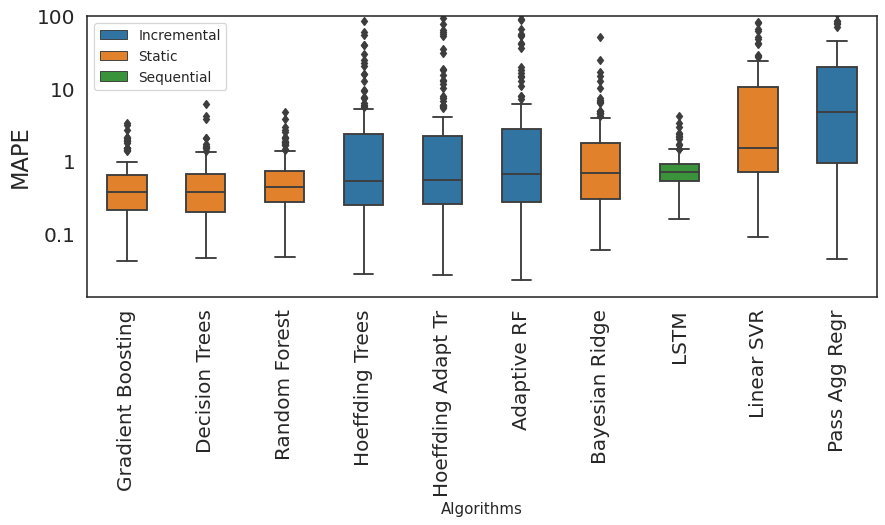

In [ ]:
save_filename = 'fig1'
read_preprocess_plot_graph(exp1_filenames, col_mapper, save_filename, metric_type)

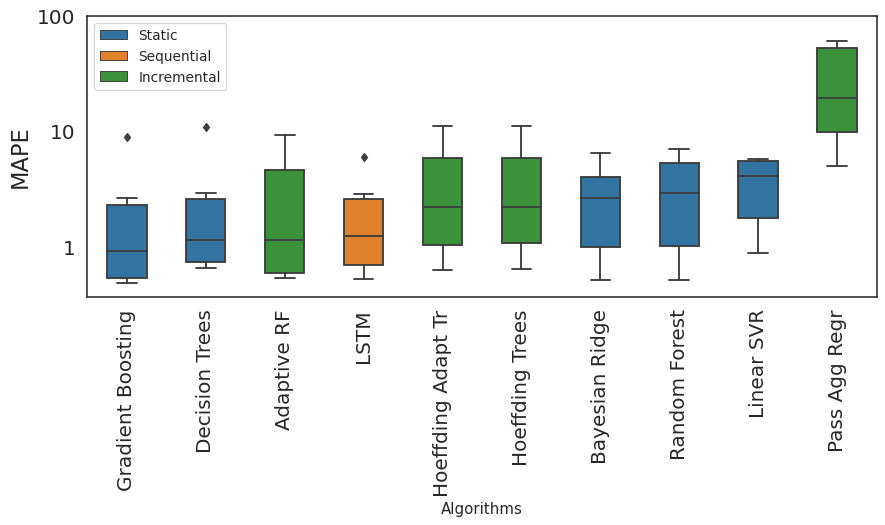

In [ ]:
save_filename = 'fig2'
read_preprocess_plot_graph(exp2_filenames, col_mapper, save_filename,  metric_type)

In [ ]:
# Downloading plots
!zip -r /content/Plots.zip /content/Plots
from google.colab import files
files.download("/content/Plots.zip")

  adding: content/Plots/ (stored 0%)
  adding: content/Plots/boxplots/ (stored 0%)
  adding: content/Plots/boxplots/fig1.pdf (deflated 36%)
  adding: content/Plots/boxplots/fig2.pdf (deflated 31%)
  adding: content/Plots/barplot/ (stored 0%)
  adding: content/Plots/barplot/top_selected_country_cases.pdf (deflated 32%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>